
# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

### 📊 **Visualization ideas**
- Boxplot: show the distribution of sleep duration or quality of sleep for each occupation.
- Show the link between age and sleep duration with a scatterplot. Consider including information on the sleep disorder.

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Sleep Habits and Health Lifestyle/data.csv", index_col = "Person ID")
df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(374, 12)

## Ready to share your work?

Click "Share" in the upper right corner, copy the link, and share it! You can also easily add this workspace to your DataCamp Portfolio.

# Checking the data types of each column to figure out the categorical variables and continuous variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


# Checking the missing values of each columns.

In [ ]:
pd.DataFrame(df.isna().sum(), columns = ["Missing Values"])

Missing Values
Gender                                0
Age                                   0
Occupation                            0
Sleep Duration                        0
Quality of Sleep                      0
Physical Activity Level               0
Stress Level                          0
BMI Category                          0
Blood Pressure                        0
Heart Rate                            0
Daily Steps                           0
Sleep Disorder                        0

# Describing each columns

In [ ]:
pd.concat([df.describe(include = "object"), df.describe()], axis = 0)

Gender Occupation BMI Category Blood Pressure Sleep Disorder  \
count     374        374          374            374            374   
unique      2         11            4             25              3   
top      Male      Nurse       Normal         130/85           None   
freq      189         73          195             99            219   
count     NaN        NaN          NaN            NaN            NaN   
mean      NaN        NaN          NaN            NaN            NaN   
std       NaN        NaN          NaN            NaN            NaN   
min       NaN        NaN          NaN            NaN            NaN   
25%       NaN        NaN          NaN            NaN            NaN   
50%       NaN        NaN          NaN            NaN            NaN   
75%       NaN        NaN          NaN            NaN            NaN   
max       NaN        NaN          NaN            NaN            NaN   

               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count          NaN             NaN               NaN                      NaN   
unique         NaN             NaN               NaN                      NaN   
top            NaN             NaN               NaN                      NaN   
freq           NaN             NaN               NaN                      NaN   
count   374.000000      374.000000        374.000000               374.000000   
mean     42.184492        7.132086          7.312834                59.171123   
std       8.673133        0.795657          1.196956                20.830804   
min      27.000000        5.800000          4.000000                30.000000   
25%      35.250000        6.400000          6.000000                45.000000   
50%      43.000000        7.200000          7.000000                60.000000   
75%      50.000000        7.800000          8.000000                75.000000   
max      59.000000        8.500000          9.000000                90.000000   

        Stress Level  Heart Rate   Daily Steps  
count            NaN         NaN           NaN  
unique           NaN         NaN           NaN  
top              NaN         NaN           NaN  
freq             NaN         NaN           NaN  
count     374.000000  374.000000    374.000000  
mean        5.385027   70.165775   6816.844920  
std         1.774526    4.135676   1617.915679  
min         3.000000   65.000000   3000.000000  
25%         4.000000   68.000000   5600.000000  
50%         5.000000   70.000000   7000.000000  
75%         7.000000   72.000000   8000.000000  
max         8.000000   86.000000  10000.000000

# Identifying the population of the data
- How many male and female are in the data.
- Number of people who participate on the study based on their occupation
- Number of people who participate that based on the quality of their sleep.
- Population of people based on their BMI Category
  - Normal
  - Overweight
  - Obese
- And Number of people who don't have sleep disorder or who have insomia and sleep apnea.

# Gender Population

<Axes: xlabel='Gender', ylabel='count'>

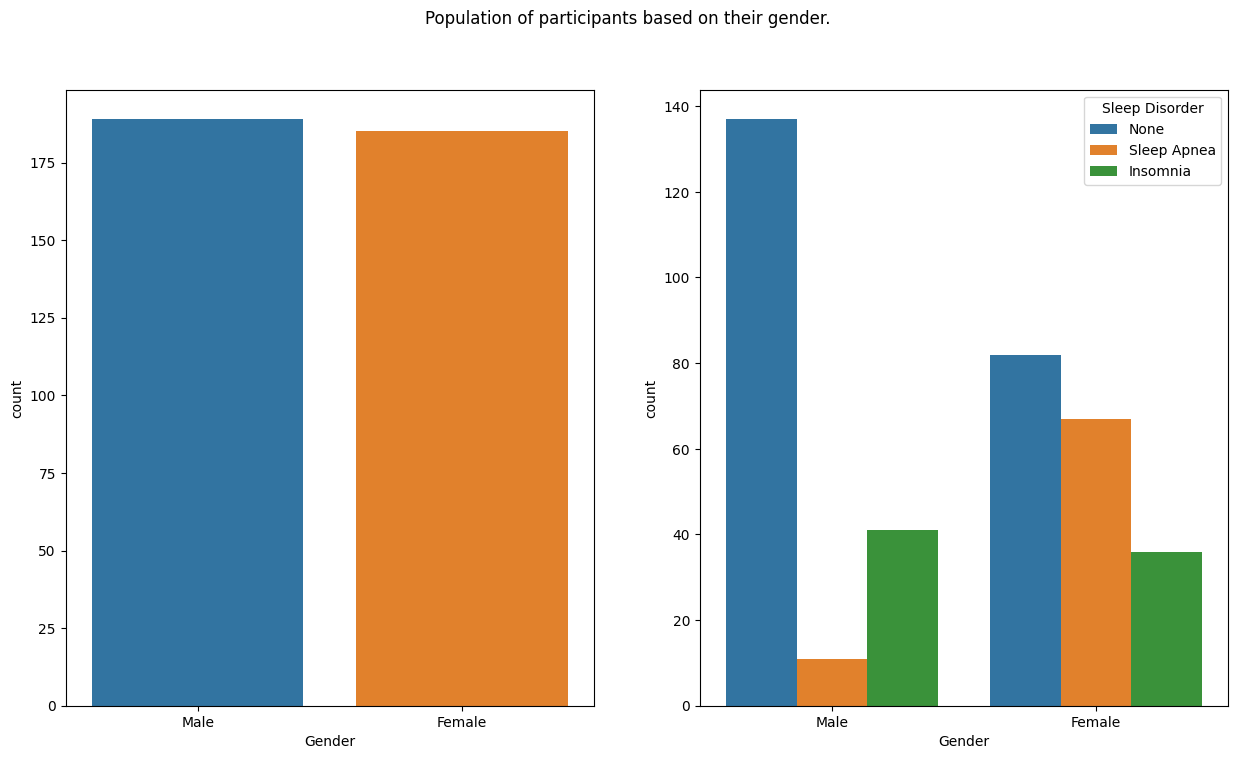

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
plt.suptitle("Population of participants based on their gender.")
sns.countplot(df, x = "Gender", ax = axes[0])
sns.countplot(df, x = "Gender", hue = "Sleep Disorder")

# Occupation Population

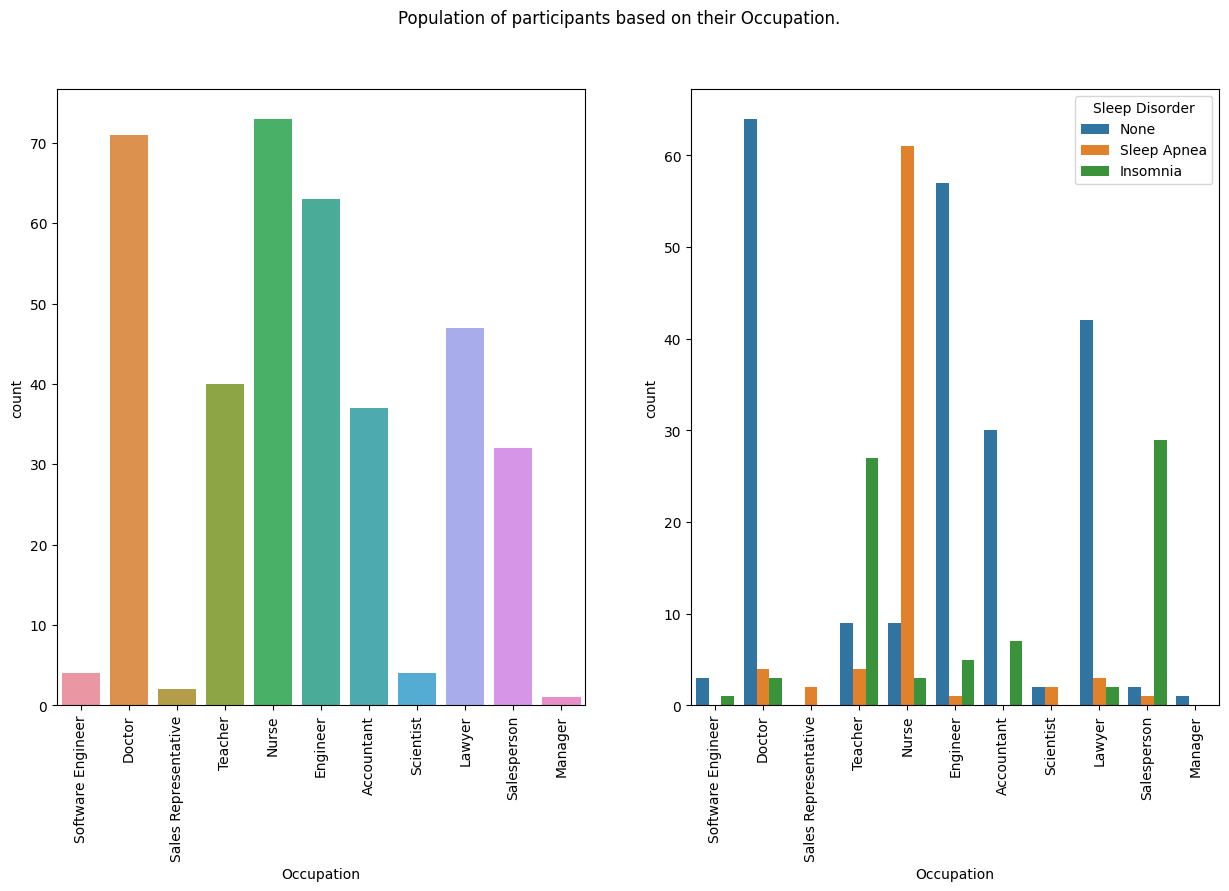

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
plt.suptitle("Population of participants based on their Occupation.")
sns.countplot(df, x = "Occupation", ax = axes[0])
plt.xticks(rotation = 90);
sns.countplot(df, x = "Occupation", hue = "Sleep Disorder", ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

# Quality of Sleep Population

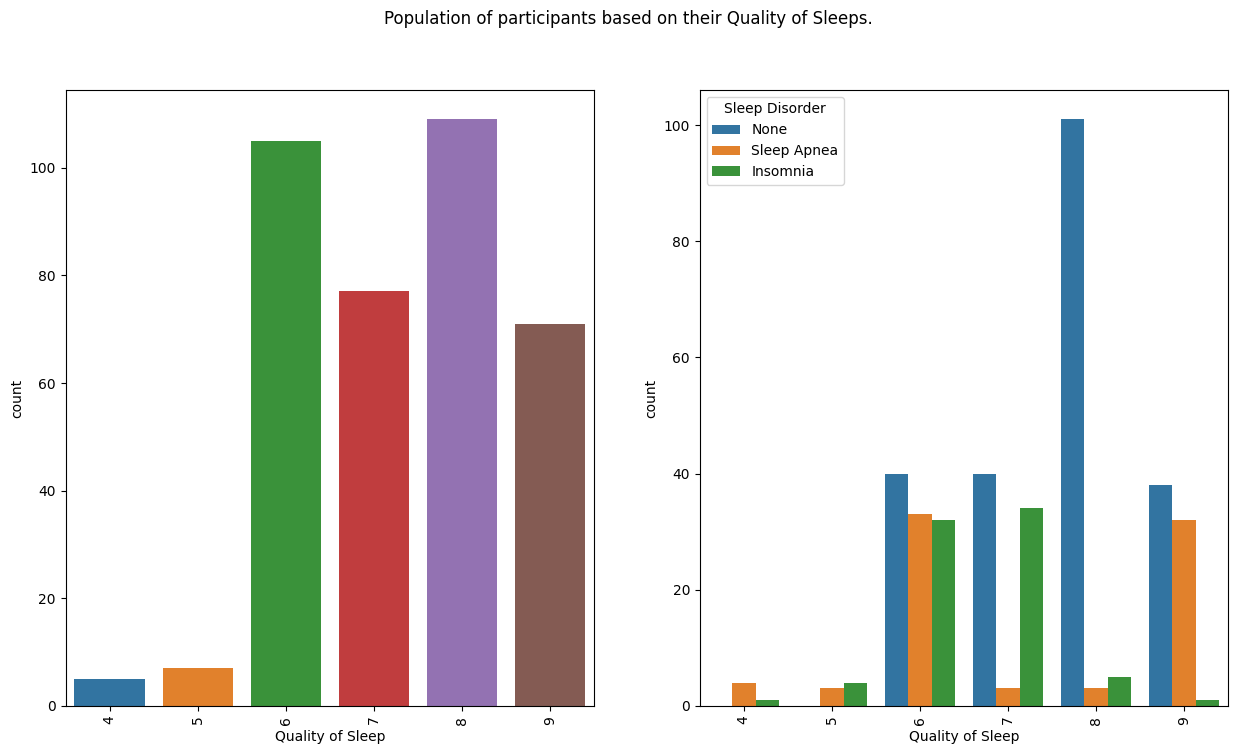

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
plt.suptitle("Population of participants based on their Quality of Sleeps.")
sns.countplot(df, x = "Quality of Sleep", ax = axes[0])
plt.xticks(rotation = 90);
sns.countplot(df, x = "Quality of Sleep", hue = "Sleep Disorder", ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

# Sleep Disorder Population

<Axes: xlabel='Sleep Disorder', ylabel='count'>

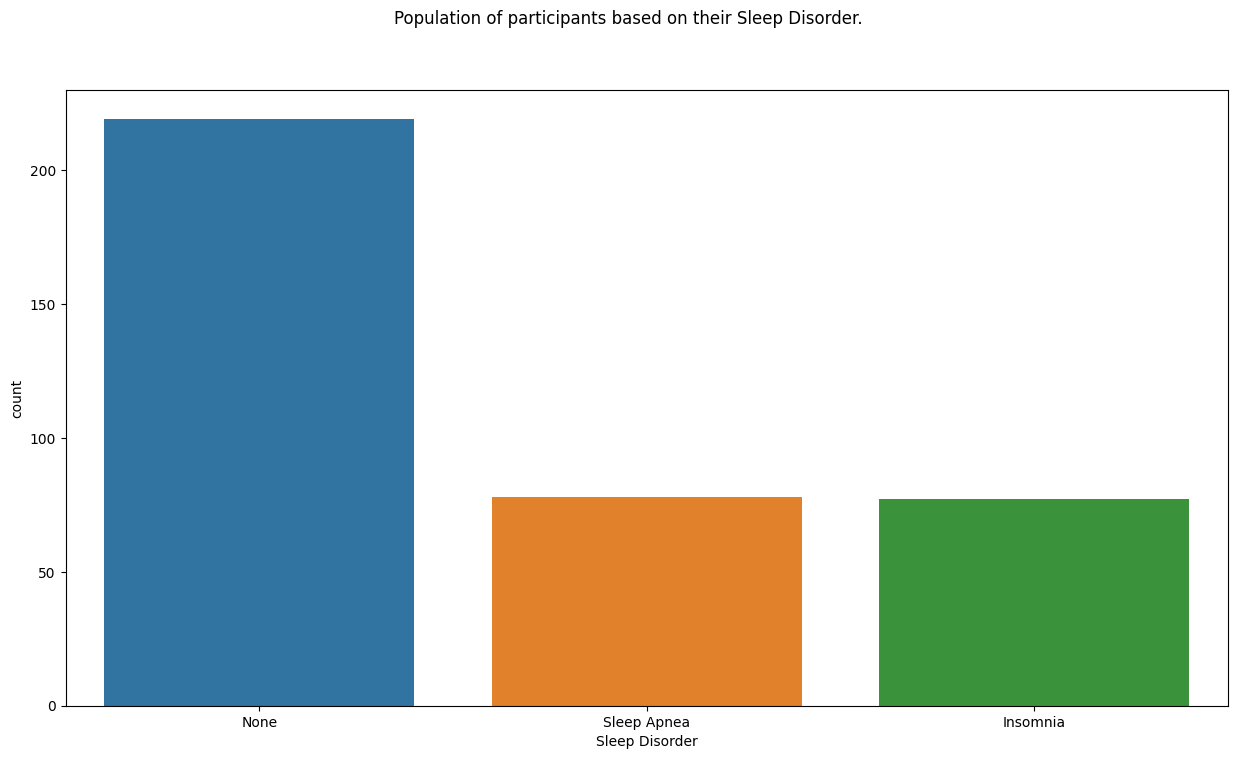

In [ ]:
plt.figure(figsize = (15, 8))
plt.suptitle("Population of participants based on their Sleep Disorder.")
sns.countplot(df, x = "Sleep Disorder")

# Visualizing all of the continuous variable and categorical variable.
- Distribution of:
  - Age
  - Physical Activity
  - Stress Level
  - Sleep Duration
  - Blood Pressure
  - Heart Rate
  - Daily Steps


# Feature Engineering for blood pressure

In [ ]:
blood = [i.split("/") for i in list(df["Blood Pressure"])]
high = []
low = []

for i in blood:
  high.append(int(i[0]))
  low.append(int(i[1]))
df["low"] = low
df["high"] = high

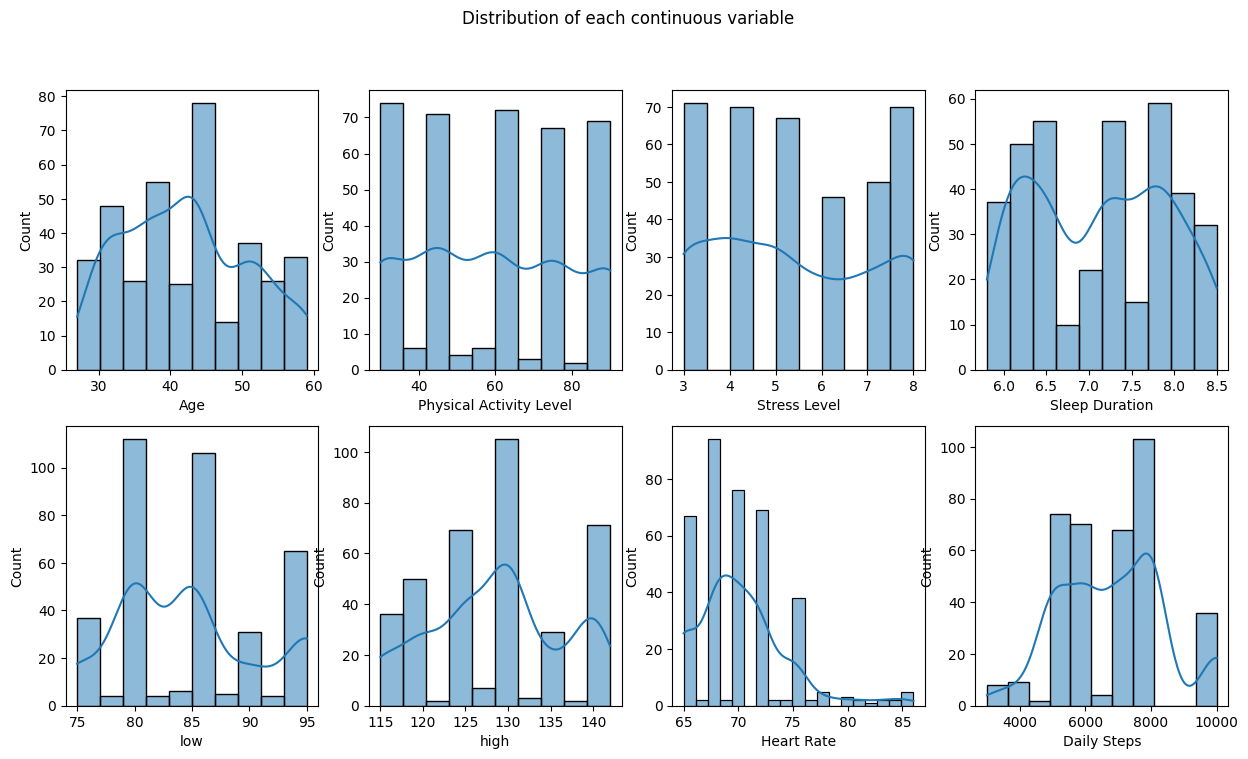

In [ ]:
continuous_var = ["Age", "Physical Activity Level", "Stress Level", "Sleep Duration", "low", "high", "Heart Rate", "Daily Steps"]
fig, axes = plt.subplots(2,4, figsize = (15, 8))
plt.suptitle("Distribution of each continuous variable")
col = 0
row = 0
for cat in continuous_var:
  sns.histplot(df, x = cat, ax= axes[row, col], kde = True)
  col += 1
  if col == 4:
    col = 0
    row += 1

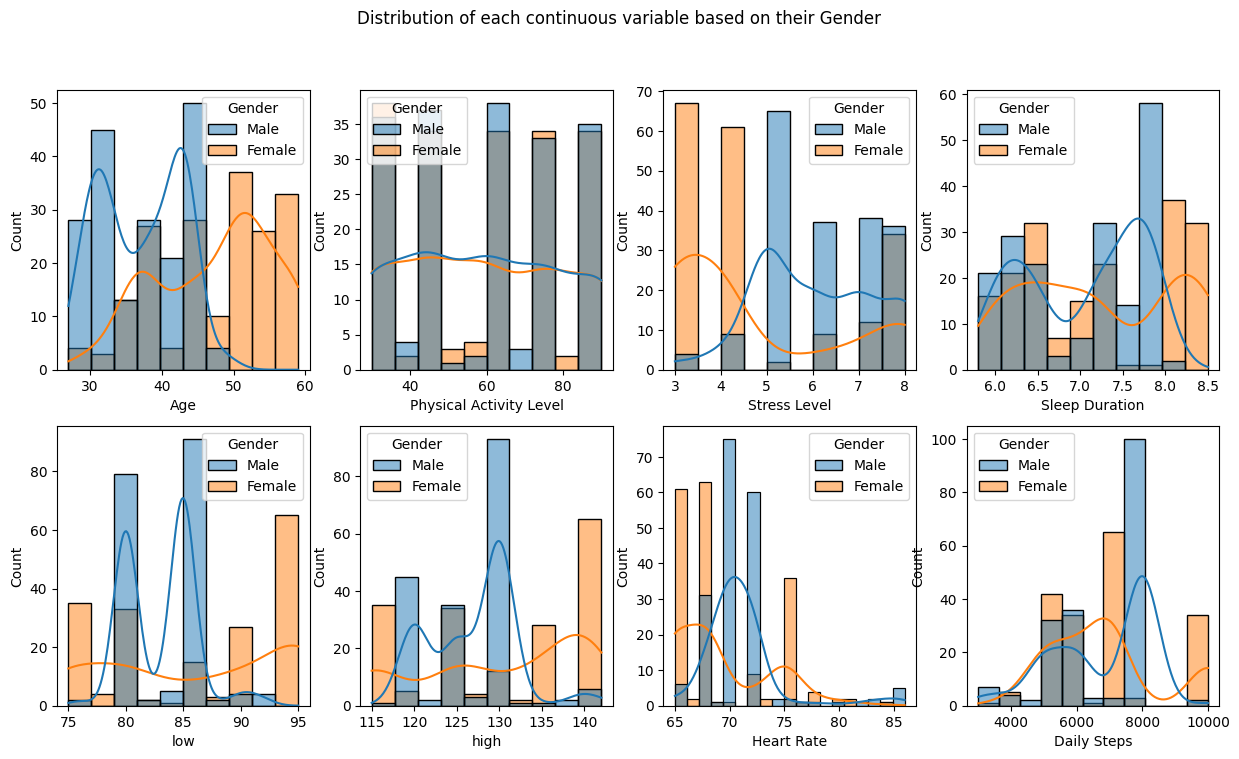

In [ ]:
continuous_var = ["Age", "Physical Activity Level", "Stress Level", "Sleep Duration", "low", "high", "Heart Rate", "Daily Steps"]
fig, axes = plt.subplots(2,4, figsize = (15, 8))
plt.suptitle("Distribution of each continuous variable based on their Gender")
col = 0
row = 0
for cat in continuous_var:
  sns.histplot(df, x = cat, ax= axes[row, col], kde = True, hue = "Gender")
  col += 1
  if col == 4:
    col = 0
    row += 1

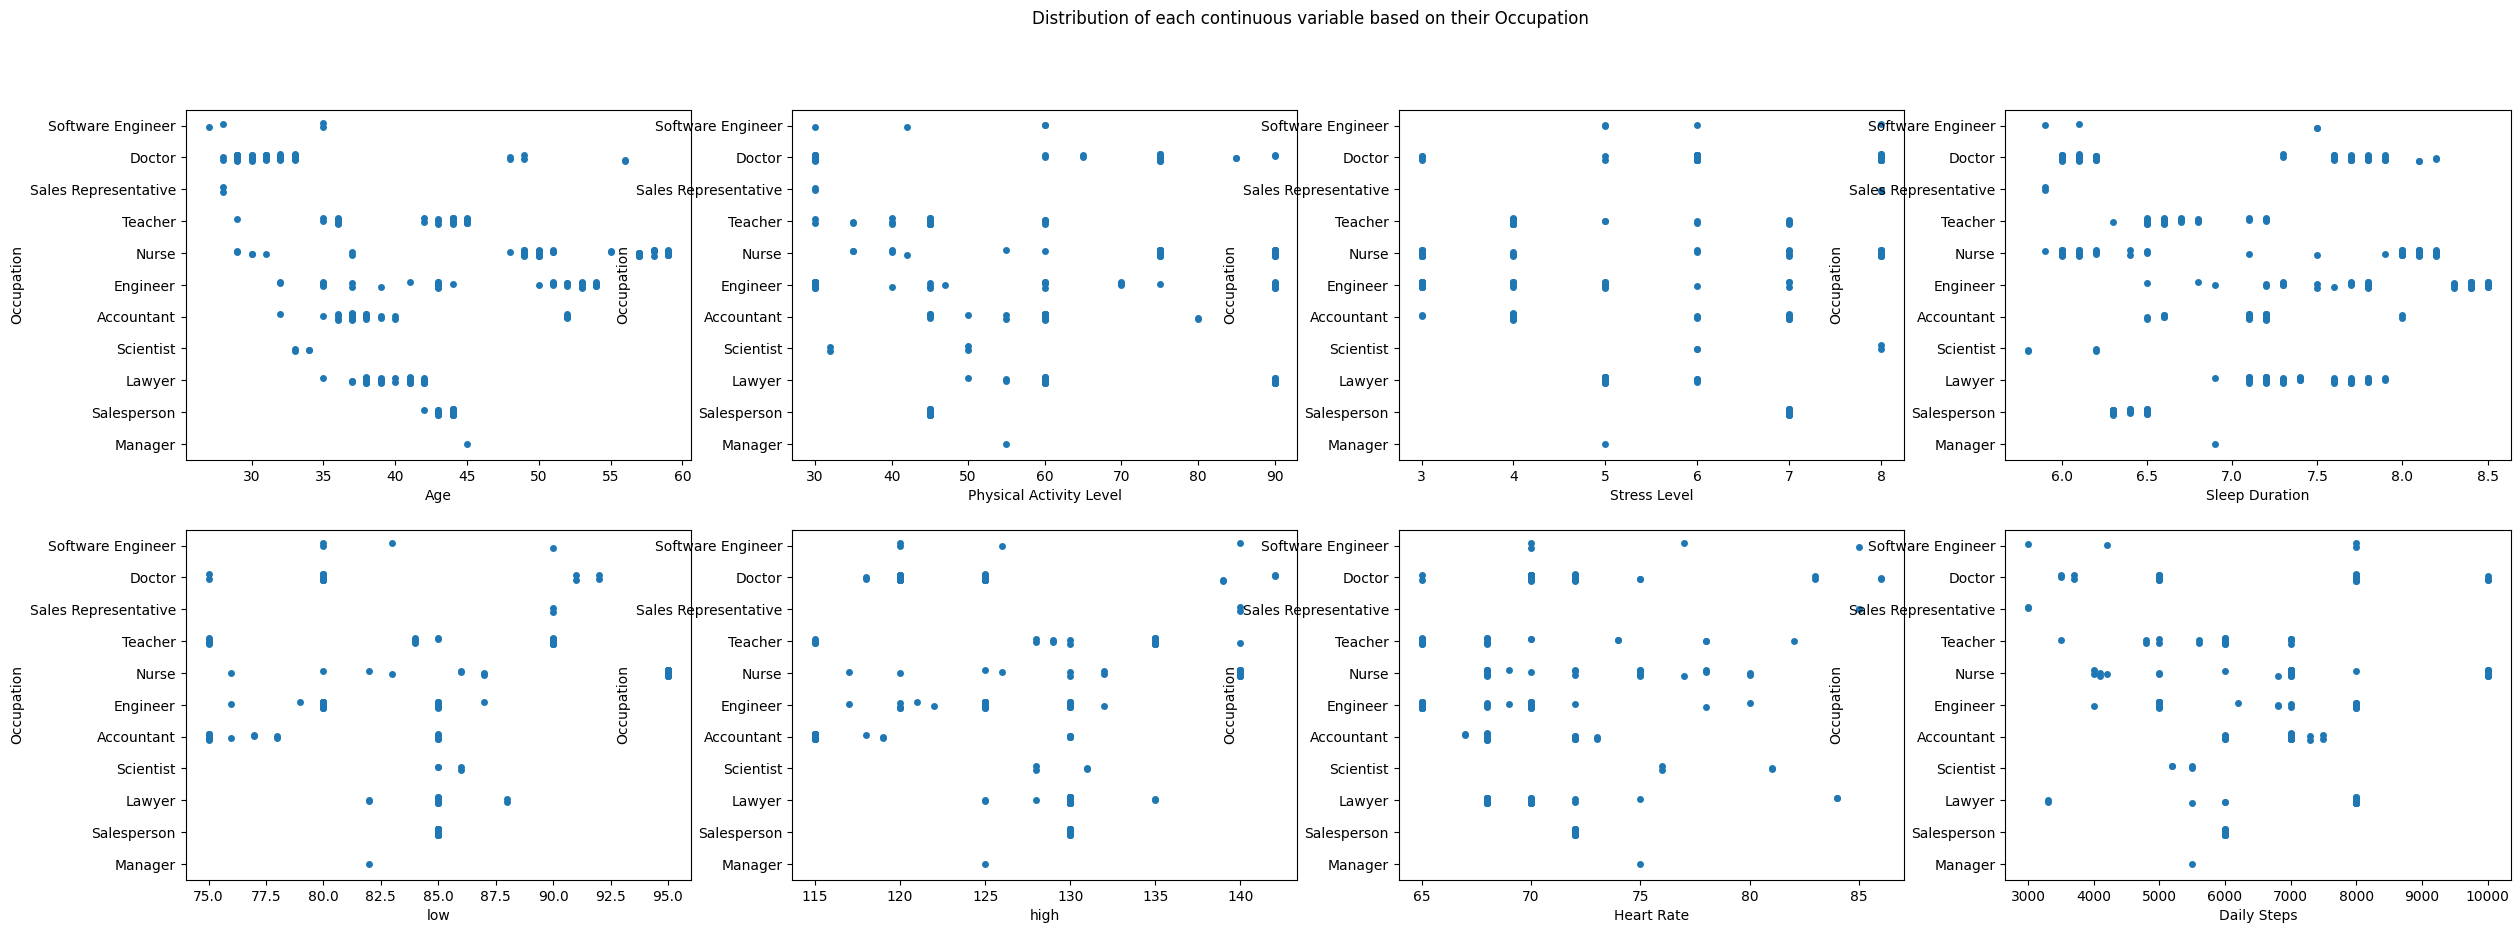

In [ ]:
continuous_var = ["Age", "Physical Activity Level", "Stress Level", "Sleep Duration", "low", "high", "Heart Rate", "Daily Steps"]
fig, axes = plt.subplots(2,4, figsize = (30, 10))
plt.suptitle("Distribution of each continuous variable based on their Occupation")
col = 0
row = 0
for cat in continuous_var:
  sns.stripplot(df, x = cat, y = "Occupation", ax= axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

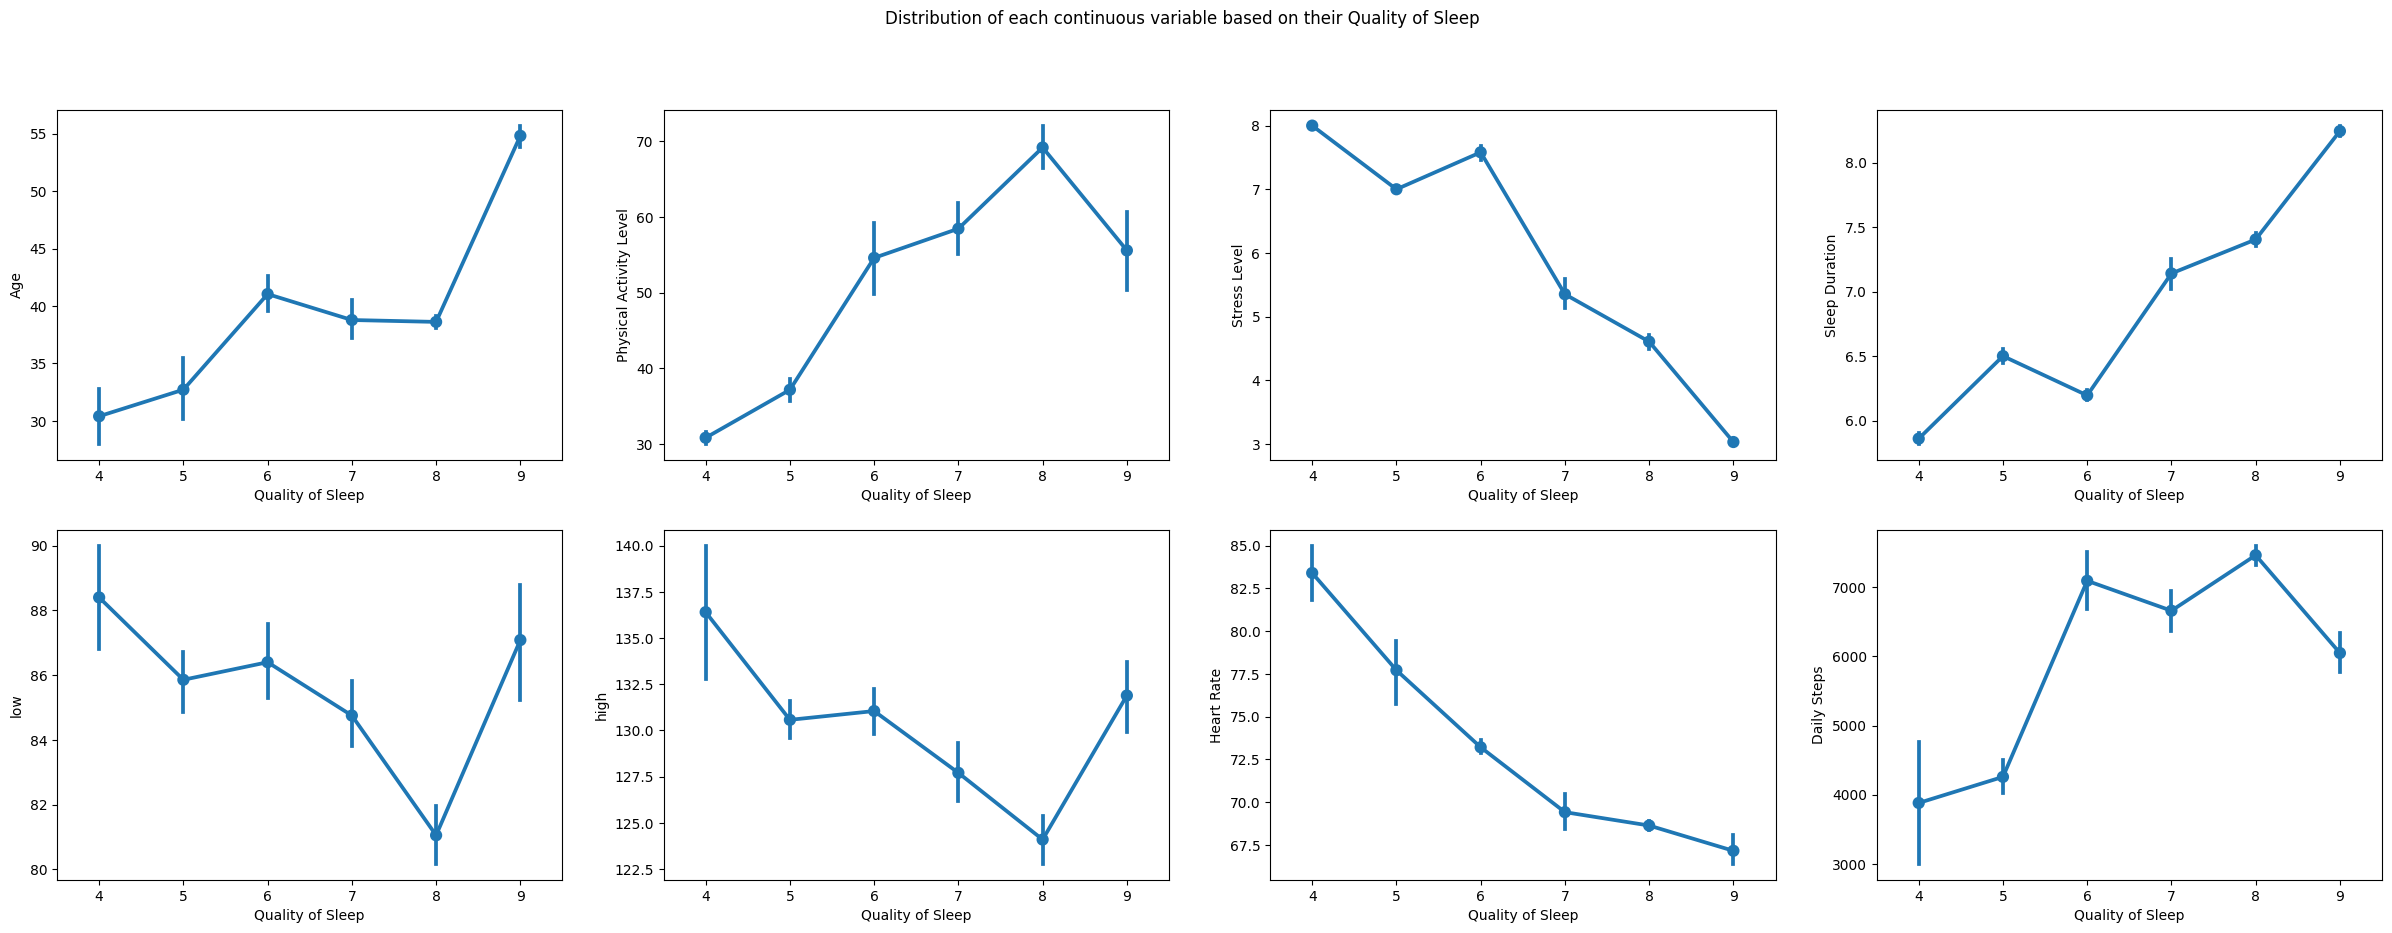

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (30, 10))
plt.suptitle("Distribution of each continuous variable based on their Quality of Sleep")
col = 0
row = 0
df["Quality of Sleep"] = df["Quality of Sleep"].astype("category")
for cat in continuous_var:
  sns.pointplot(df, y = cat, x = "Quality of Sleep", ax= axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

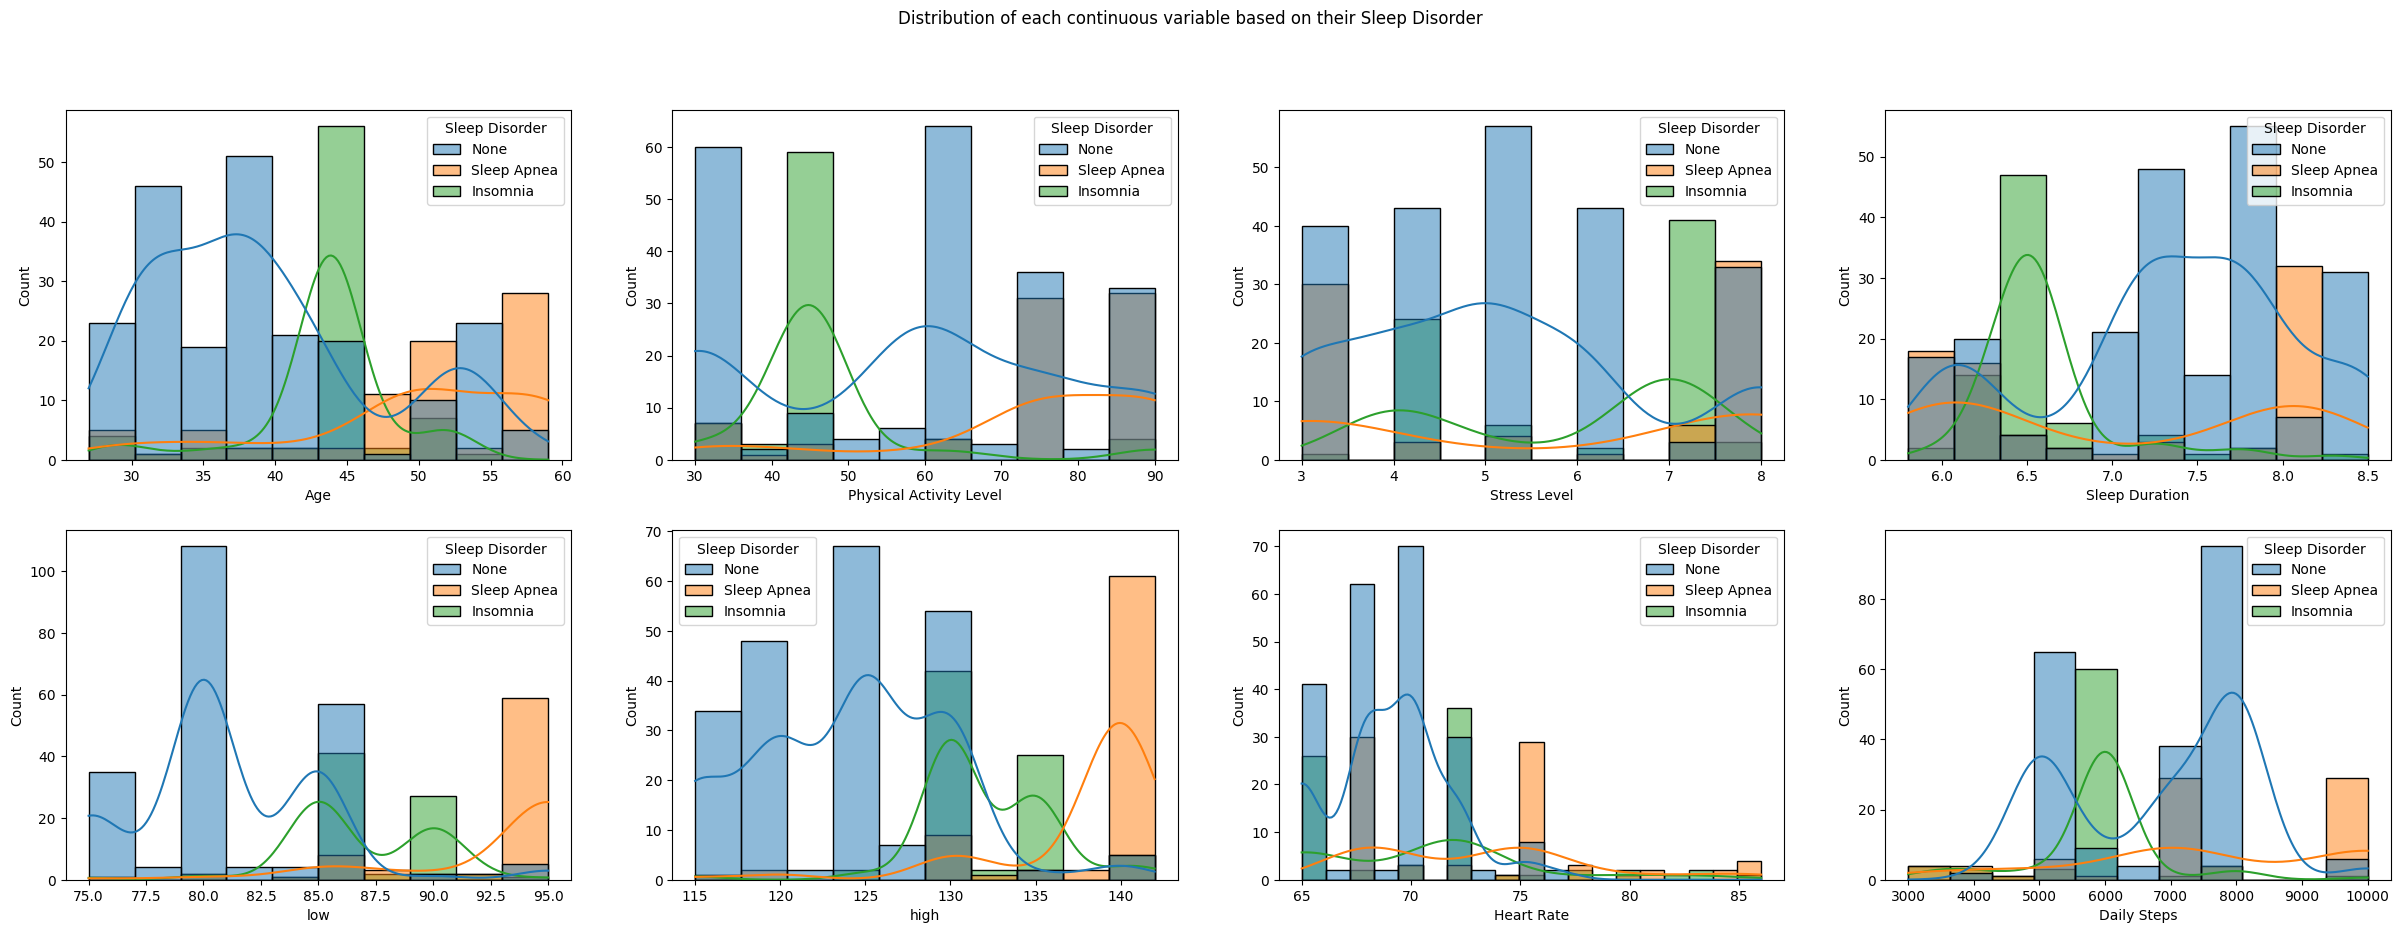

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (30, 10))
plt.suptitle("Distribution of each continuous variable based on their Sleep Disorder")
col = 0
row = 0
for cat in continuous_var:
  sns.histplot(df, x = cat, ax= axes[row, col], hue = "Sleep Disorder", kde = True)
  col += 1
  if col == 4:
    col = 0
    row += 1

# Analyzing the Gender category

<Axes: xlabel='Gender', ylabel='Age'>

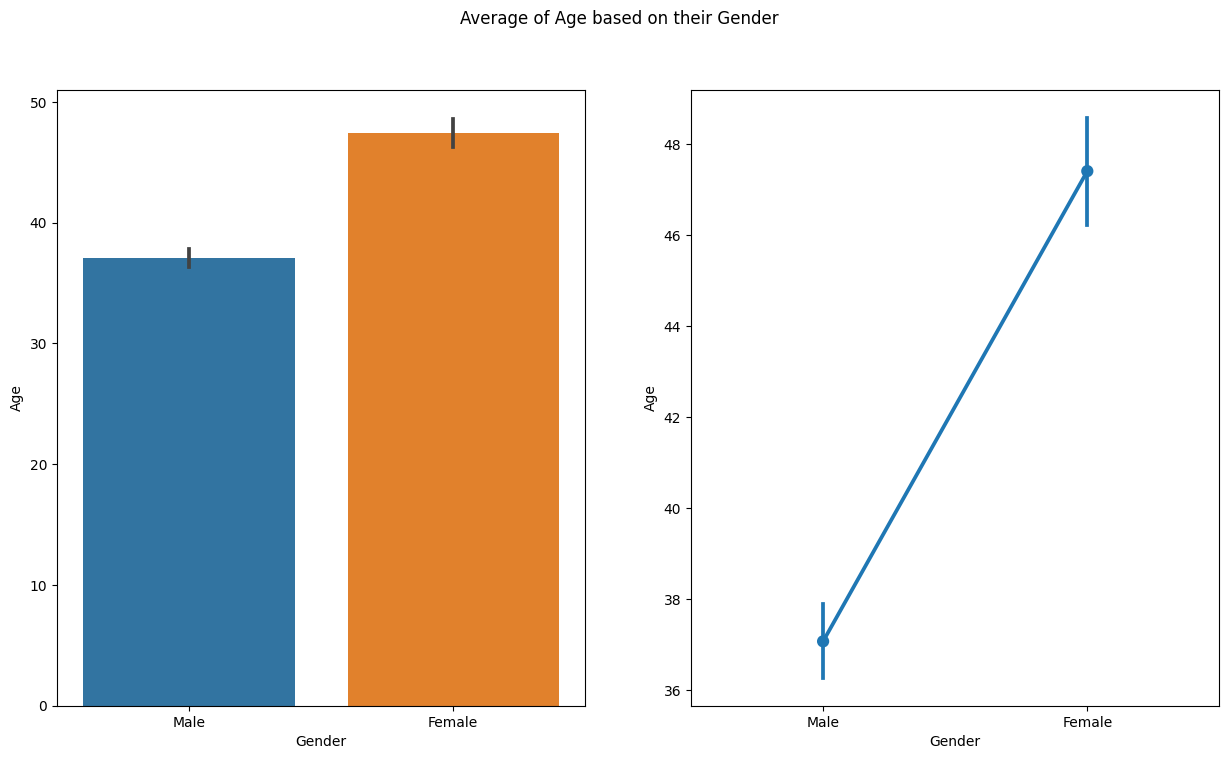

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[0]} based on their Gender")
sns.barplot(df, x = "Gender", y = "Age", ax = axes[0])
sns.pointplot(df, x = "Gender", y = "Age", ax = axes[1])

<Axes: xlabel='Age', ylabel='Gender'>

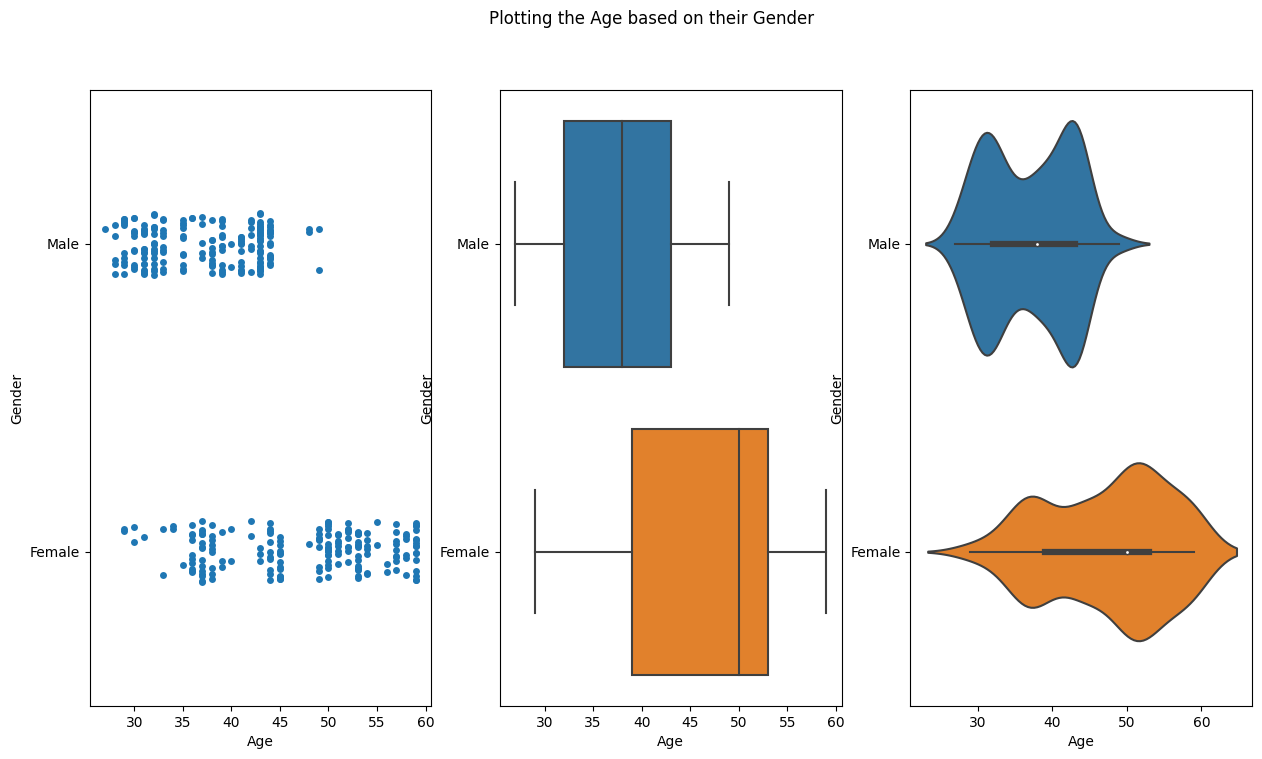

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[0]} based on their Gender")
sns.stripplot(df, y = "Gender", x = "Age", ax = axes[0])
sns.boxplot(df, y = "Gender", x = "Age", ax = axes[1])
sns.violinplot(df, y = "Gender", x = "Age", ax = axes[2])

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

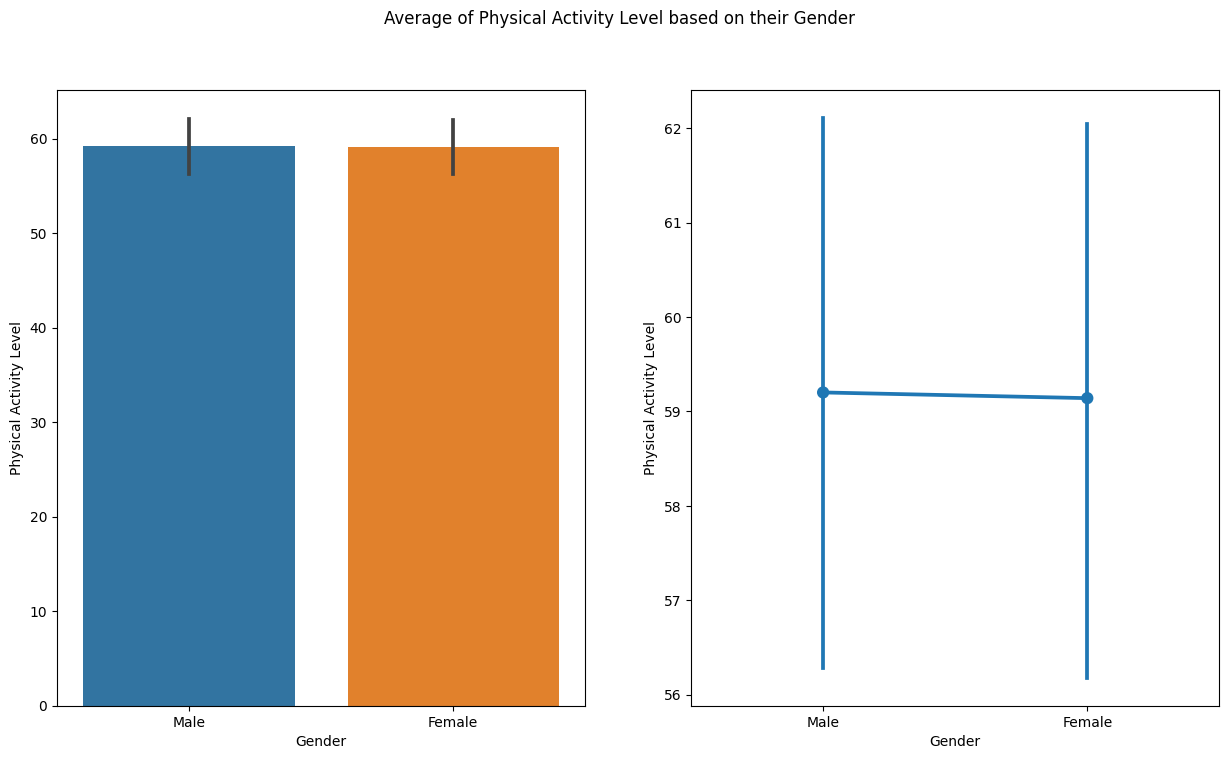

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[1]} based on their Gender")
sns.barplot(df, x = "Gender", y = "Physical Activity Level", ax = axes[0])
sns.pointplot(df, x = "Gender", y = "Physical Activity Level", ax = axes[1])

<Axes: xlabel='Physical Activity Level', ylabel='Gender'>

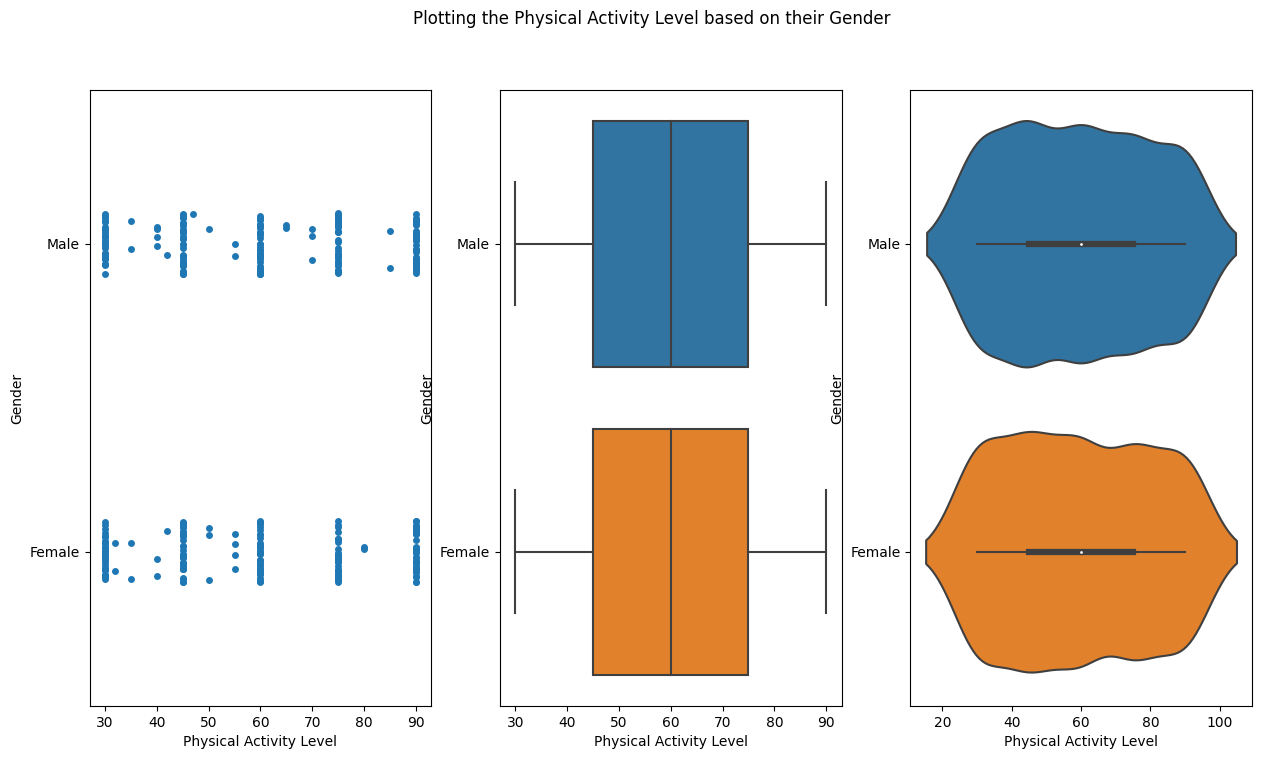

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[1]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[1], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[1], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[1], ax = axes[2])

<Axes: xlabel='Gender', ylabel='Sleep Duration'>

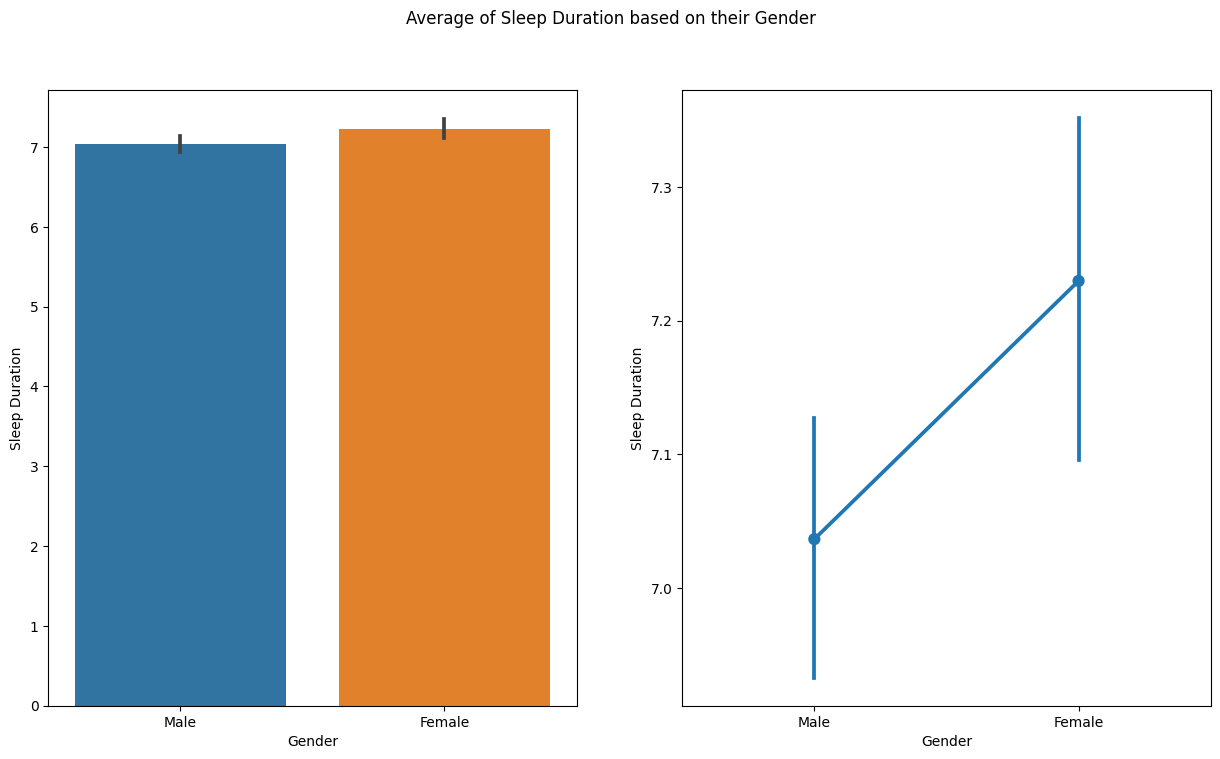

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[3]} based on their Gender")
sns.barplot(df, x = "Gender", y = continuous_var[3], ax = axes[0])
sns.pointplot(df, x = "Gender", y = continuous_var[3], ax = axes[1])

<Axes: xlabel='Sleep Duration', ylabel='Gender'>

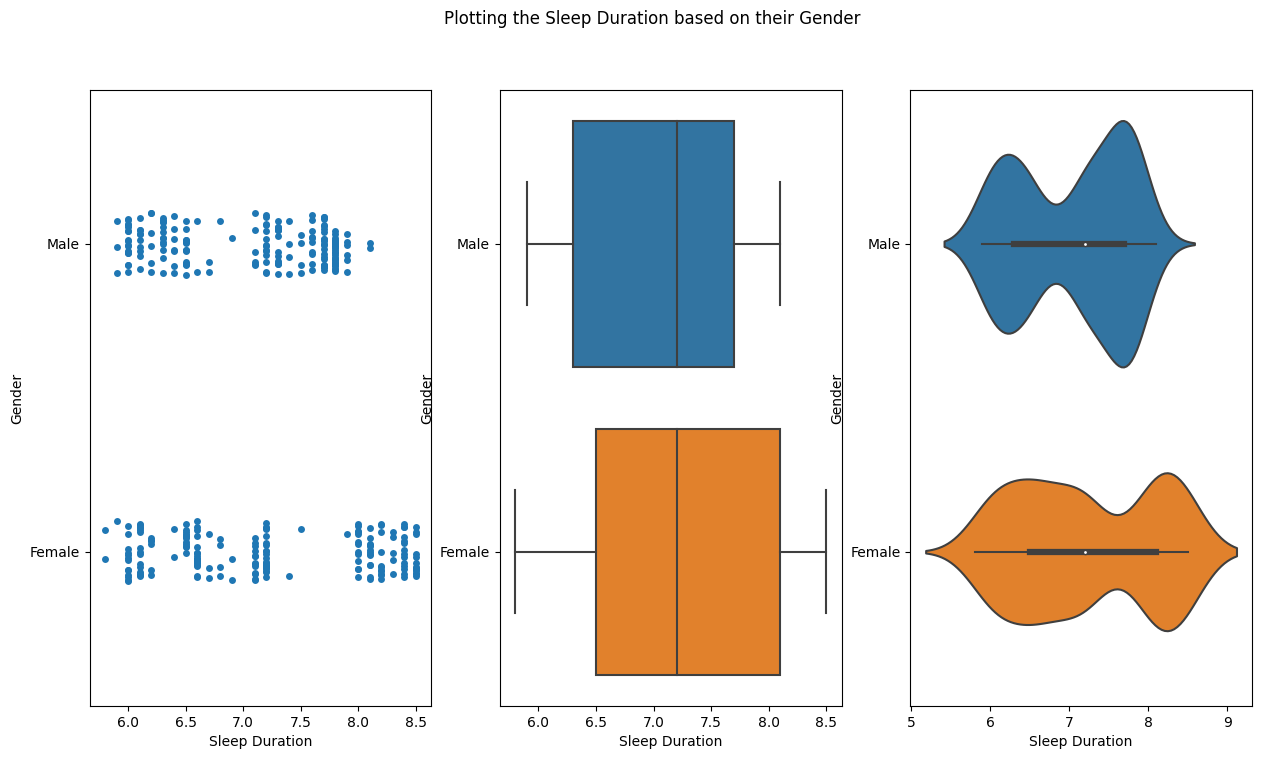

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[3]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[3], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[3], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[3], ax = axes[2])

<Axes: xlabel='Gender', ylabel='low'>

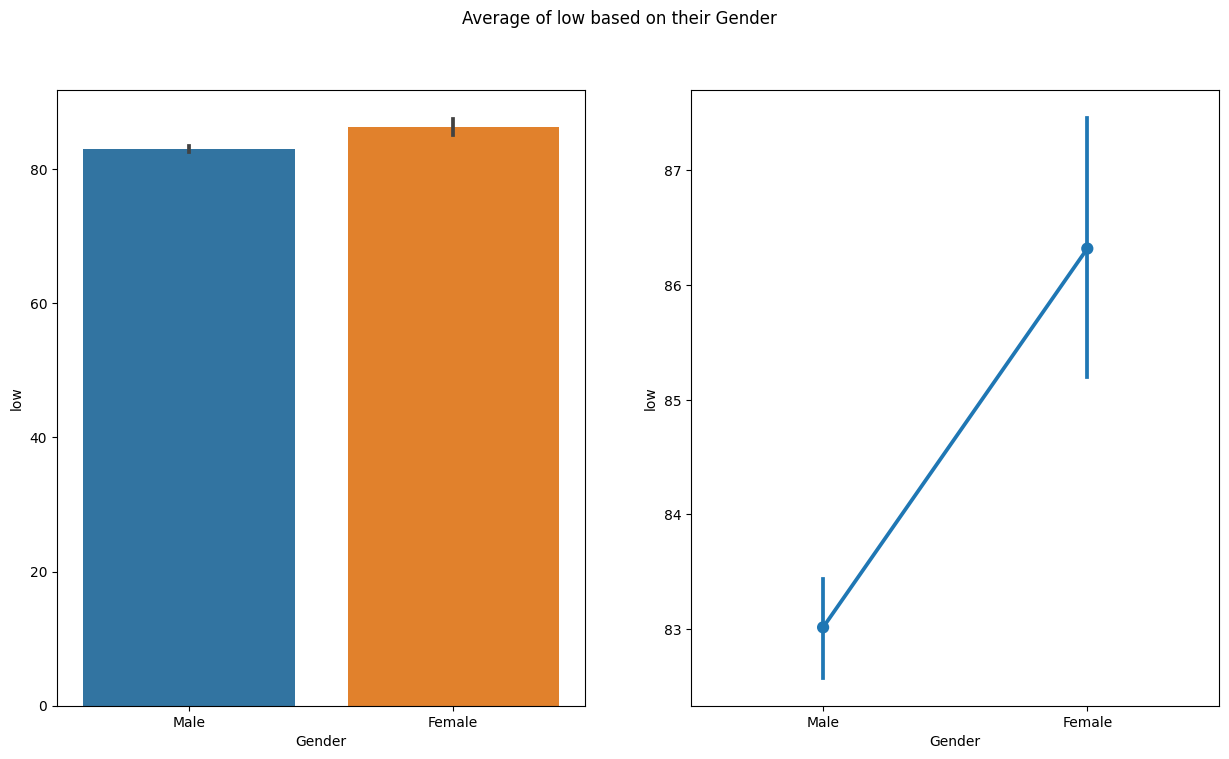

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[4]} based on their Gender")
sns.barplot(df, x = "Gender", y = continuous_var[4], ax = axes[0])
sns.pointplot(df, x = "Gender", y = continuous_var[4], ax = axes[1])

<Axes: xlabel='low', ylabel='Gender'>

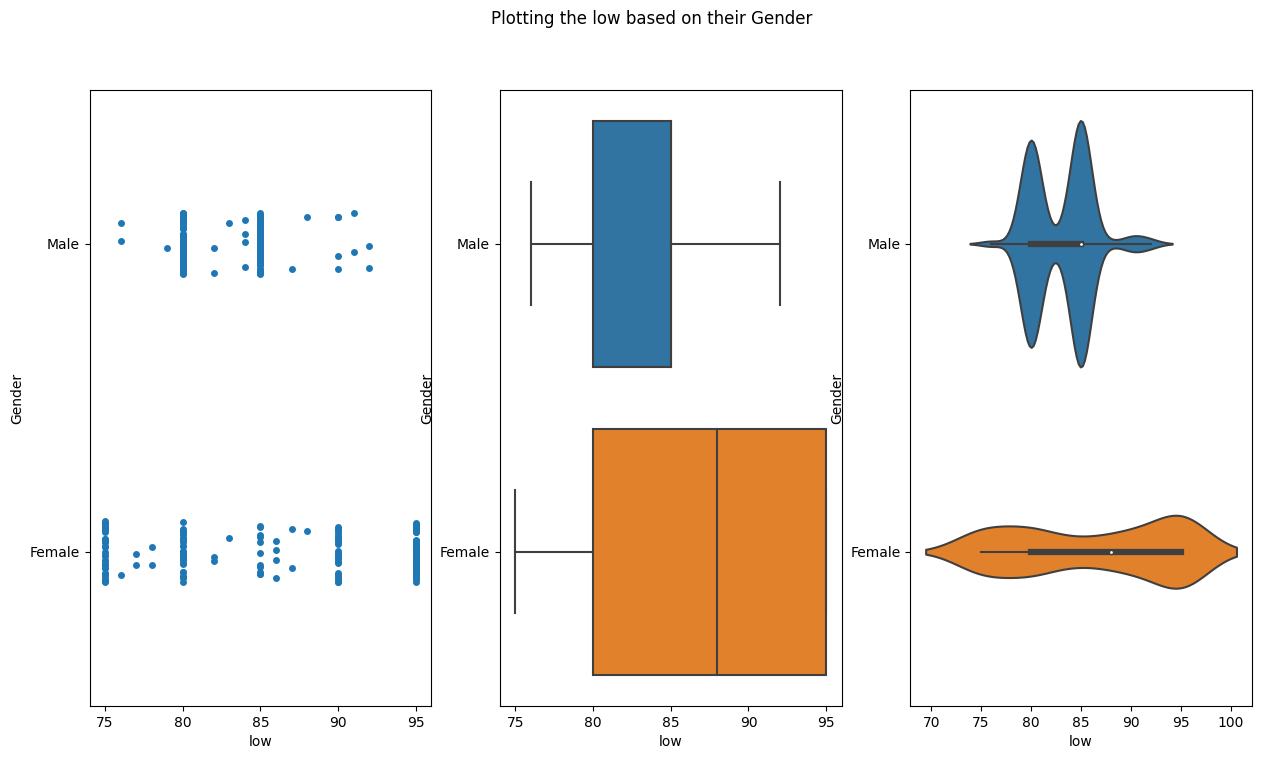

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[4]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[4], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[4], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[4], ax = axes[2])

<Axes: xlabel='Gender', ylabel='high'>

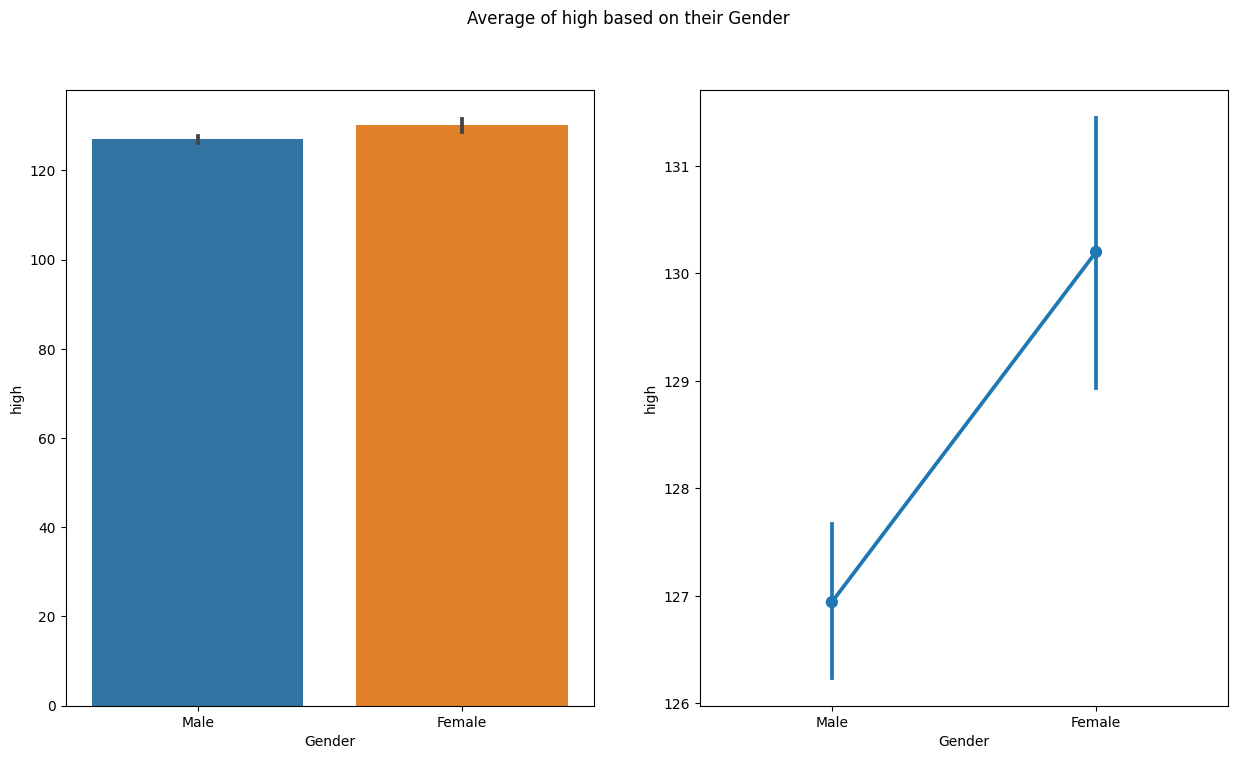

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[5]} based on their Gender")
sns.barplot(df, x = "Gender", y = continuous_var[5], ax = axes[0])
sns.pointplot(df, x = "Gender", y = continuous_var[5], ax = axes[1])

<Axes: xlabel='high', ylabel='Gender'>

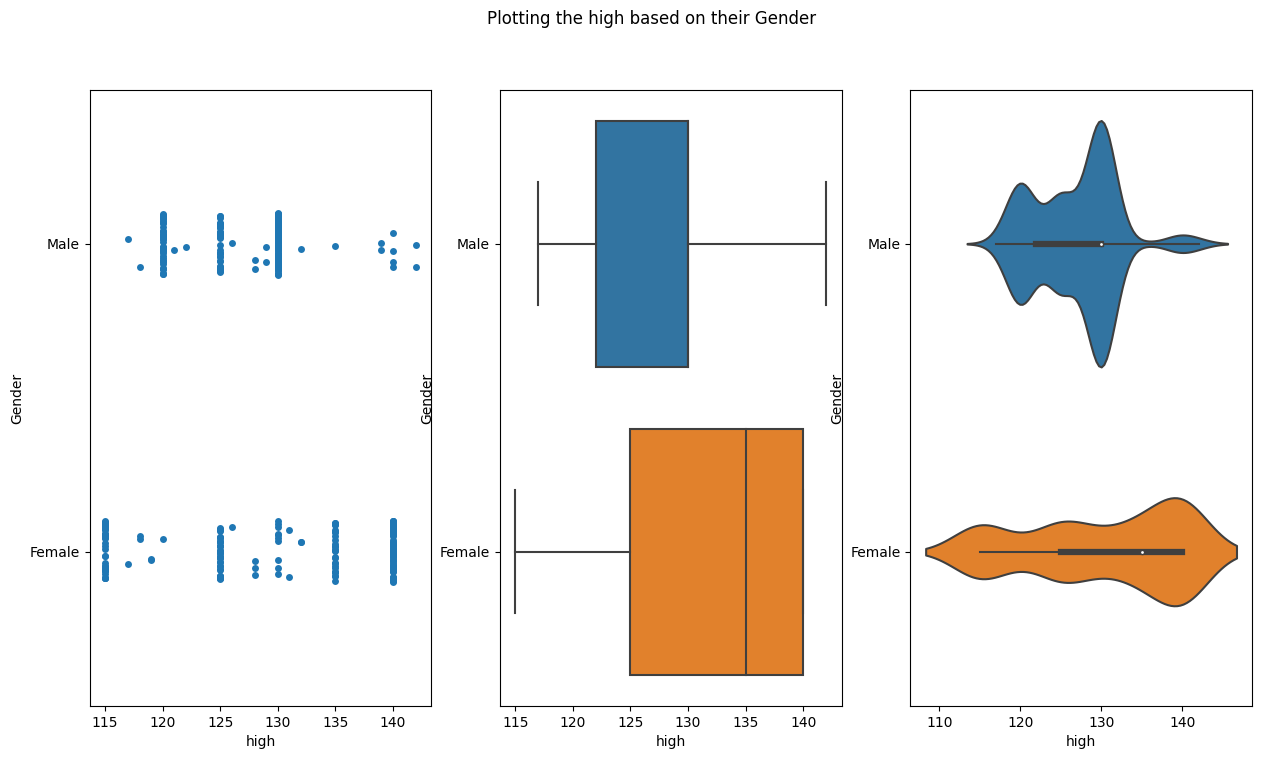

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[5]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[5], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[5], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[5], ax = axes[2])

<Axes: xlabel='Gender', ylabel='Heart Rate'>

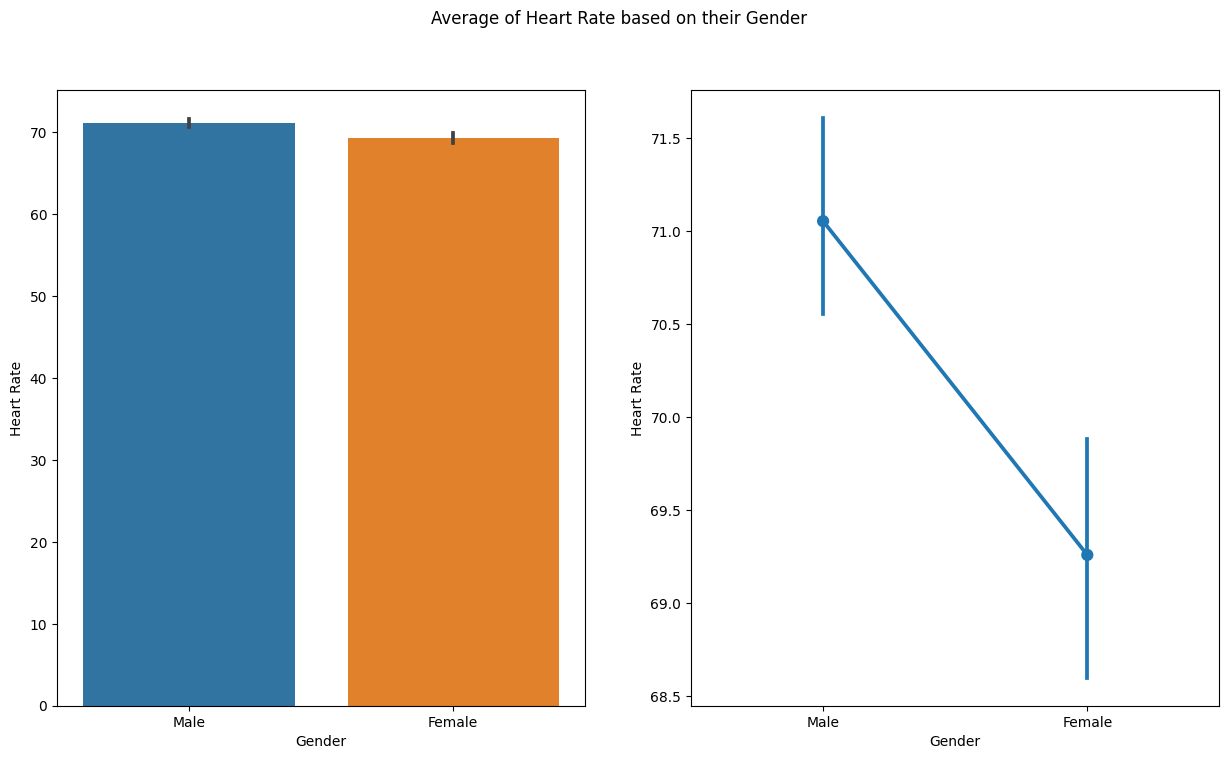

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[6]} based on their Gender")
sns.barplot(df, x = "Gender", y = continuous_var[6], ax = axes[0])
sns.pointplot(df, x = "Gender", y = continuous_var[6], ax = axes[1])

<Axes: xlabel='Heart Rate', ylabel='Gender'>

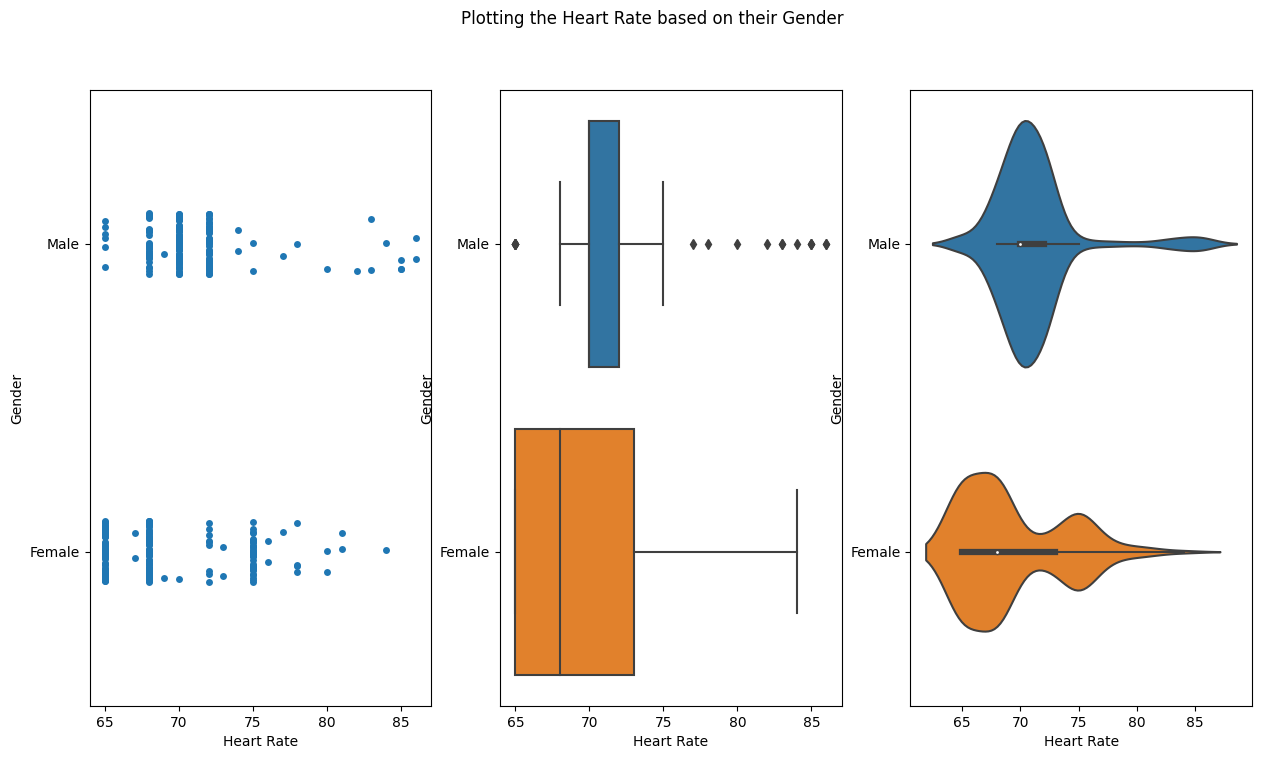

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[6]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[6], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[6], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[6], ax = axes[2])

<Axes: xlabel='Gender', ylabel='Daily Steps'>

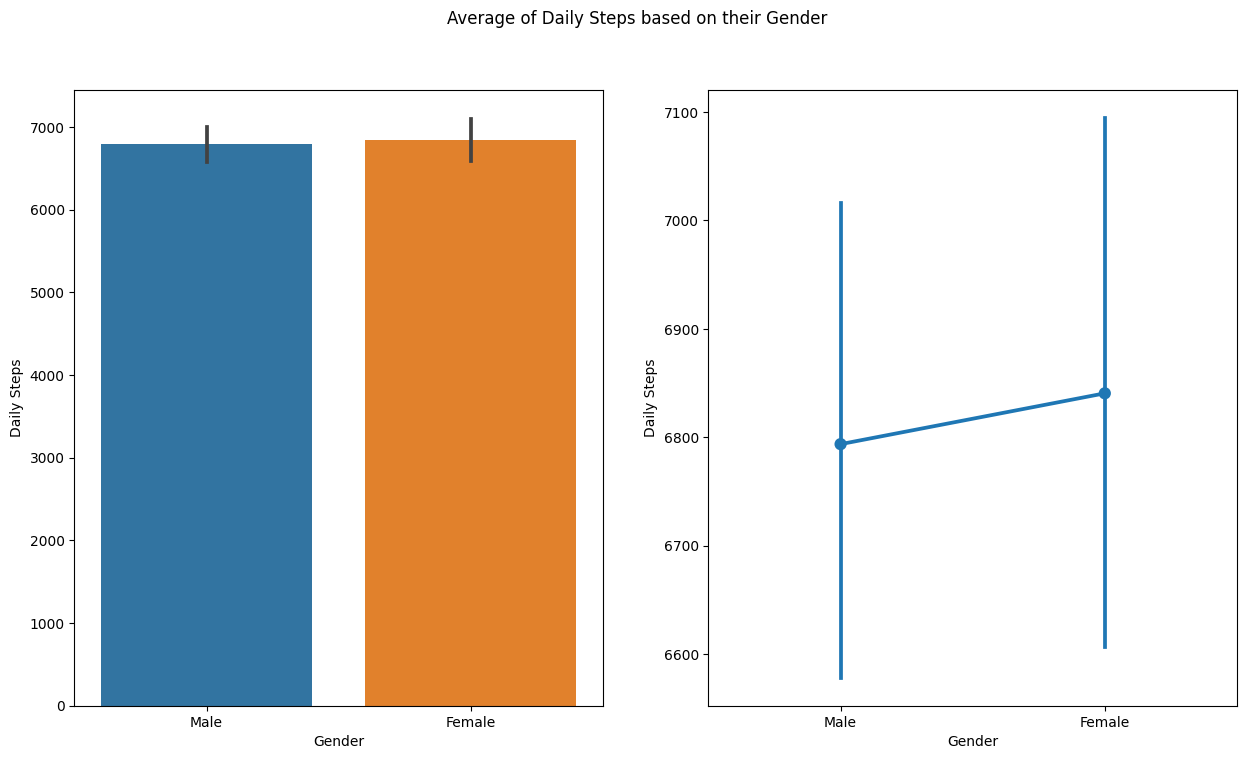

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[7]} based on their Gender")
sns.barplot(df, x = "Gender", y = continuous_var[7], ax = axes[0])
sns.pointplot(df, x = "Gender", y = continuous_var[7], ax = axes[1])

<Axes: xlabel='Daily Steps', ylabel='Gender'>

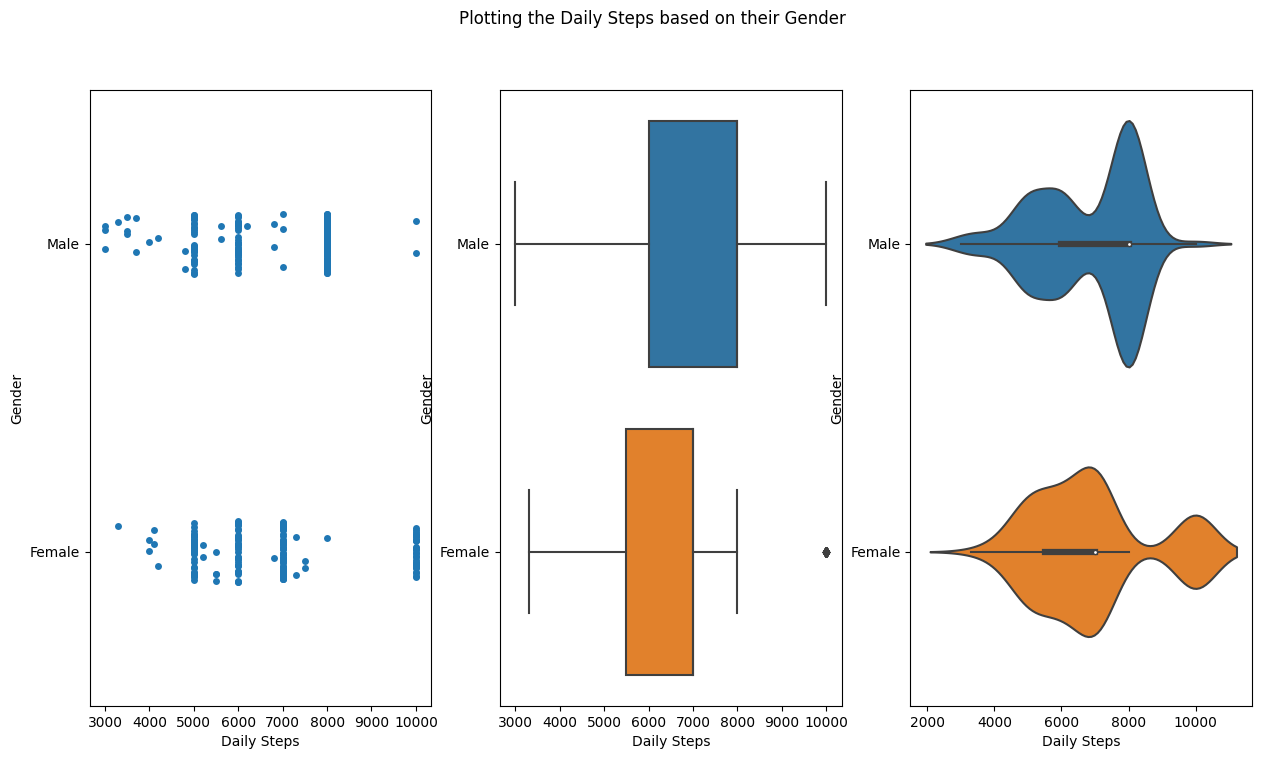

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))
plt.suptitle(f"Plotting the {continuous_var[7]} based on their Gender")
sns.stripplot(df, y = "Gender", x = continuous_var[7], ax = axes[0])
sns.boxplot(df, y = "Gender", x = continuous_var[7], ax = axes[1])
sns.violinplot(df, y = "Gender", x = continuous_var[7], ax = axes[2])

# Analyzing the Occupation category

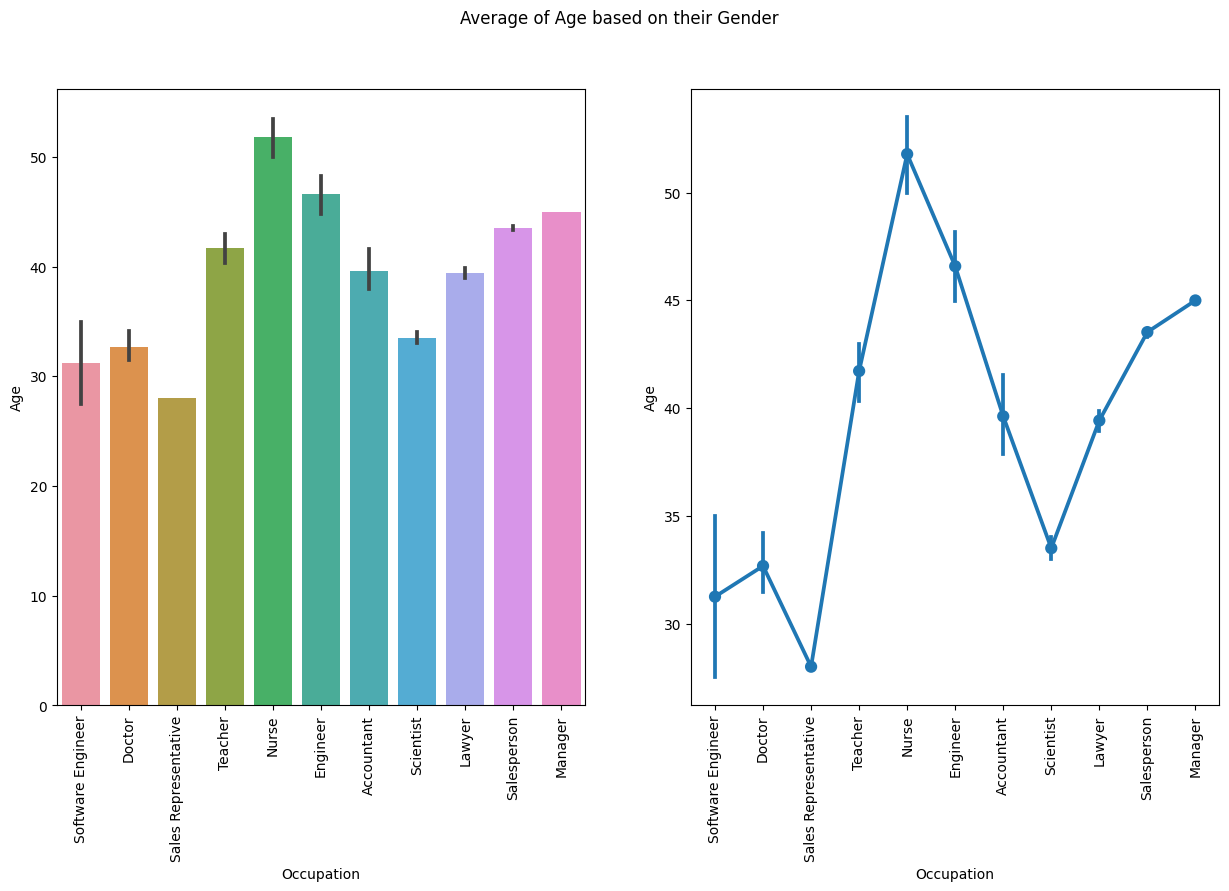

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[0]} based on their Gender")
sns.barplot(df, x = "Occupation", y = "Age", ax = axes[0])
sns.pointplot(df, x = "Occupation", y = "Age", ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Age', ylabel='Occupation'>

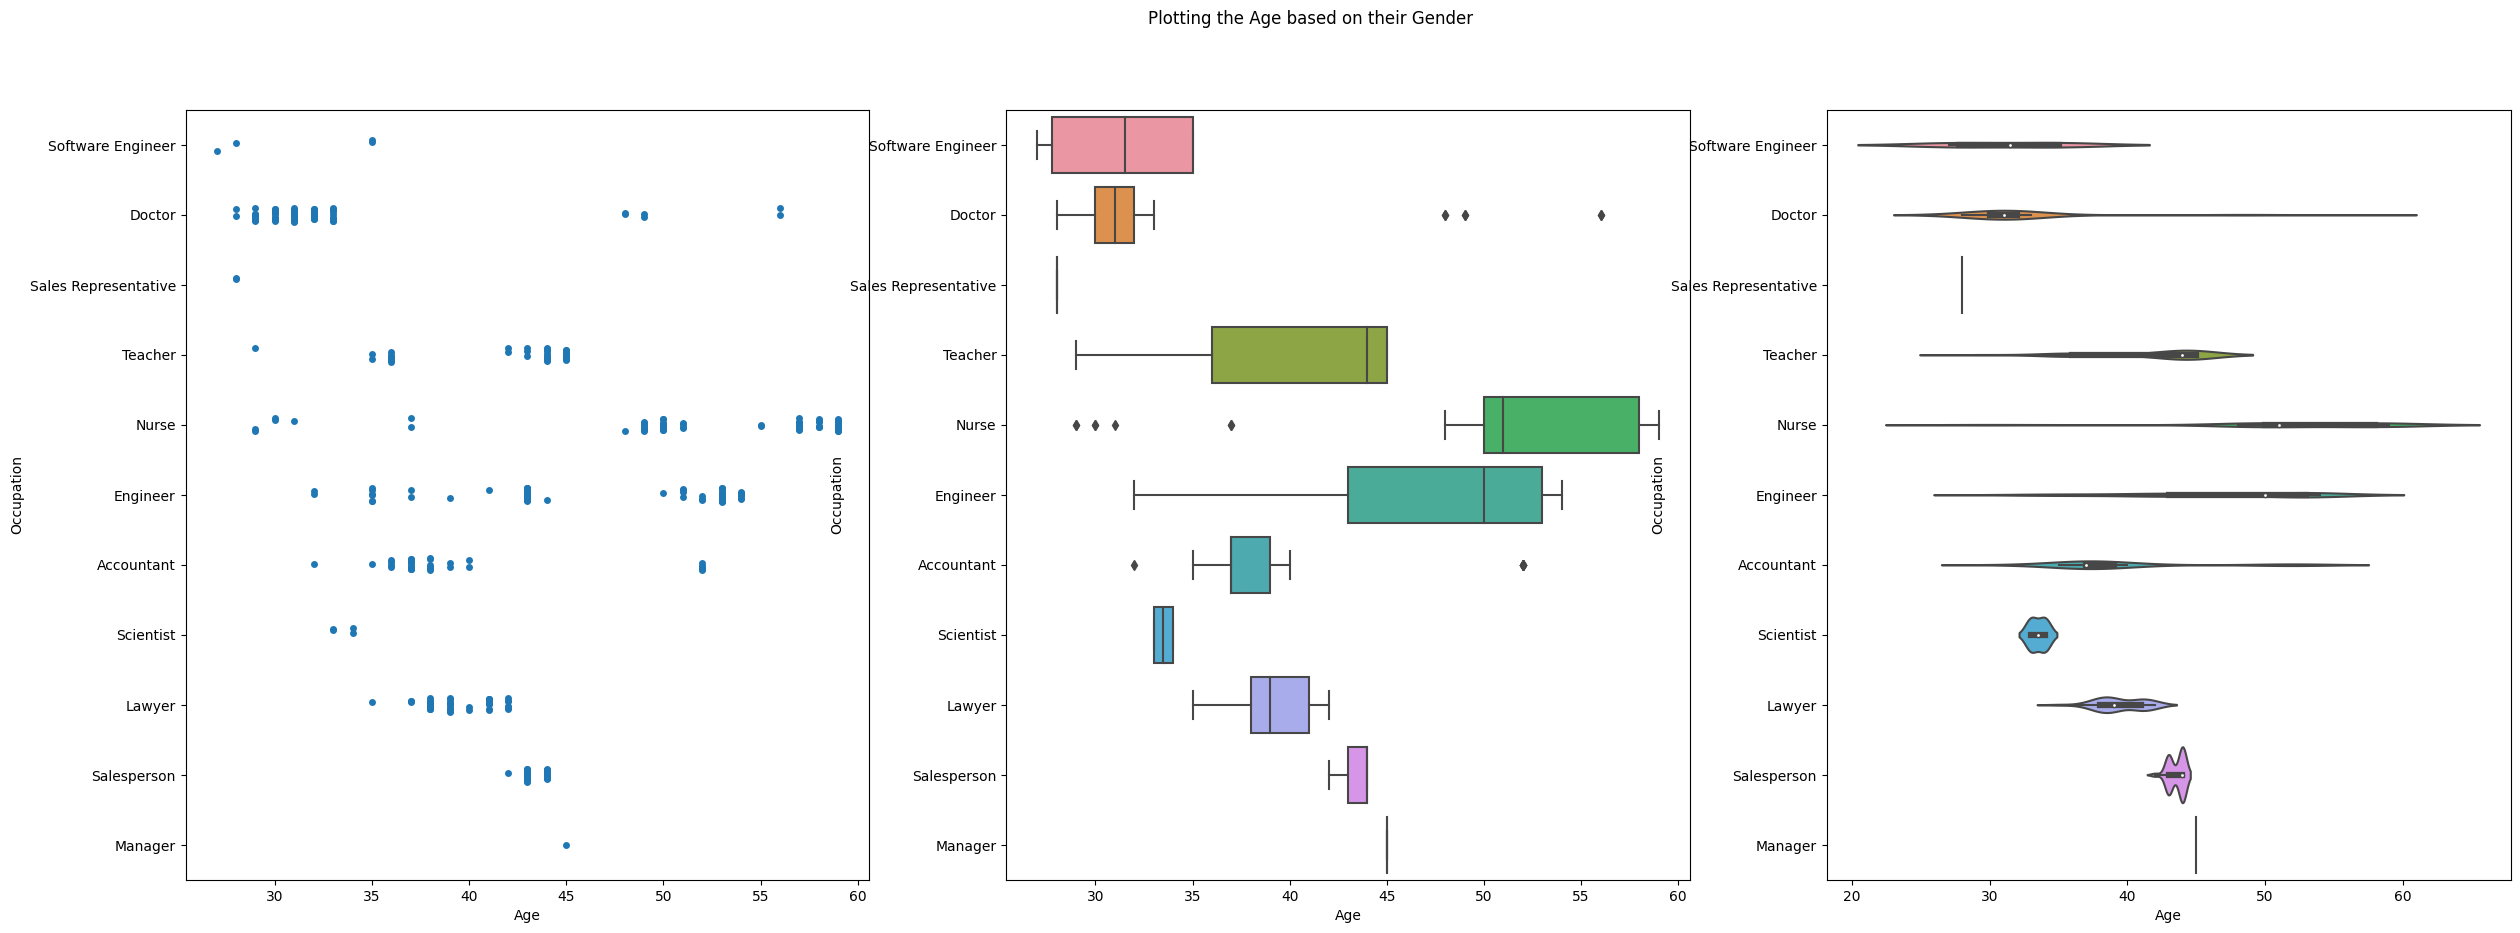

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[0]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[0], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[0], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[0], ax = axes[2])

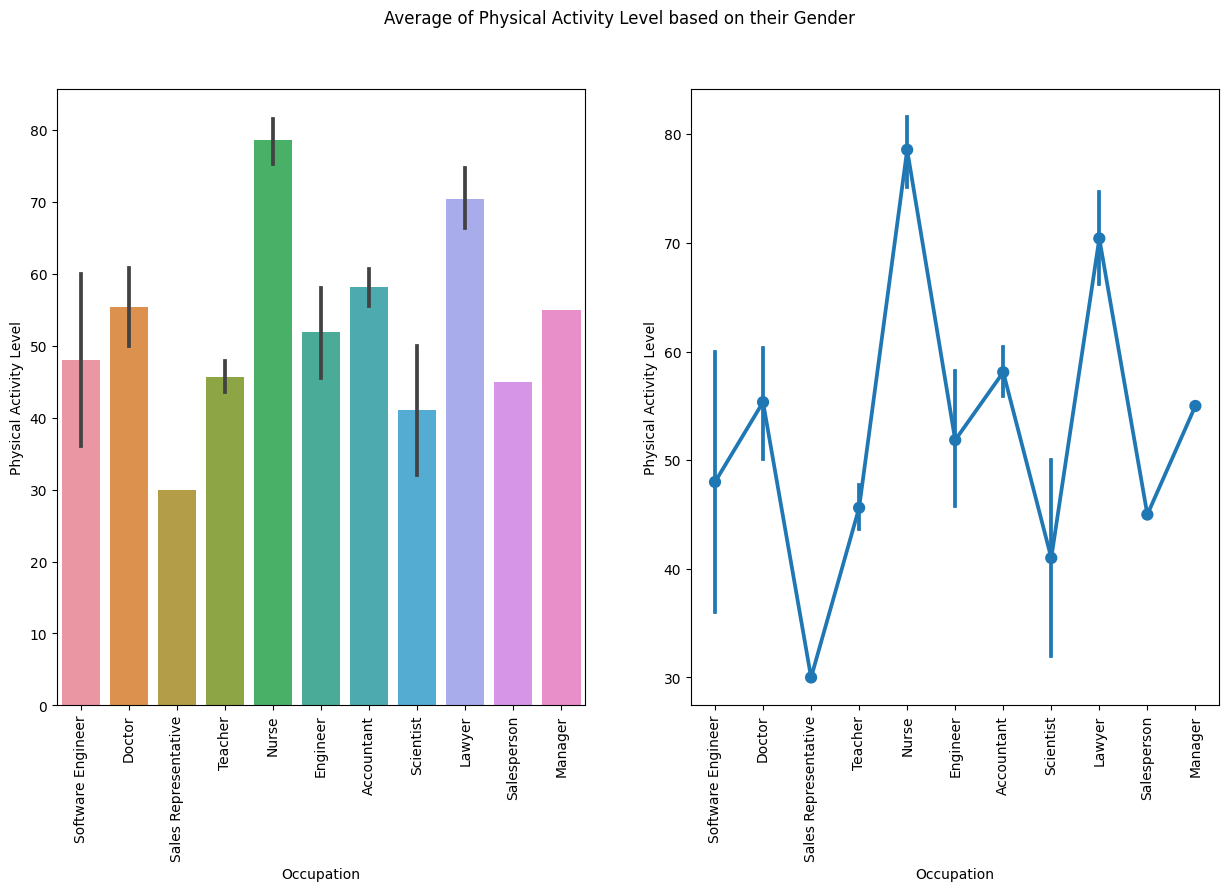

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[1]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[1], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[1], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Physical Activity Level', ylabel='Occupation'>

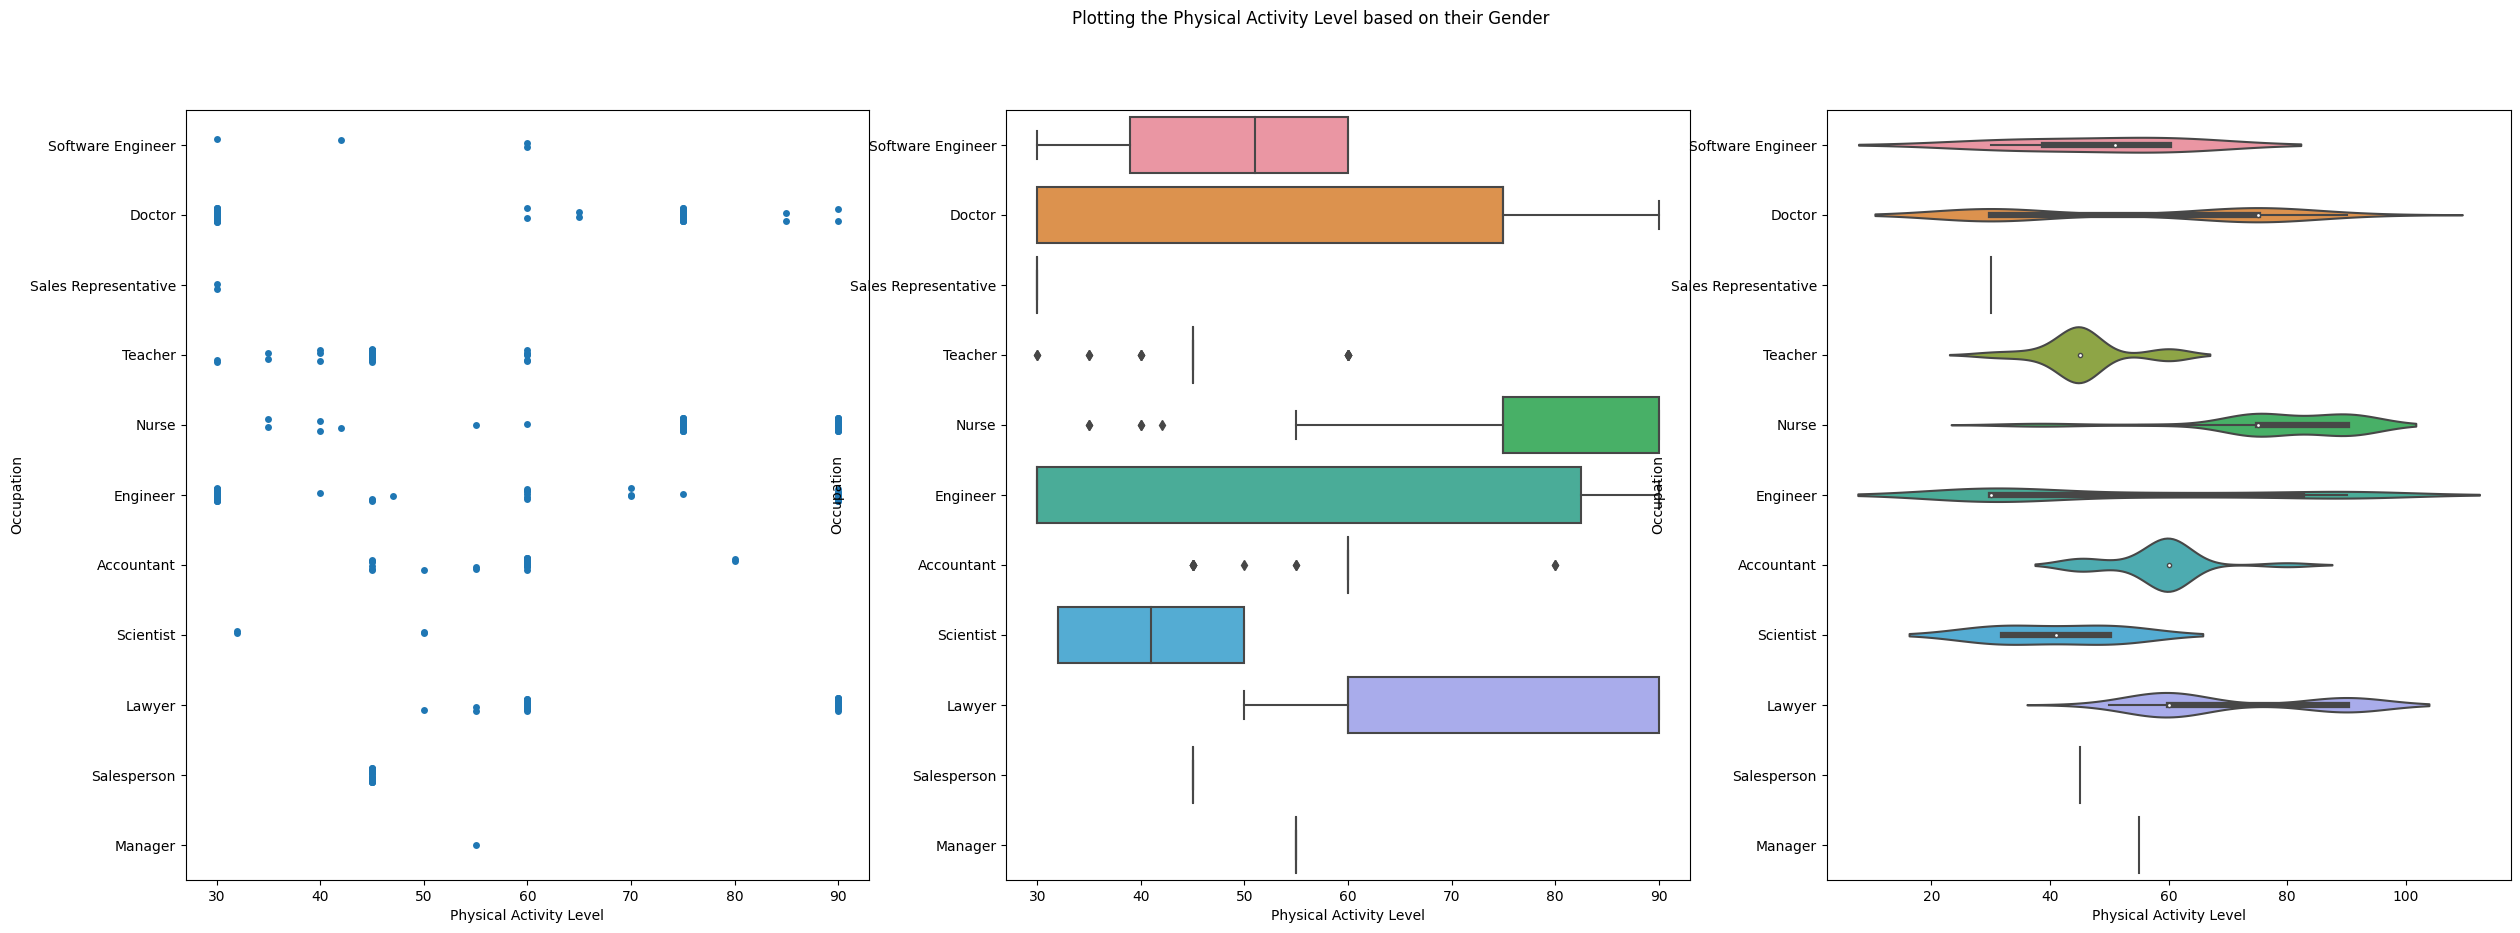

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[1]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[1], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[1], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[1], ax = axes[2])

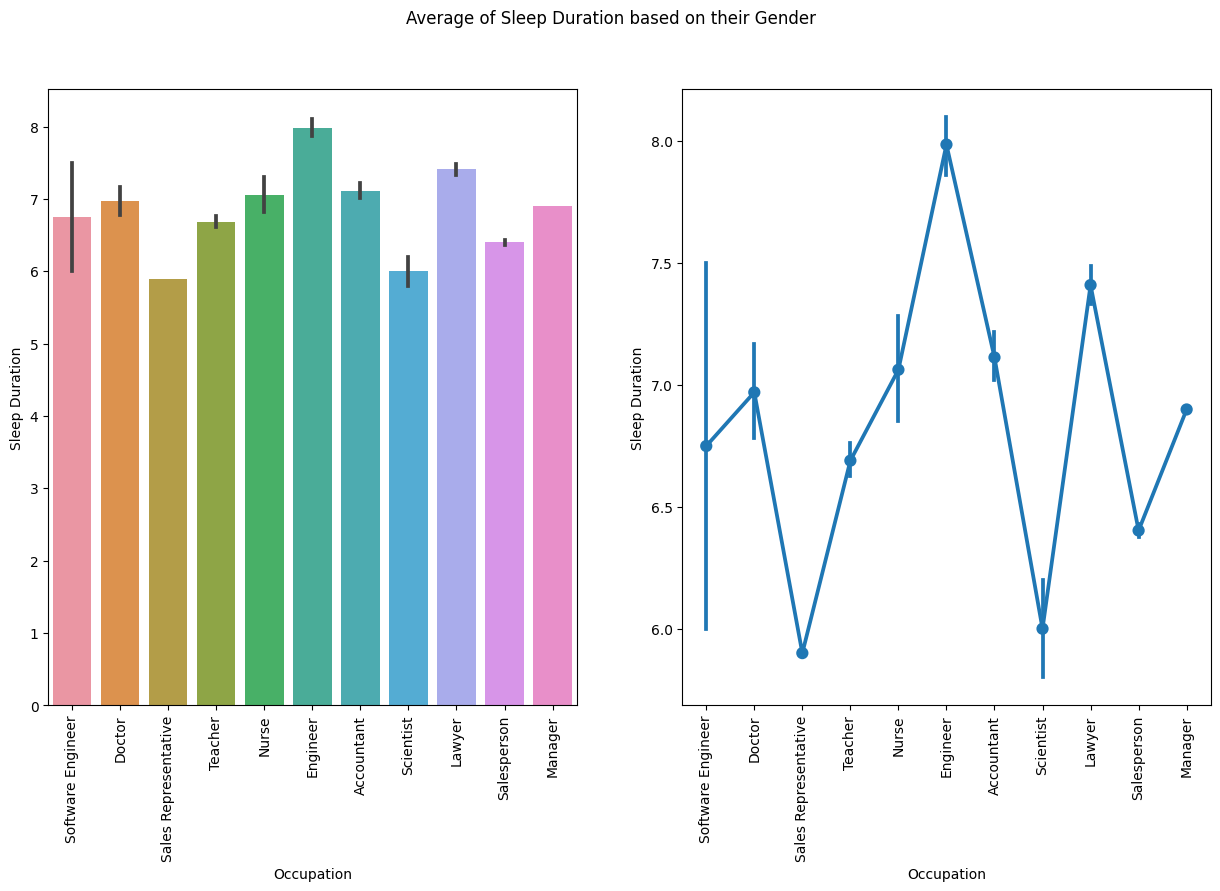

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[3]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[3], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[3], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

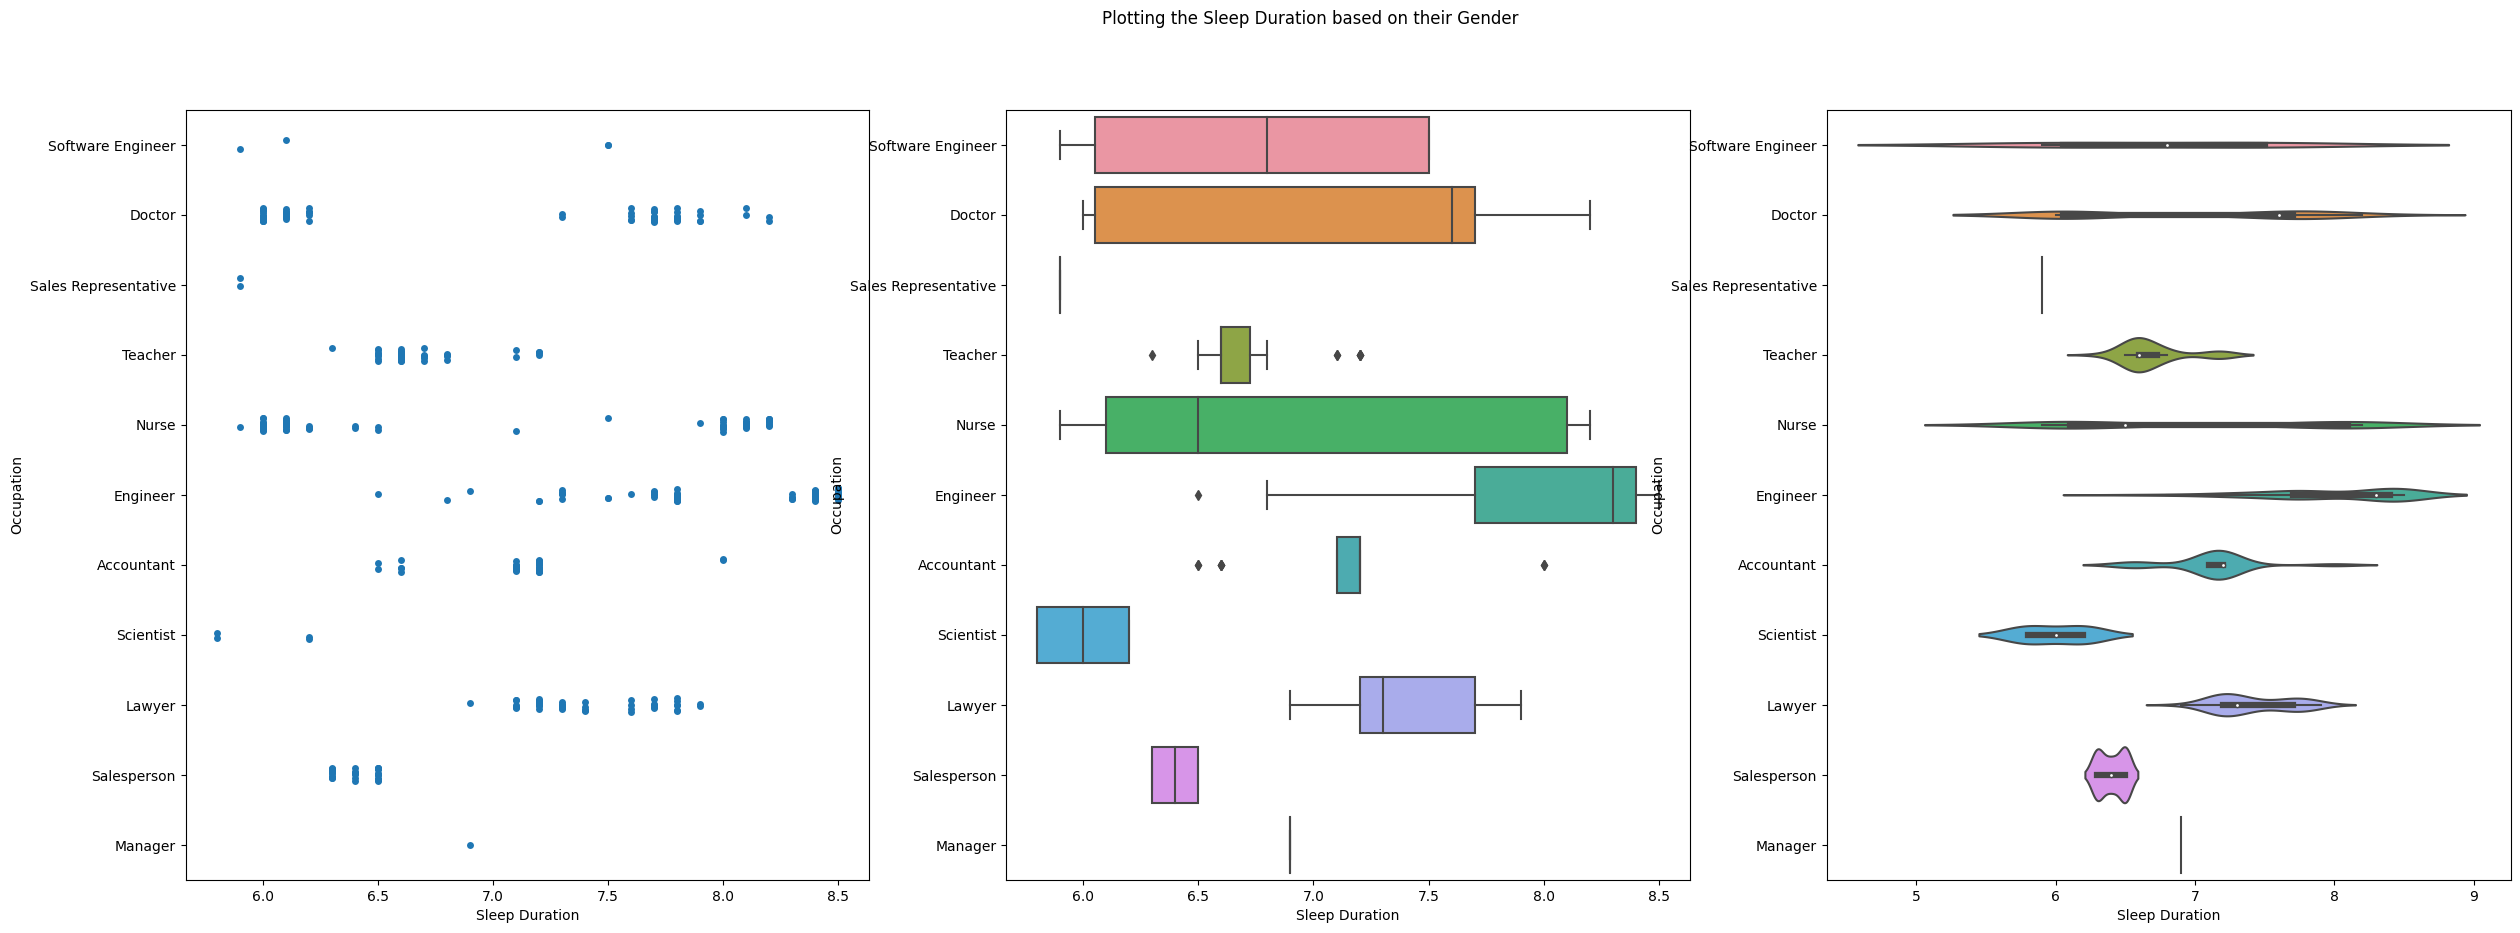

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[3]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[3], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[3], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[3], ax = axes[2])

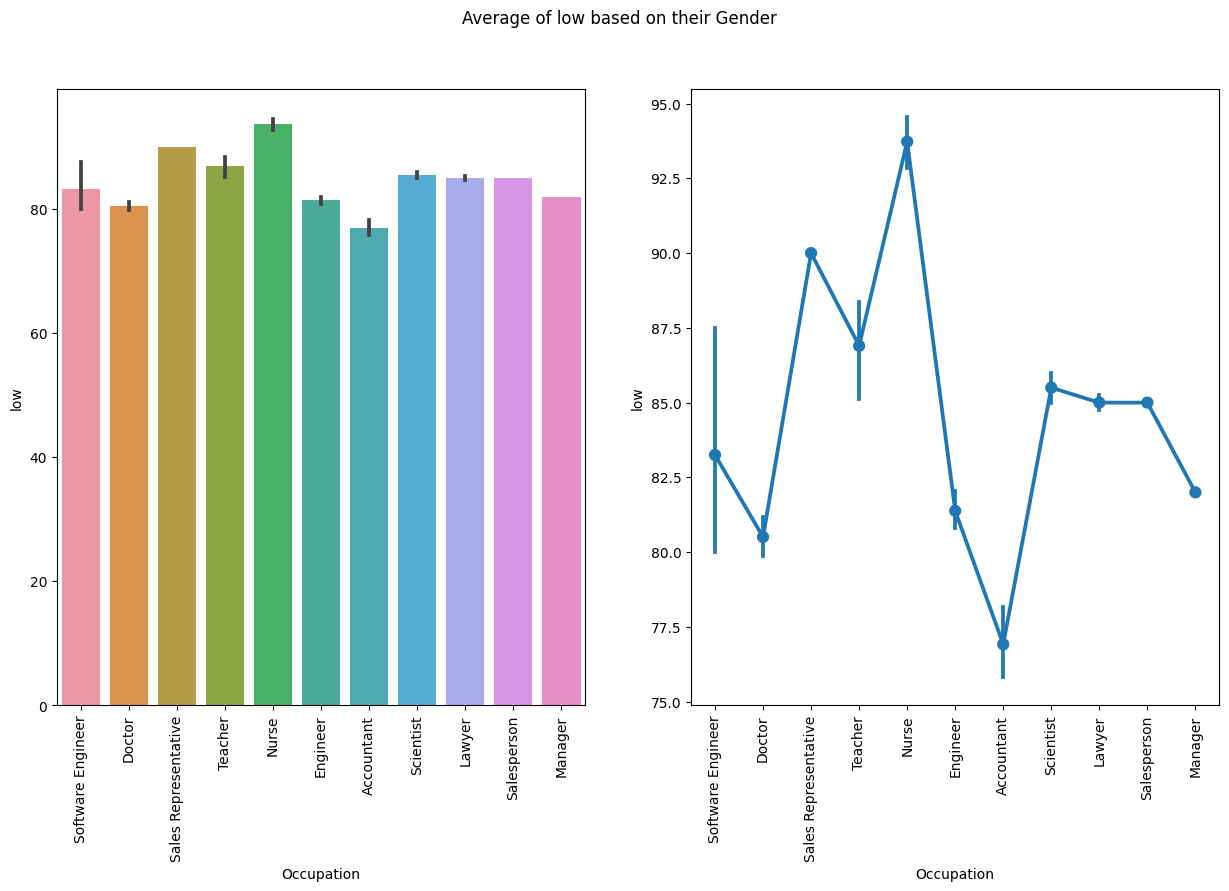

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[4]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[4], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[4], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='low', ylabel='Occupation'>

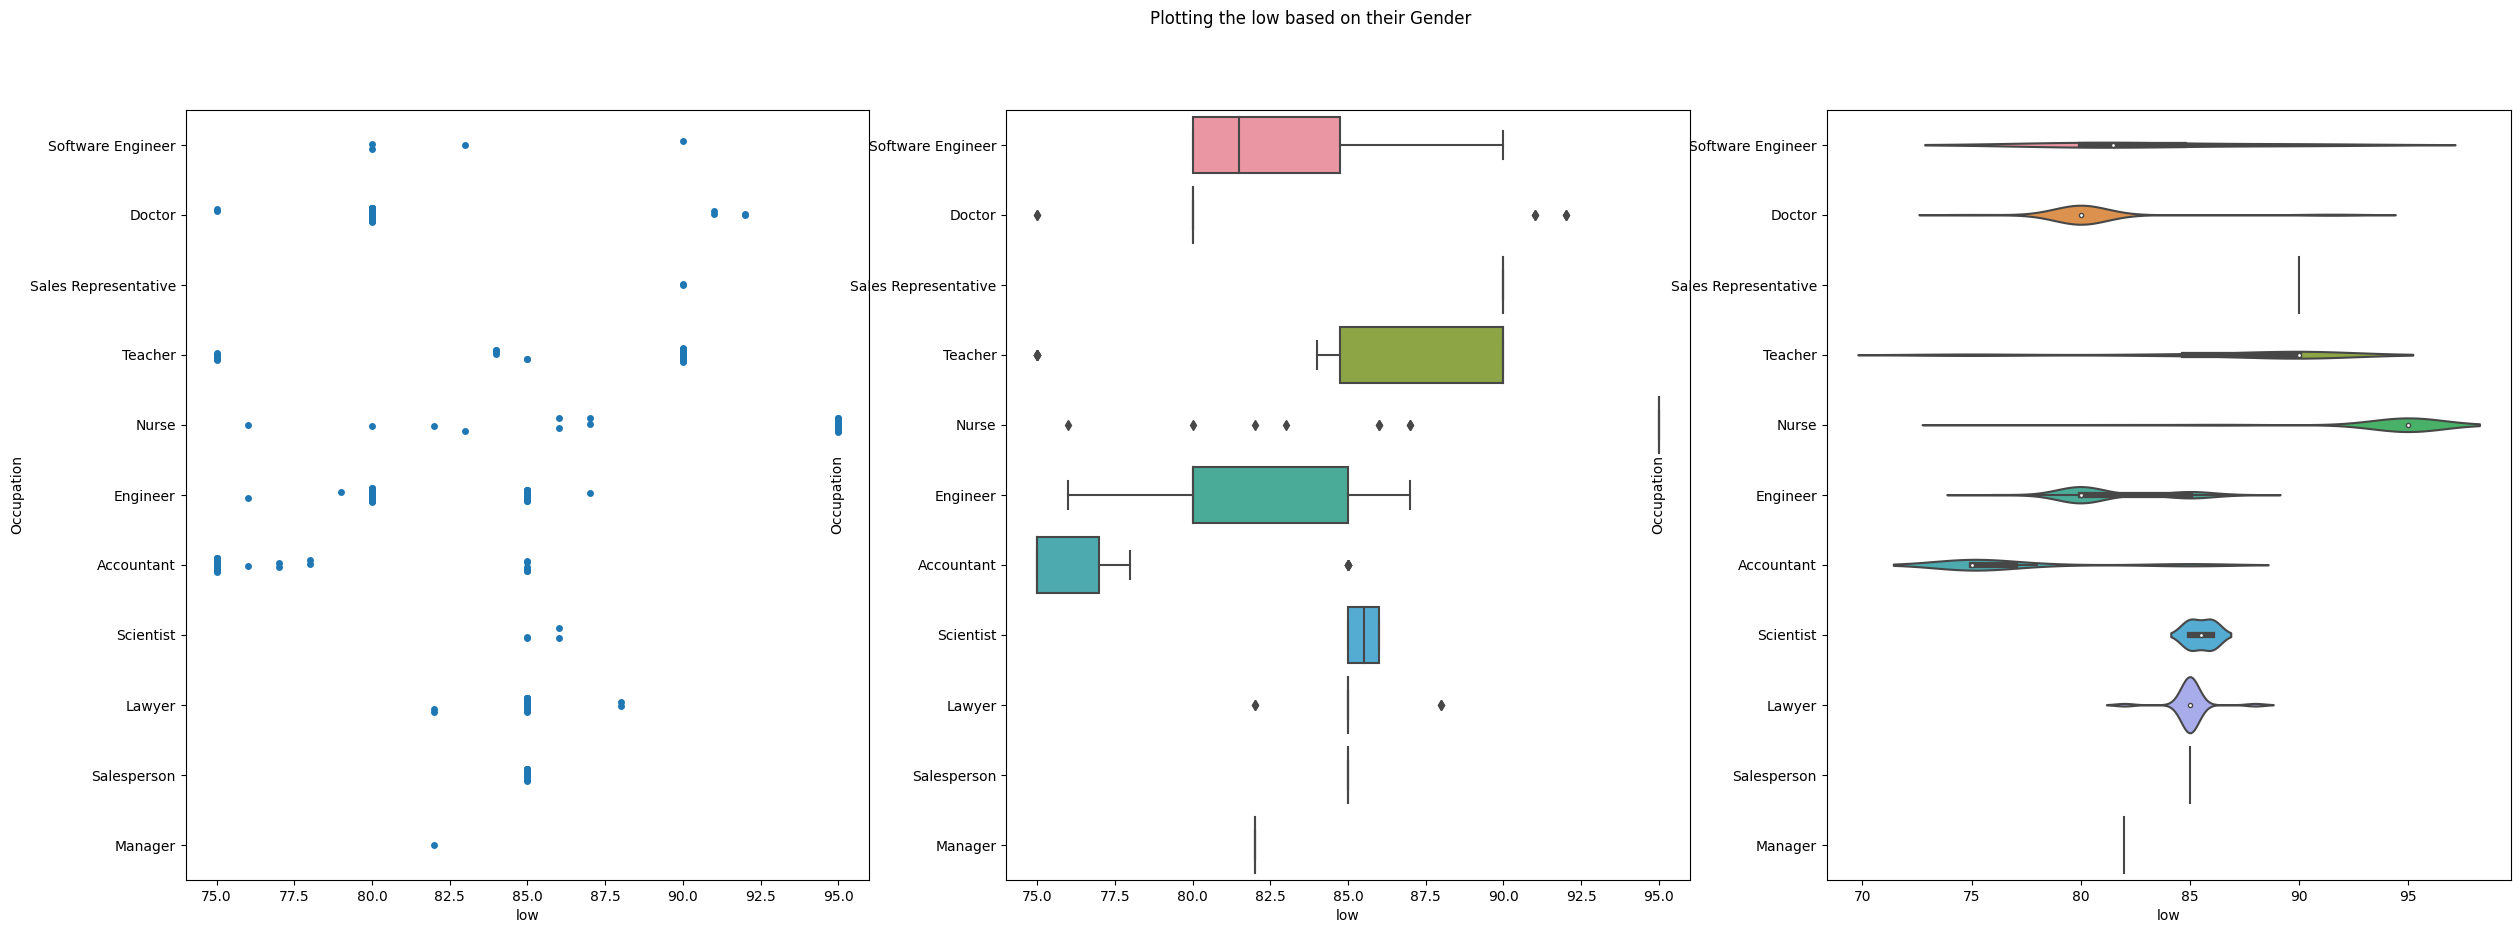

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[4]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[4], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[4], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[4], ax = axes[2])

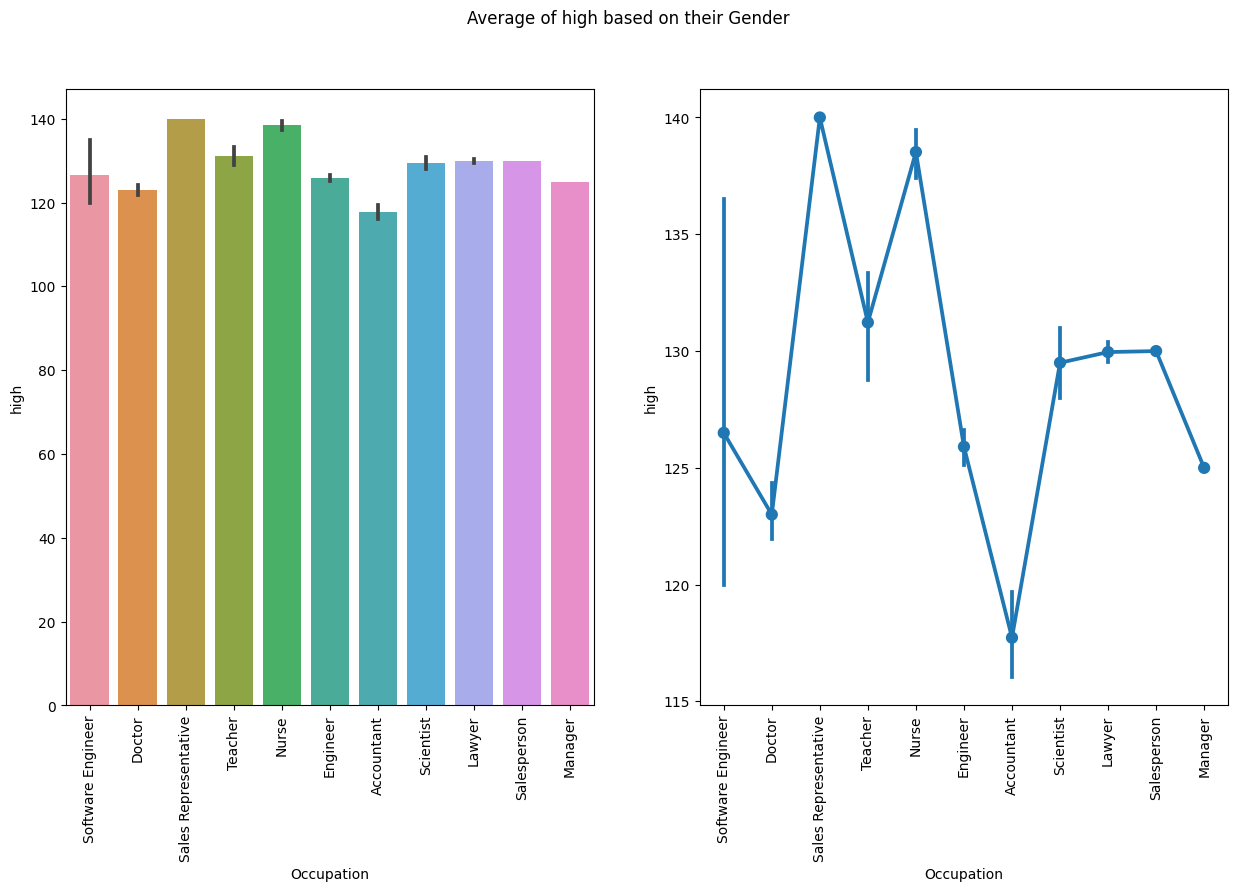

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[5]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[5], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[5], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='high', ylabel='Occupation'>

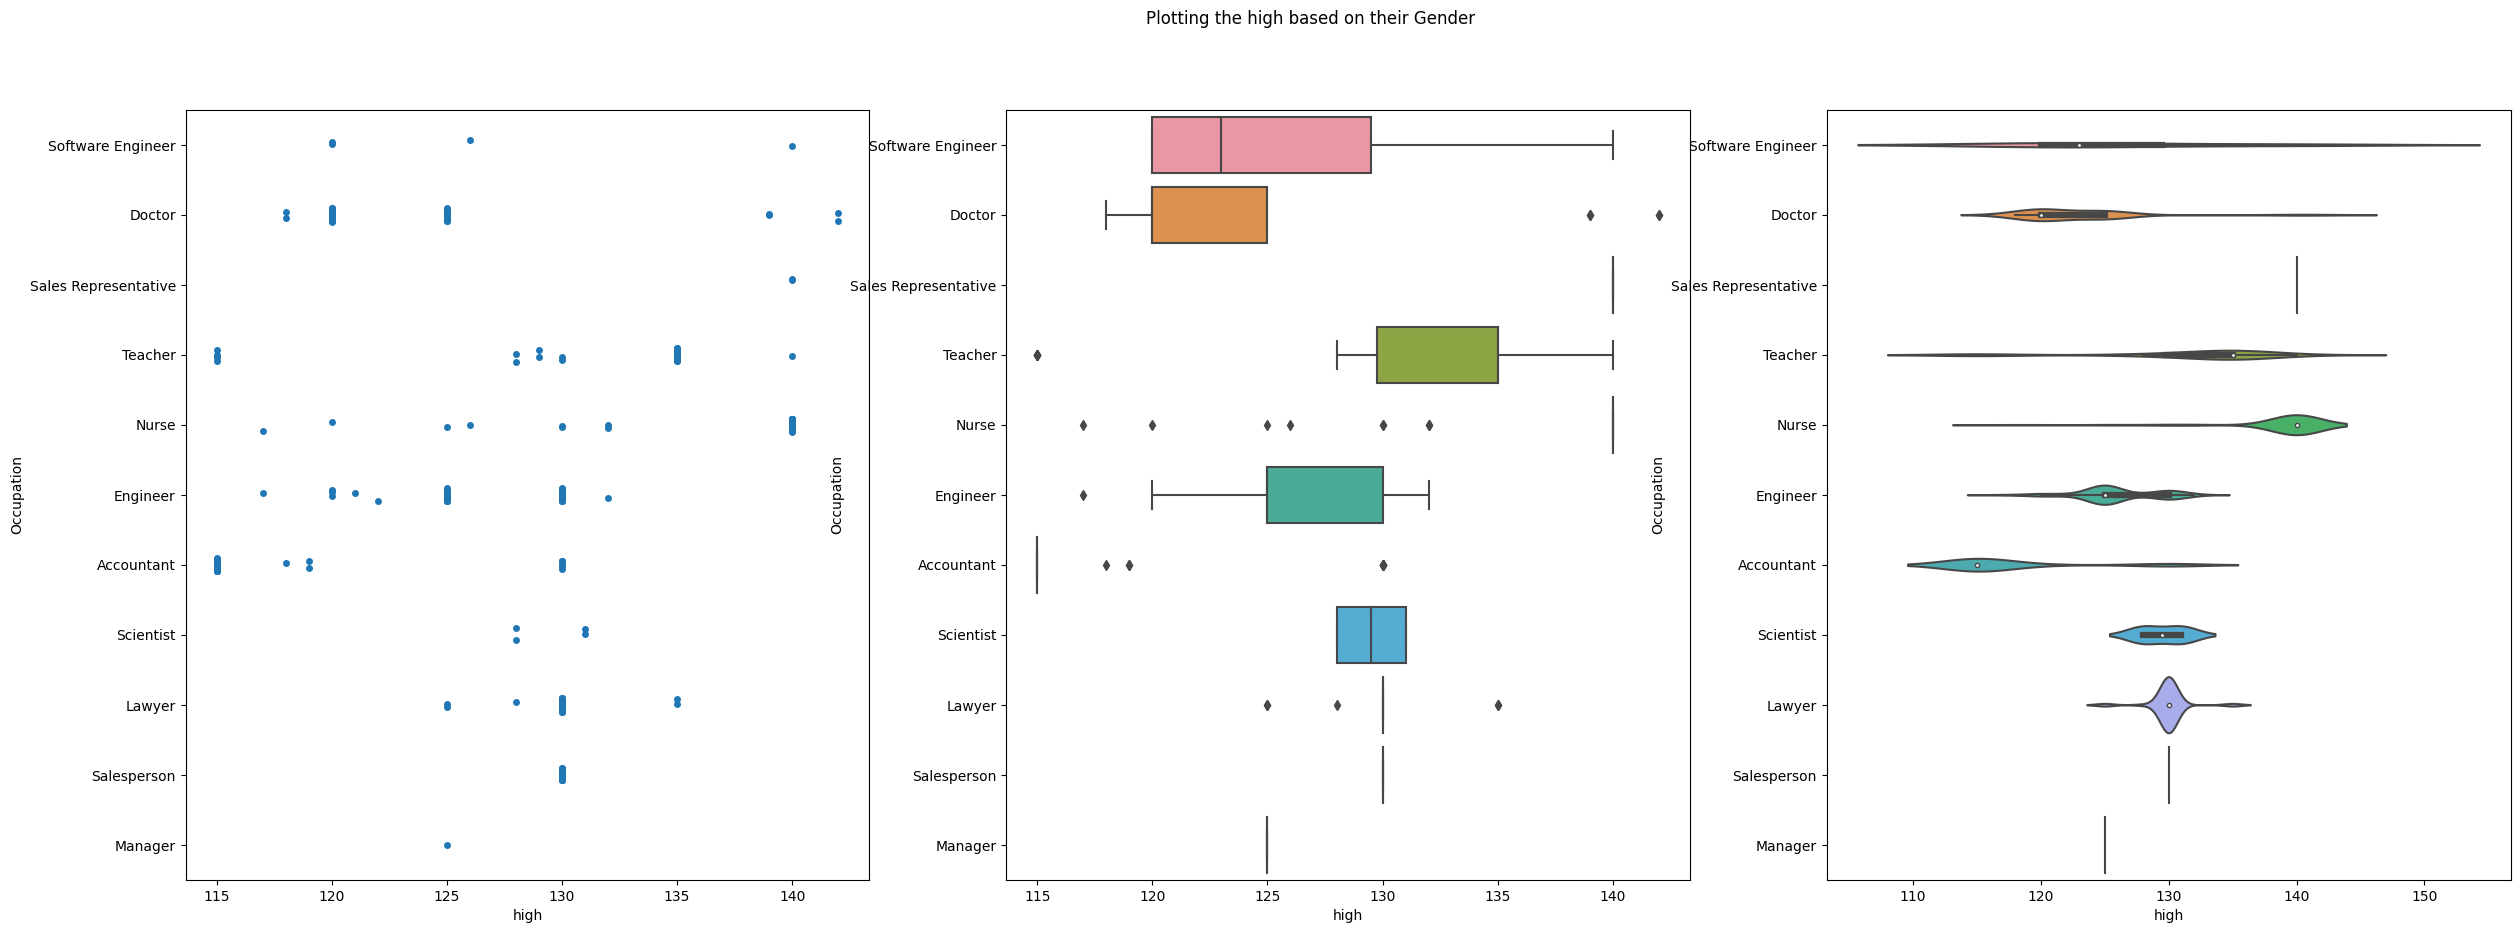

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[5]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[5], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[5], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[5], ax = axes[2])

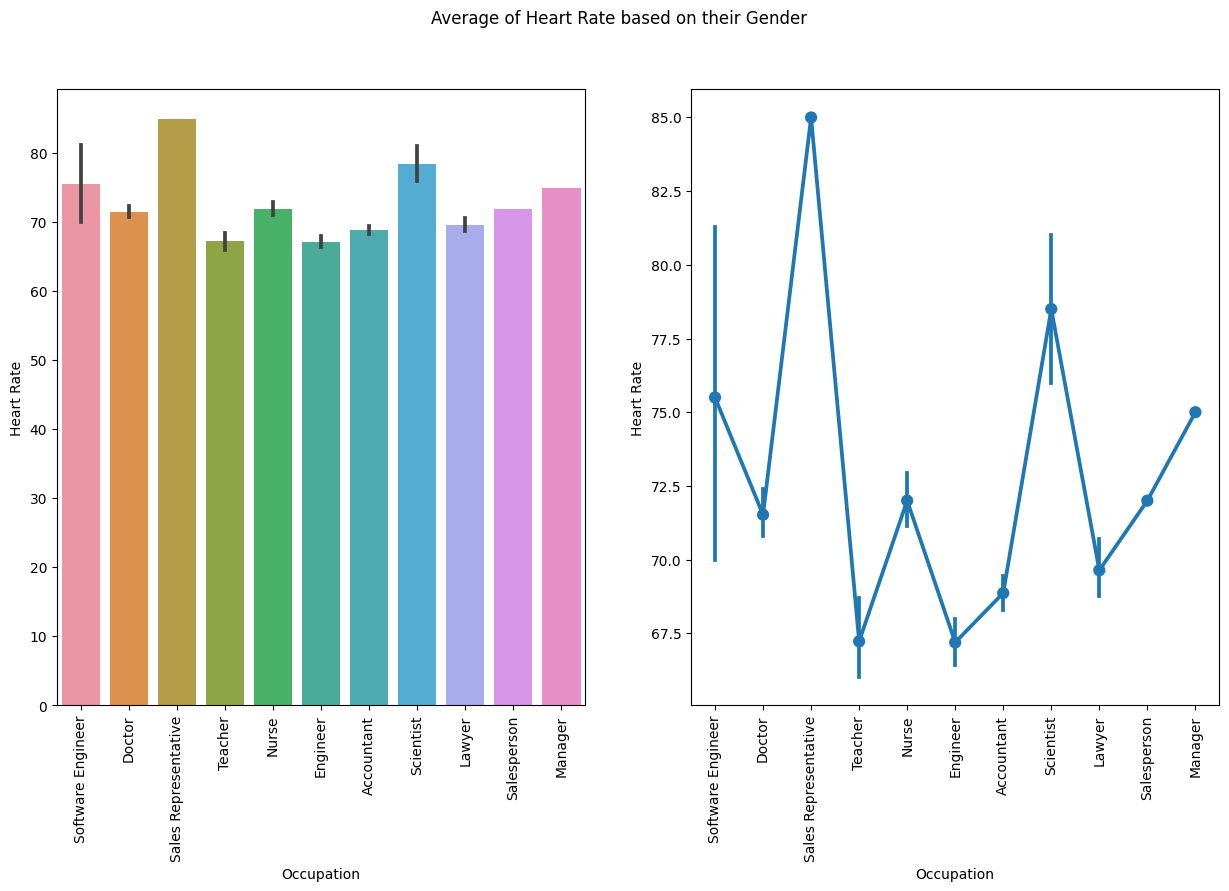

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[6]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[6], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[6], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Heart Rate', ylabel='Occupation'>

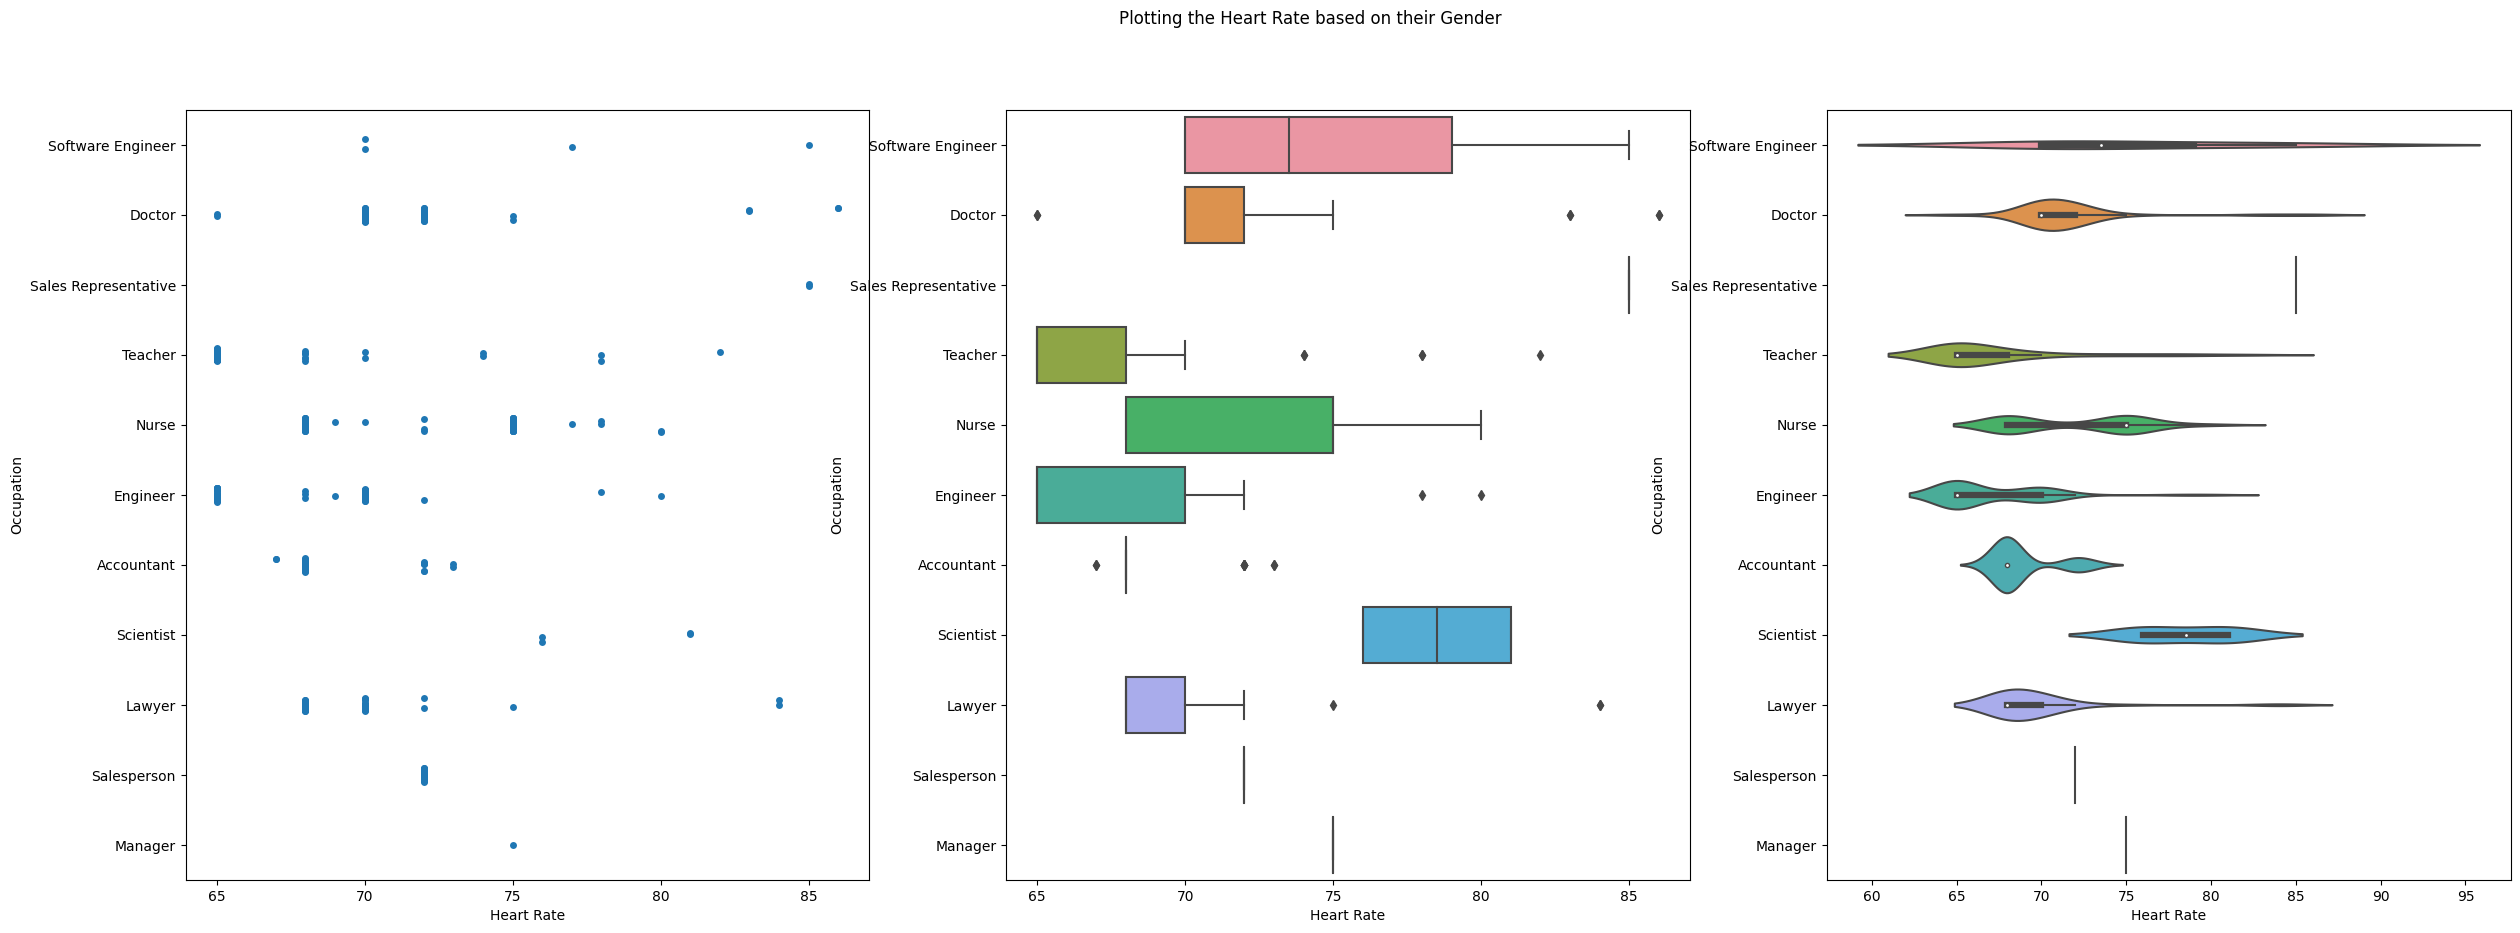

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[6]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[6], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[6], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[6], ax = axes[2])

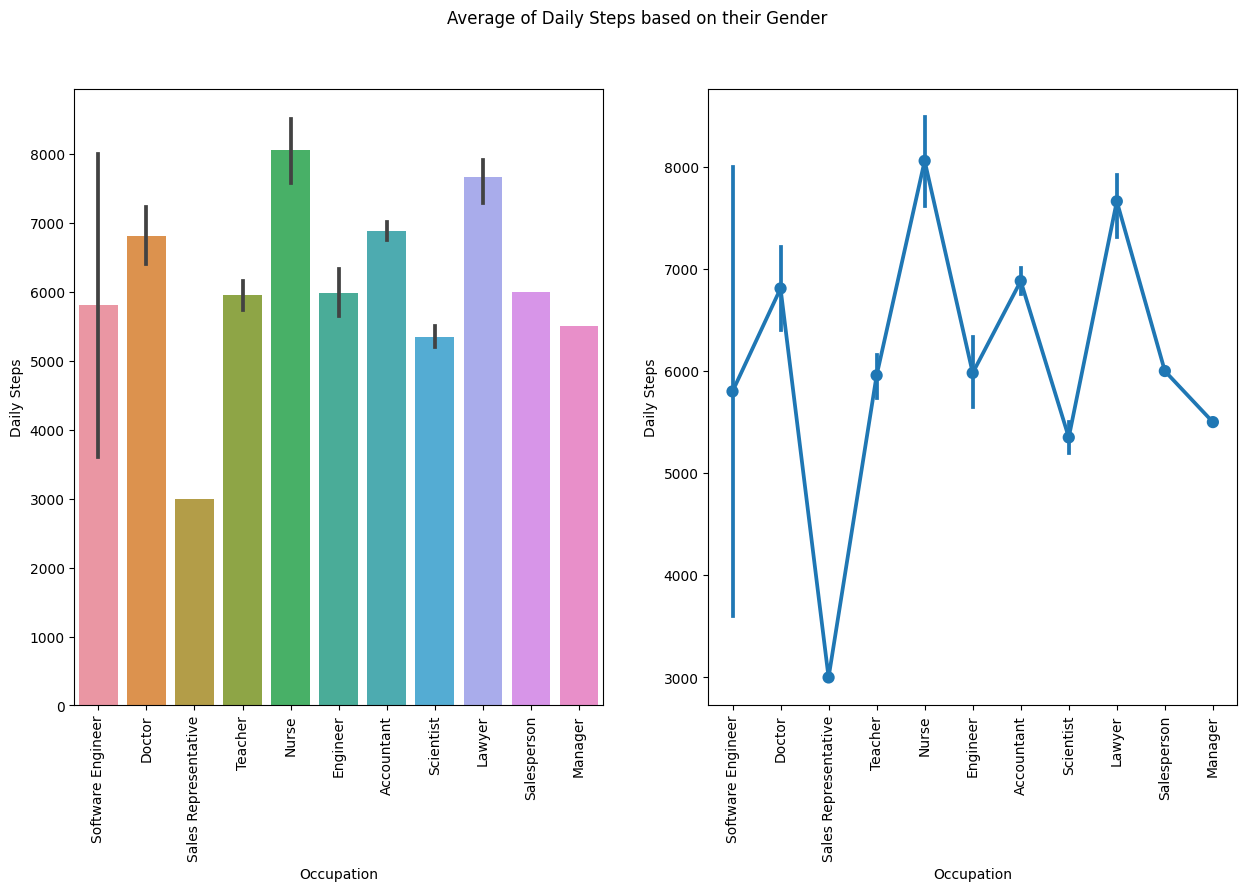

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[7]} based on their Gender")
sns.barplot(df, x = "Occupation", y = continuous_var[7], ax = axes[0])
sns.pointplot(df, x = "Occupation", y = continuous_var[7], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Daily Steps', ylabel='Occupation'>

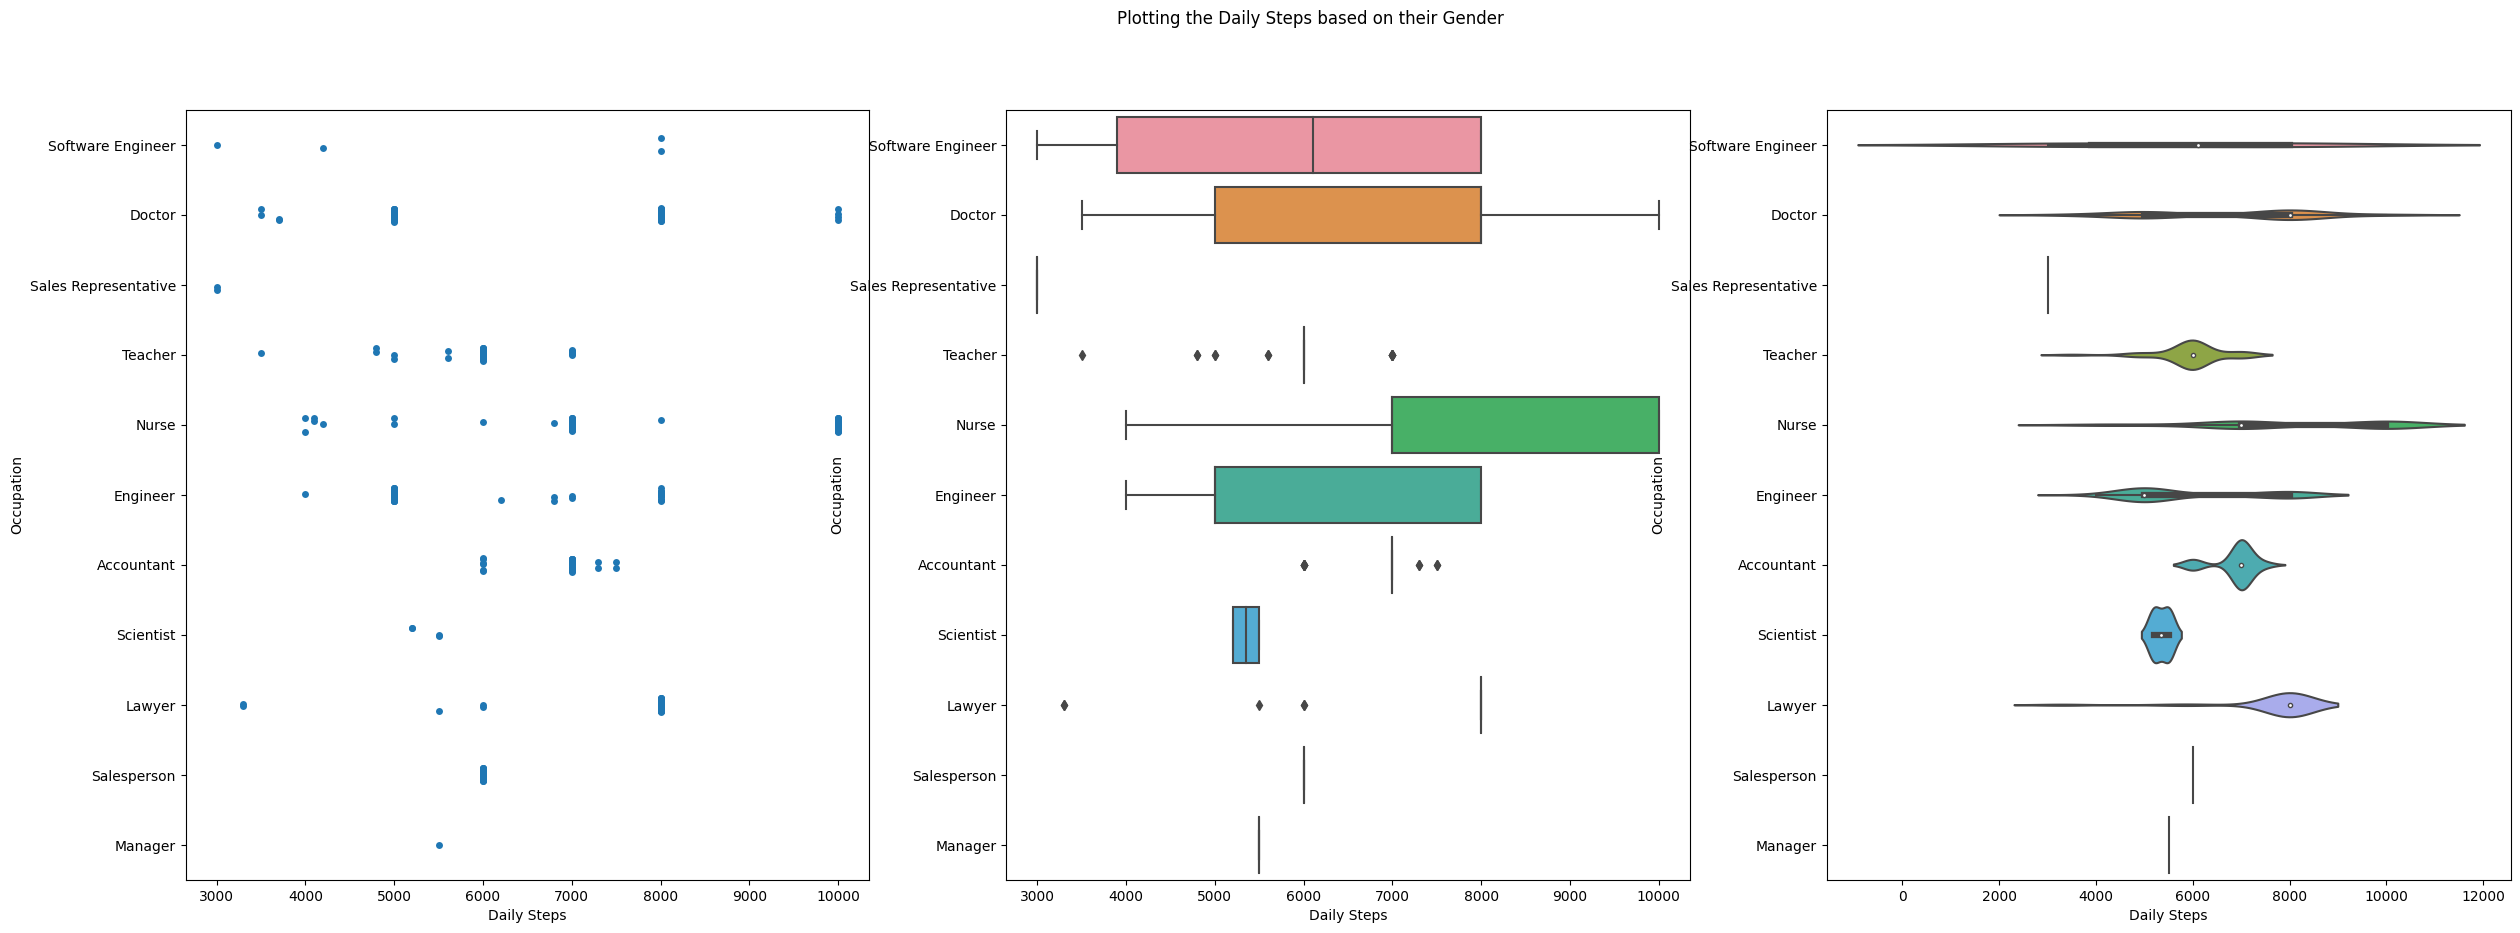

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[7]} based on their Gender")
sns.stripplot(df, y = "Occupation", x = continuous_var[7], ax = axes[0])
sns.boxplot(df, y = "Occupation", x = continuous_var[7], ax = axes[1])
sns.violinplot(df, y = "Occupation", x = continuous_var[7], ax = axes[2])

# Analyzing the BMI Category

In [ ]:
df["BMI Category"].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [ ]:
# Changing the name of normal weight to normal
df["BMI Category"] = df["BMI Category"].replace({"Normal Weight": "Normal"})

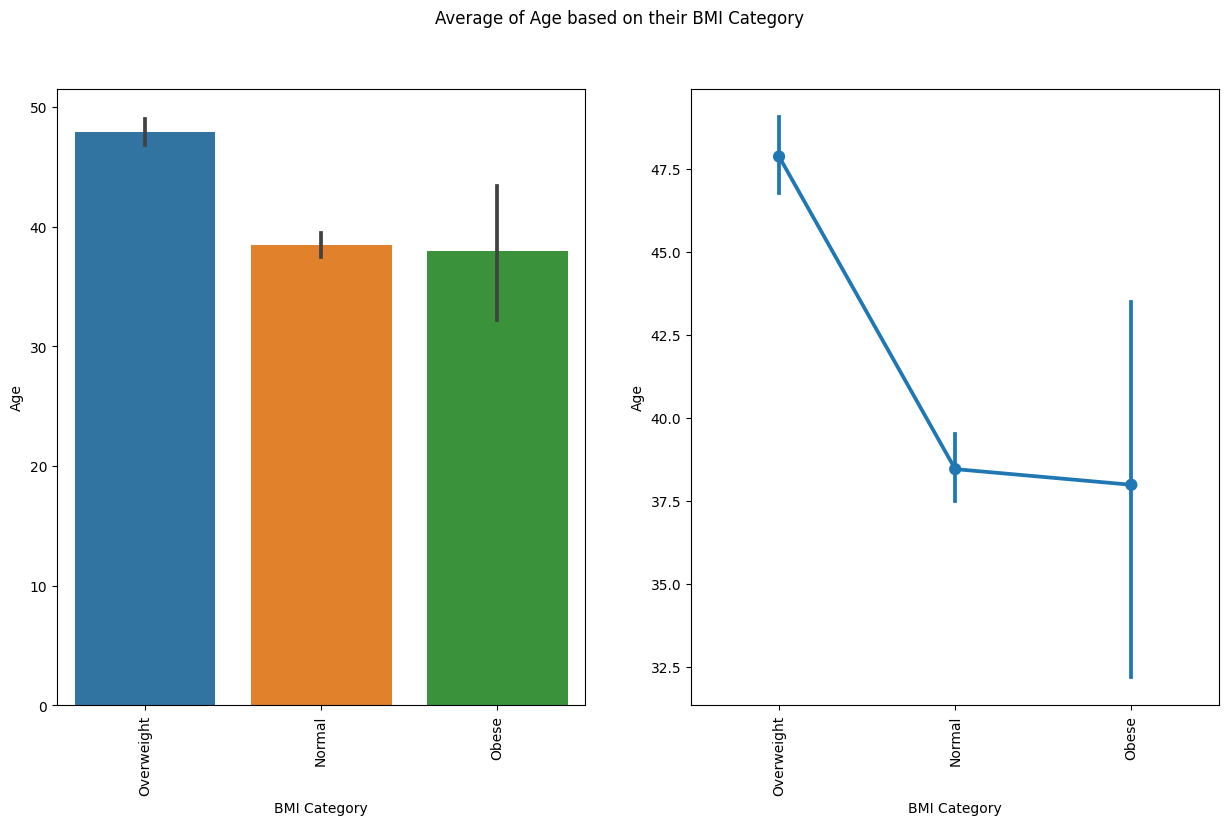

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[0]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = "Age", ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = "Age", ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Age', ylabel='BMI Category'>

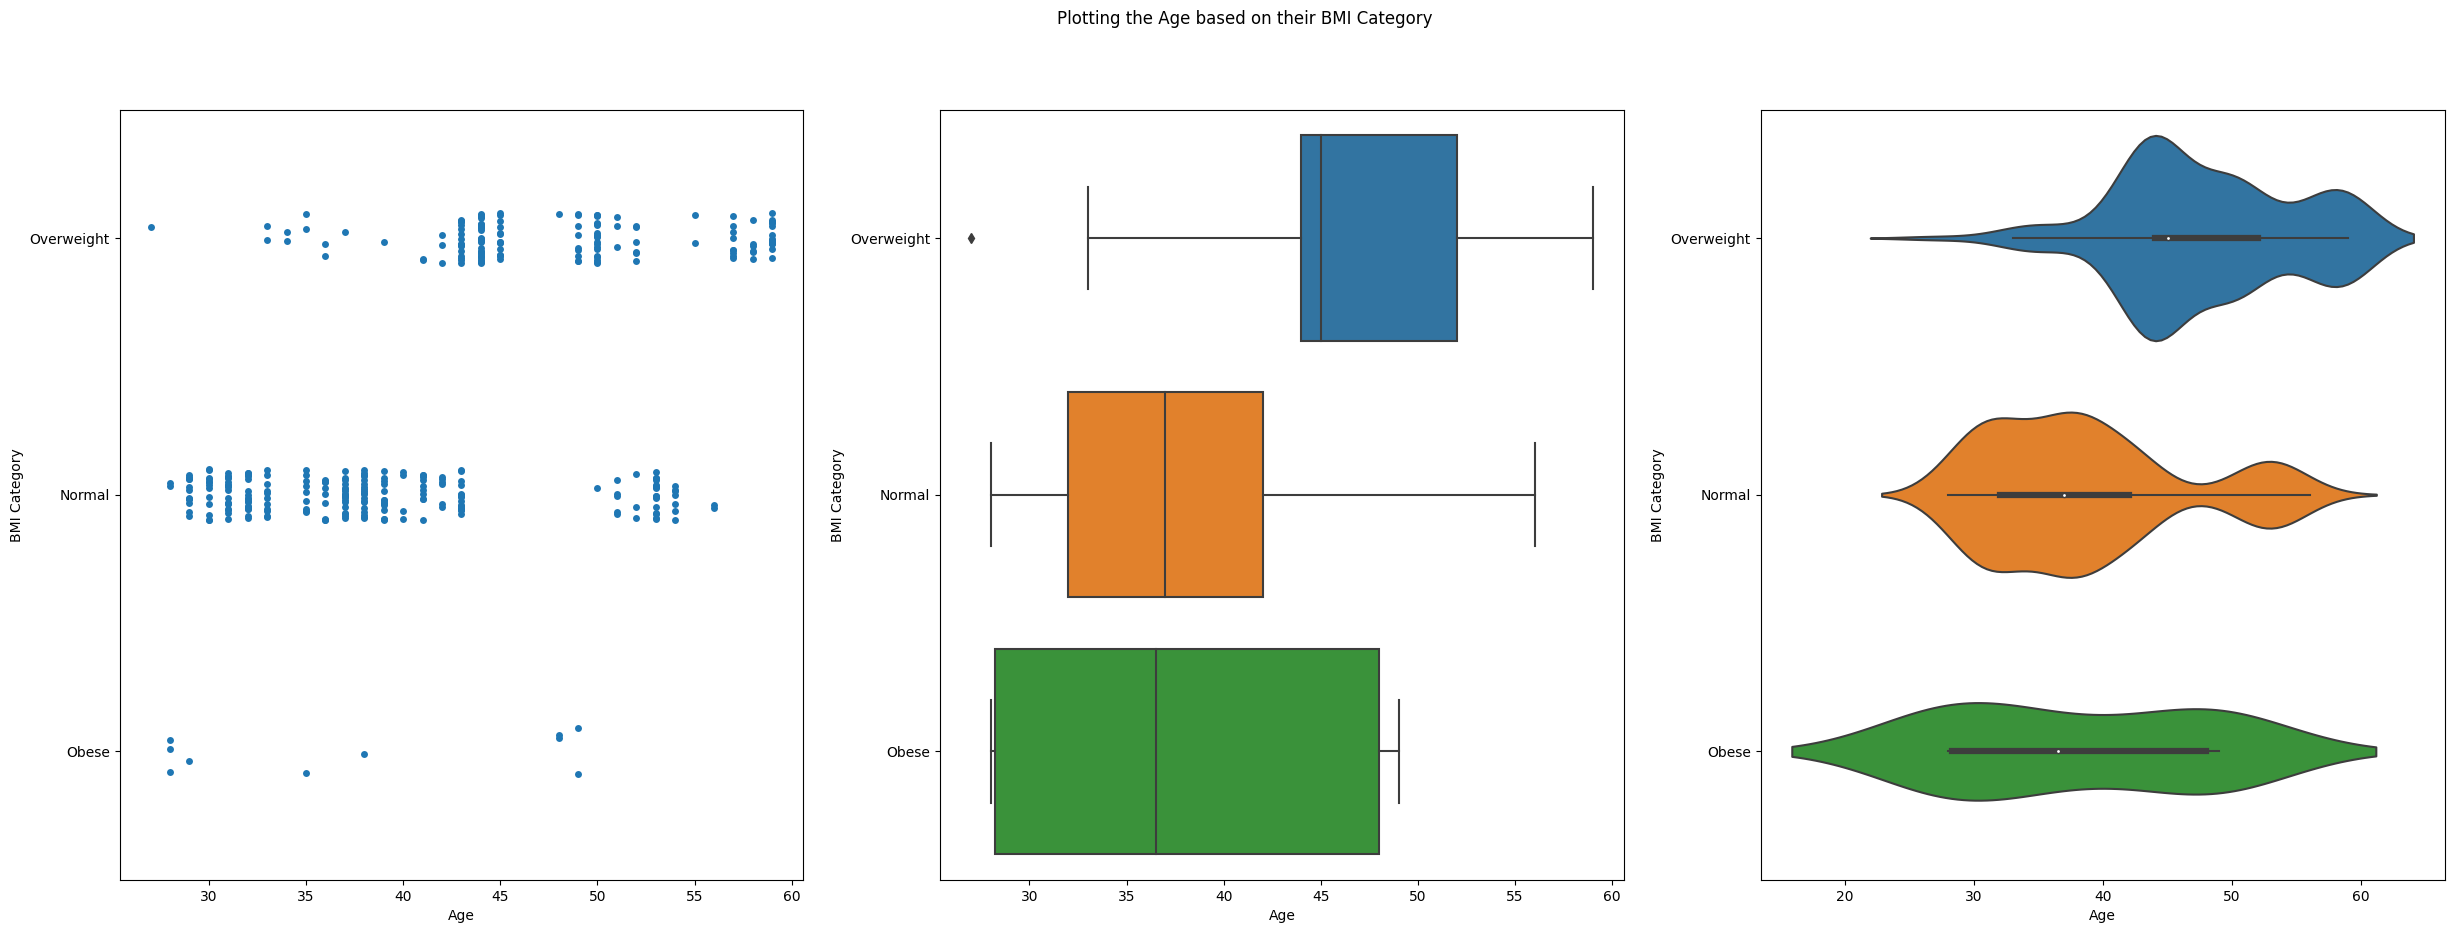

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[0]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[0], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[0], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[0], ax = axes[2])

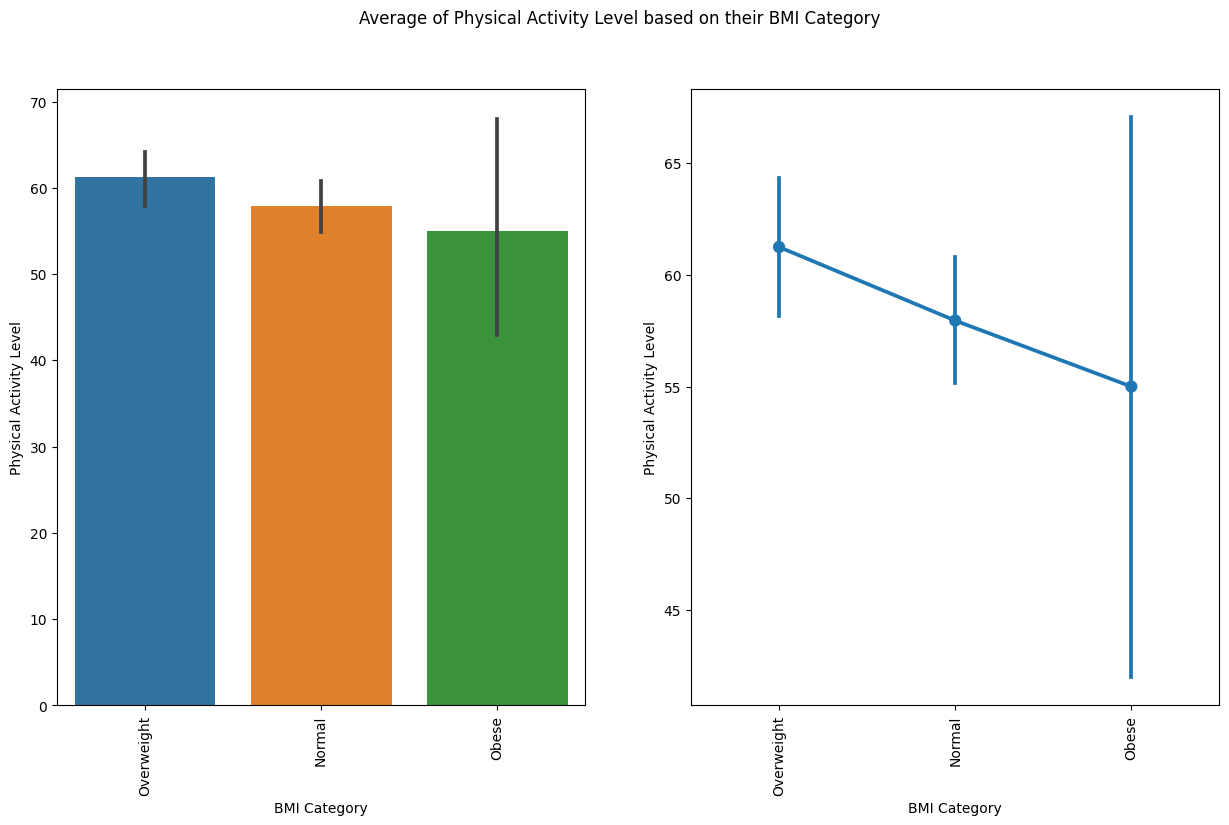

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[1]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[1], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[1], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Physical Activity Level', ylabel='BMI Category'>

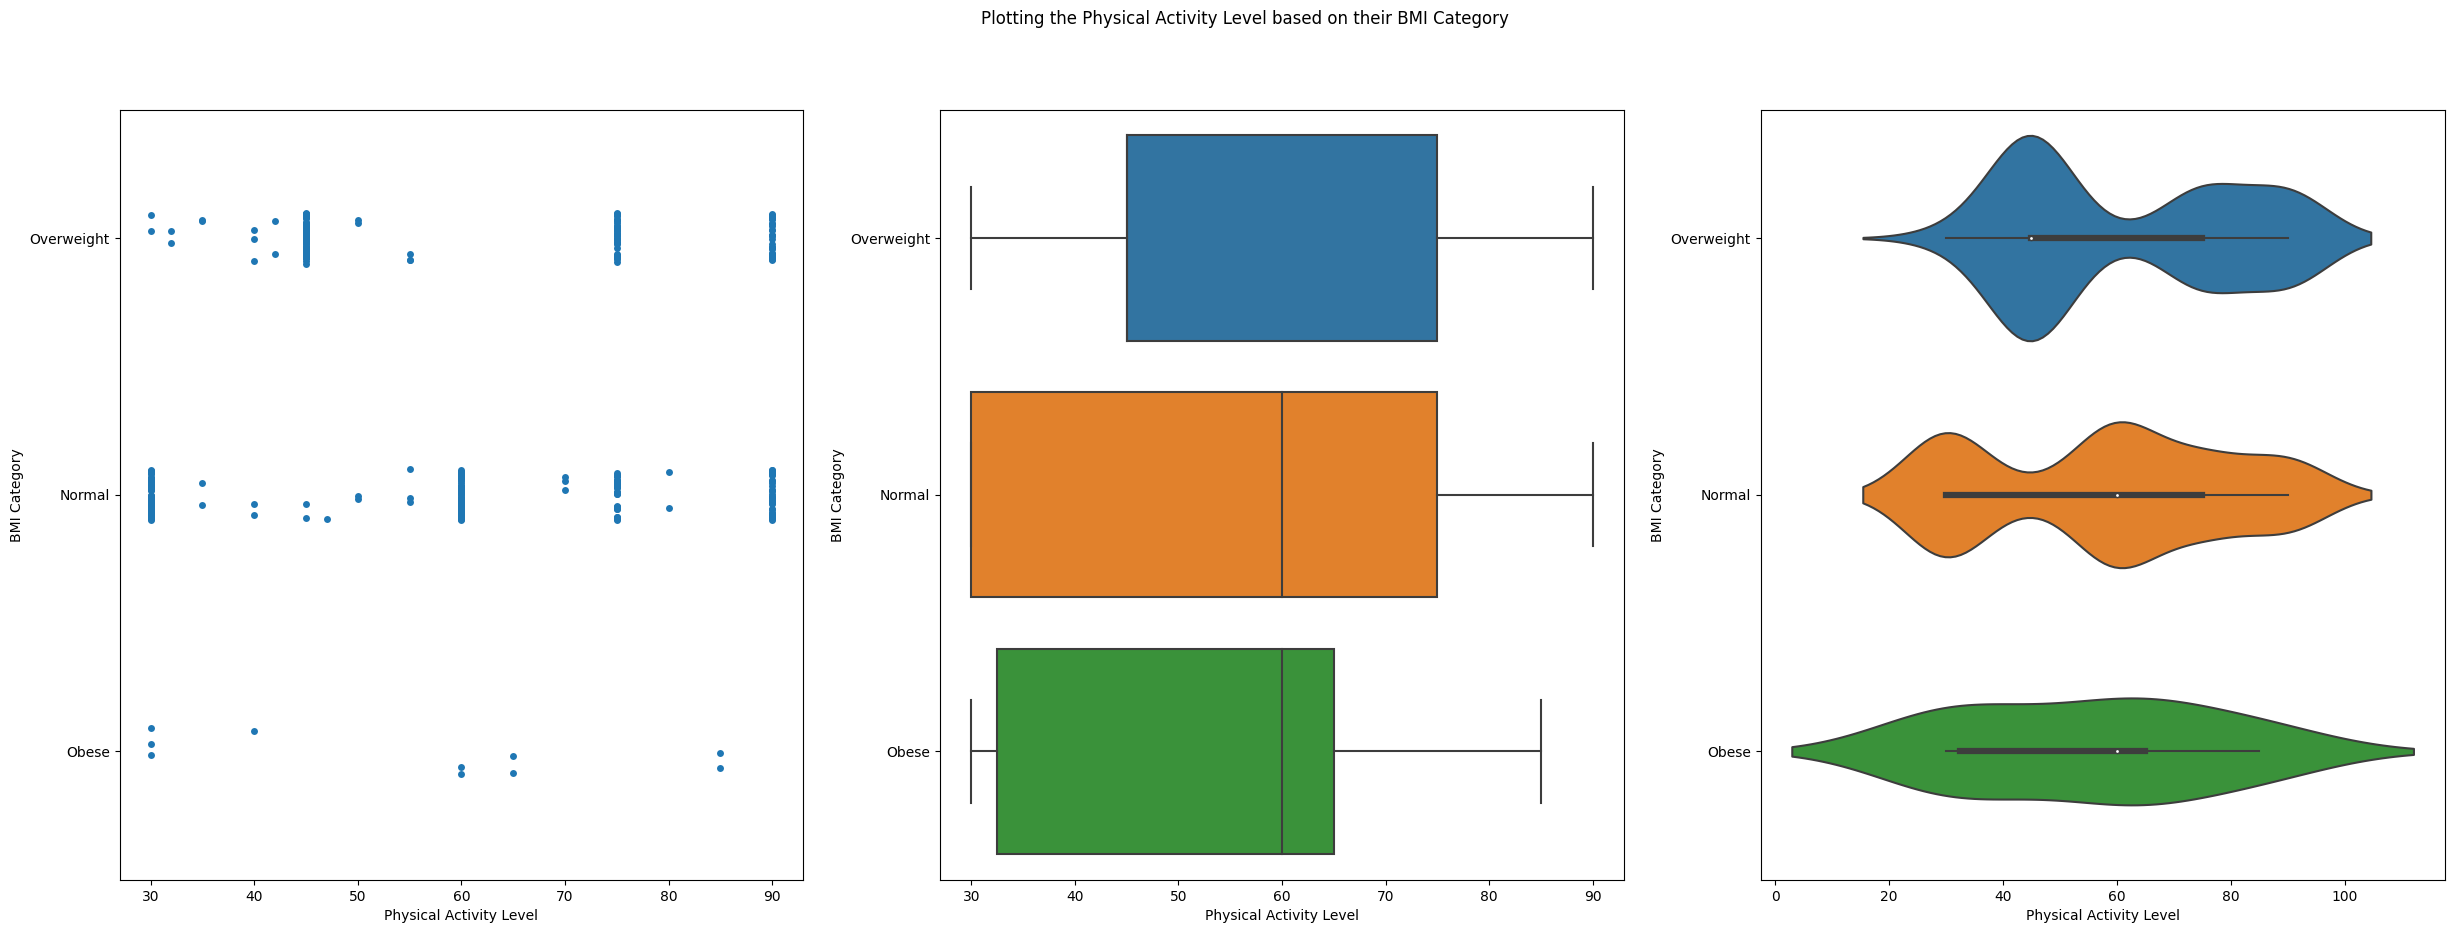

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[1]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[1], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[1], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[1], ax = axes[2])

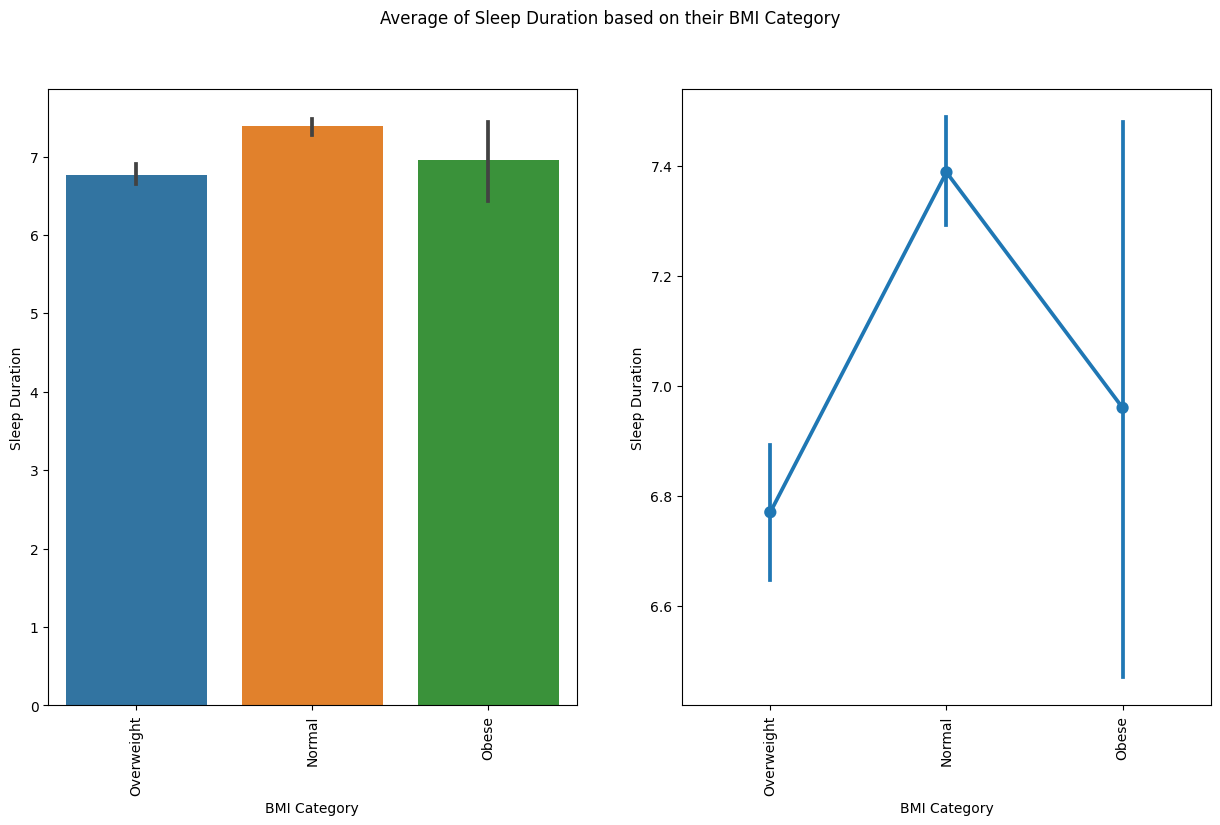

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[3]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[3], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[3], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Sleep Duration', ylabel='BMI Category'>

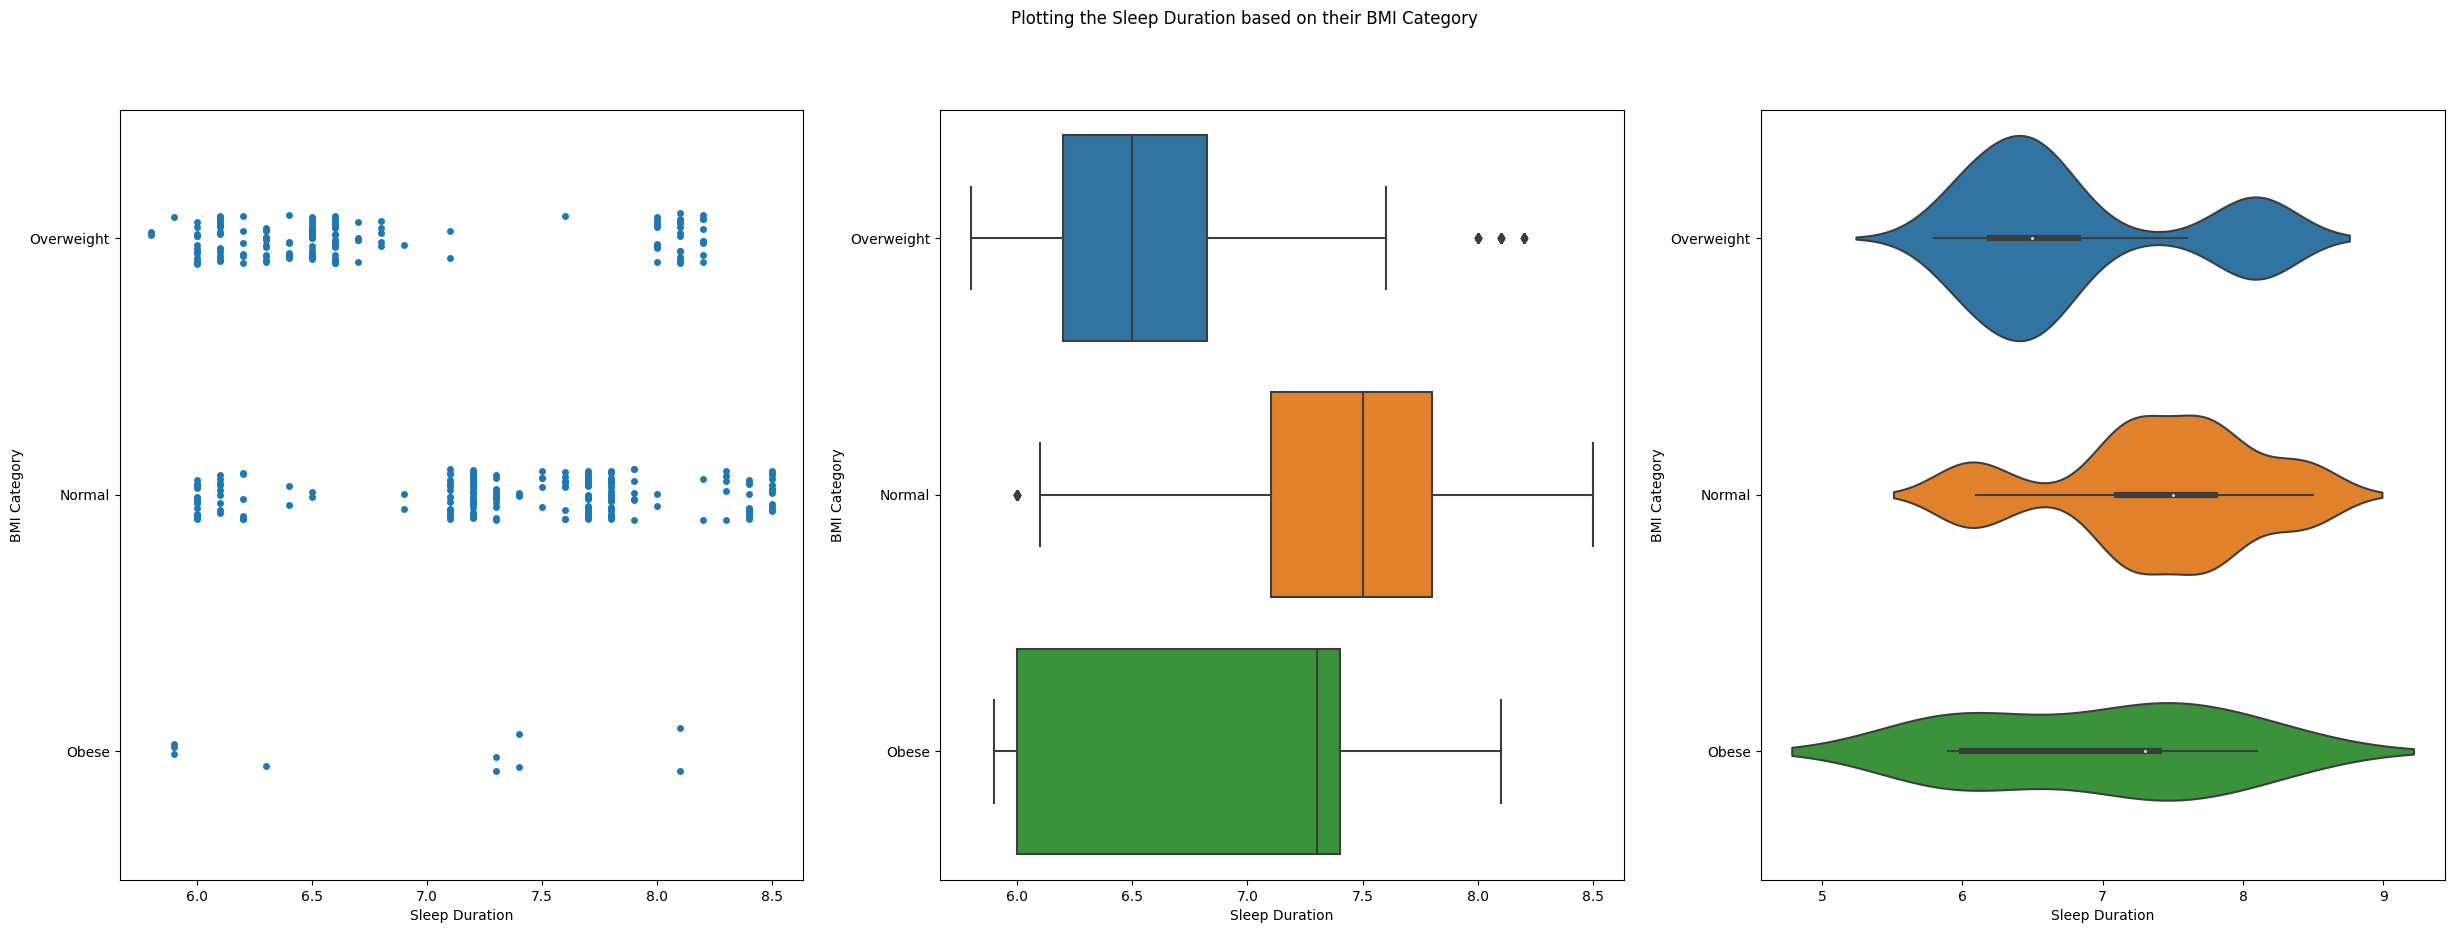

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[3]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[3], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[3], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[3], ax = axes[2])

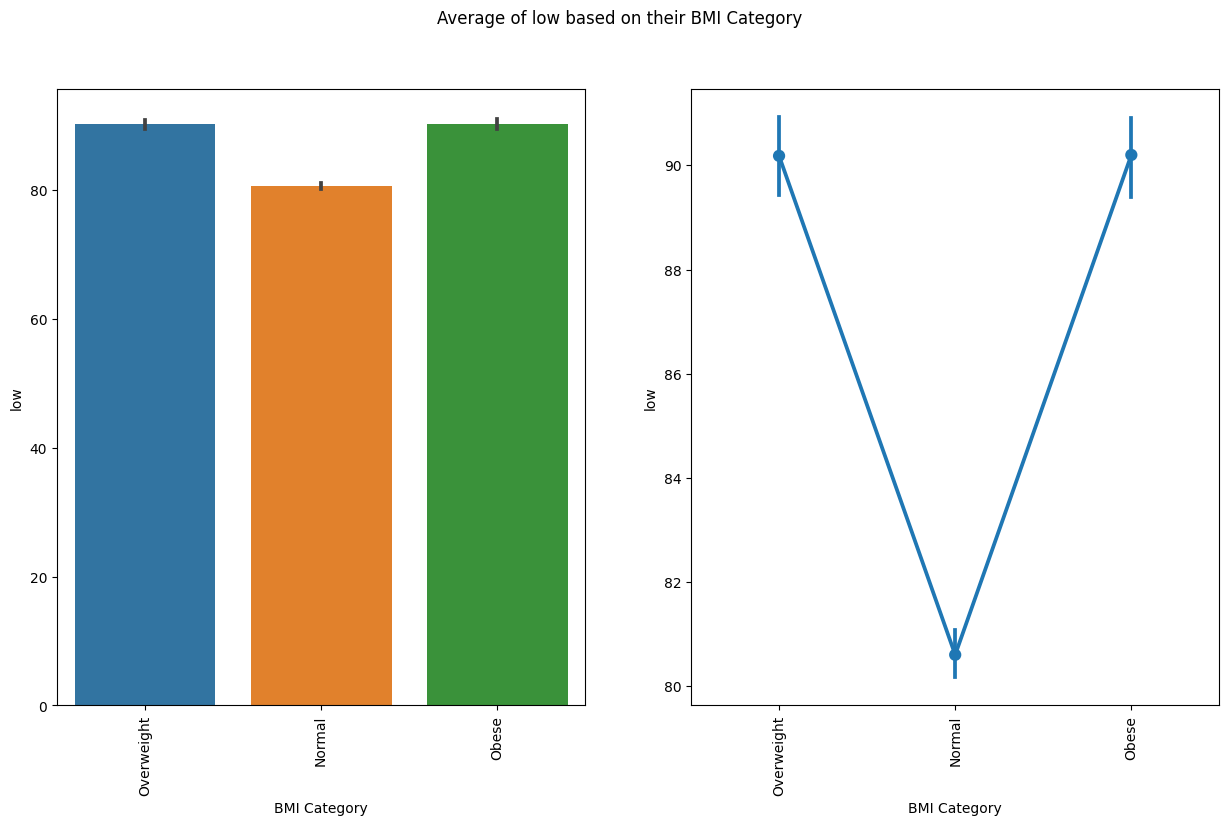

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[4]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[4], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[4], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='low', ylabel='BMI Category'>

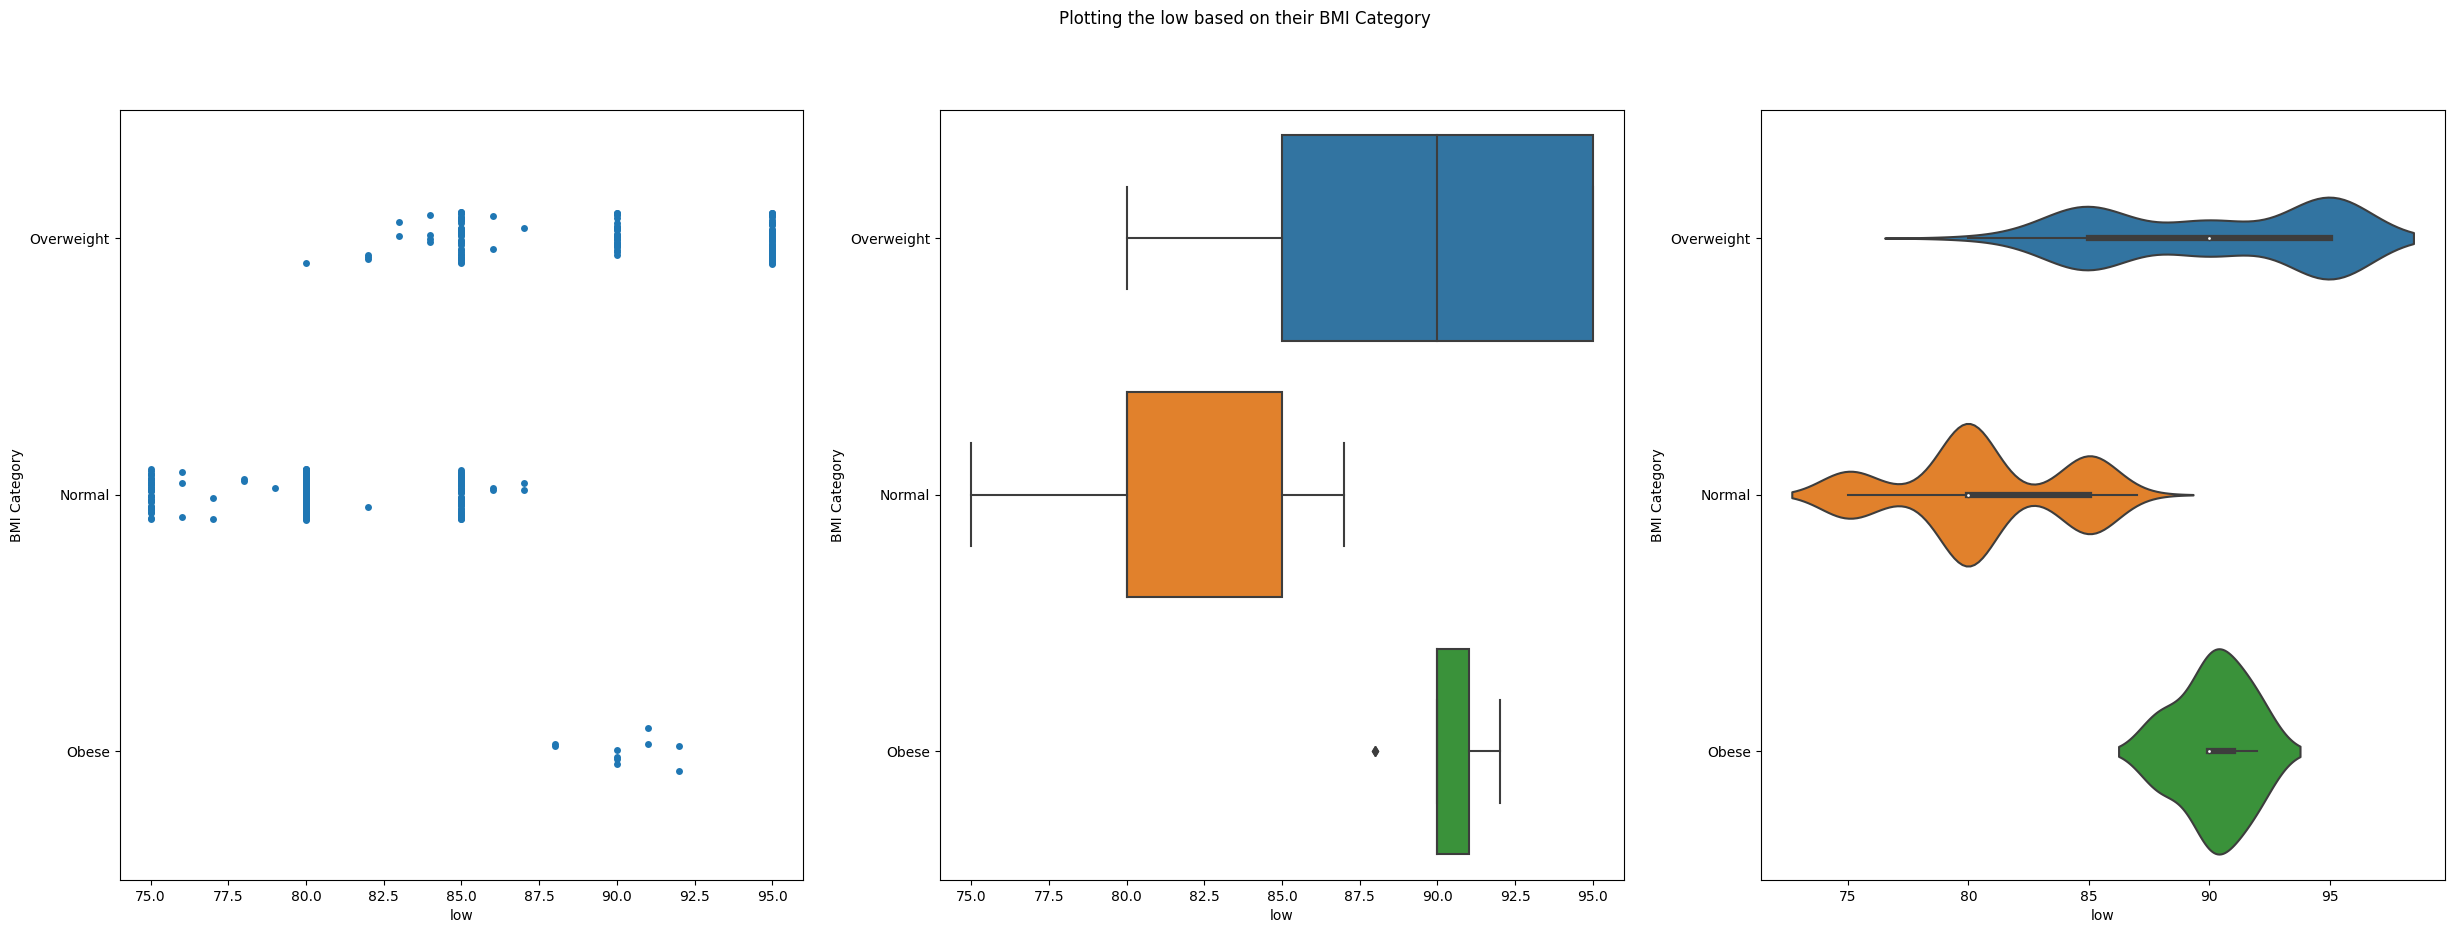

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[4]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[4], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[4], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[4], ax = axes[2])

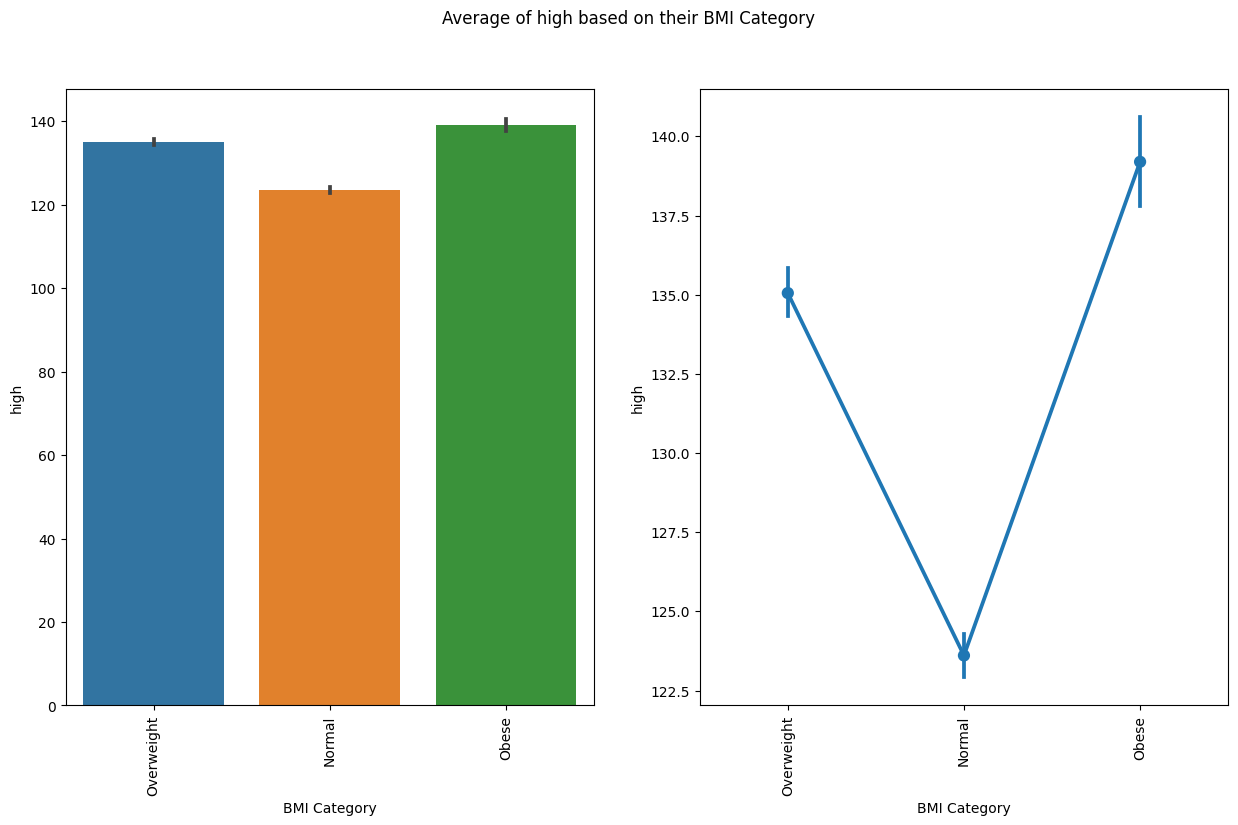

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[5]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[5], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[5], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='high', ylabel='BMI Category'>

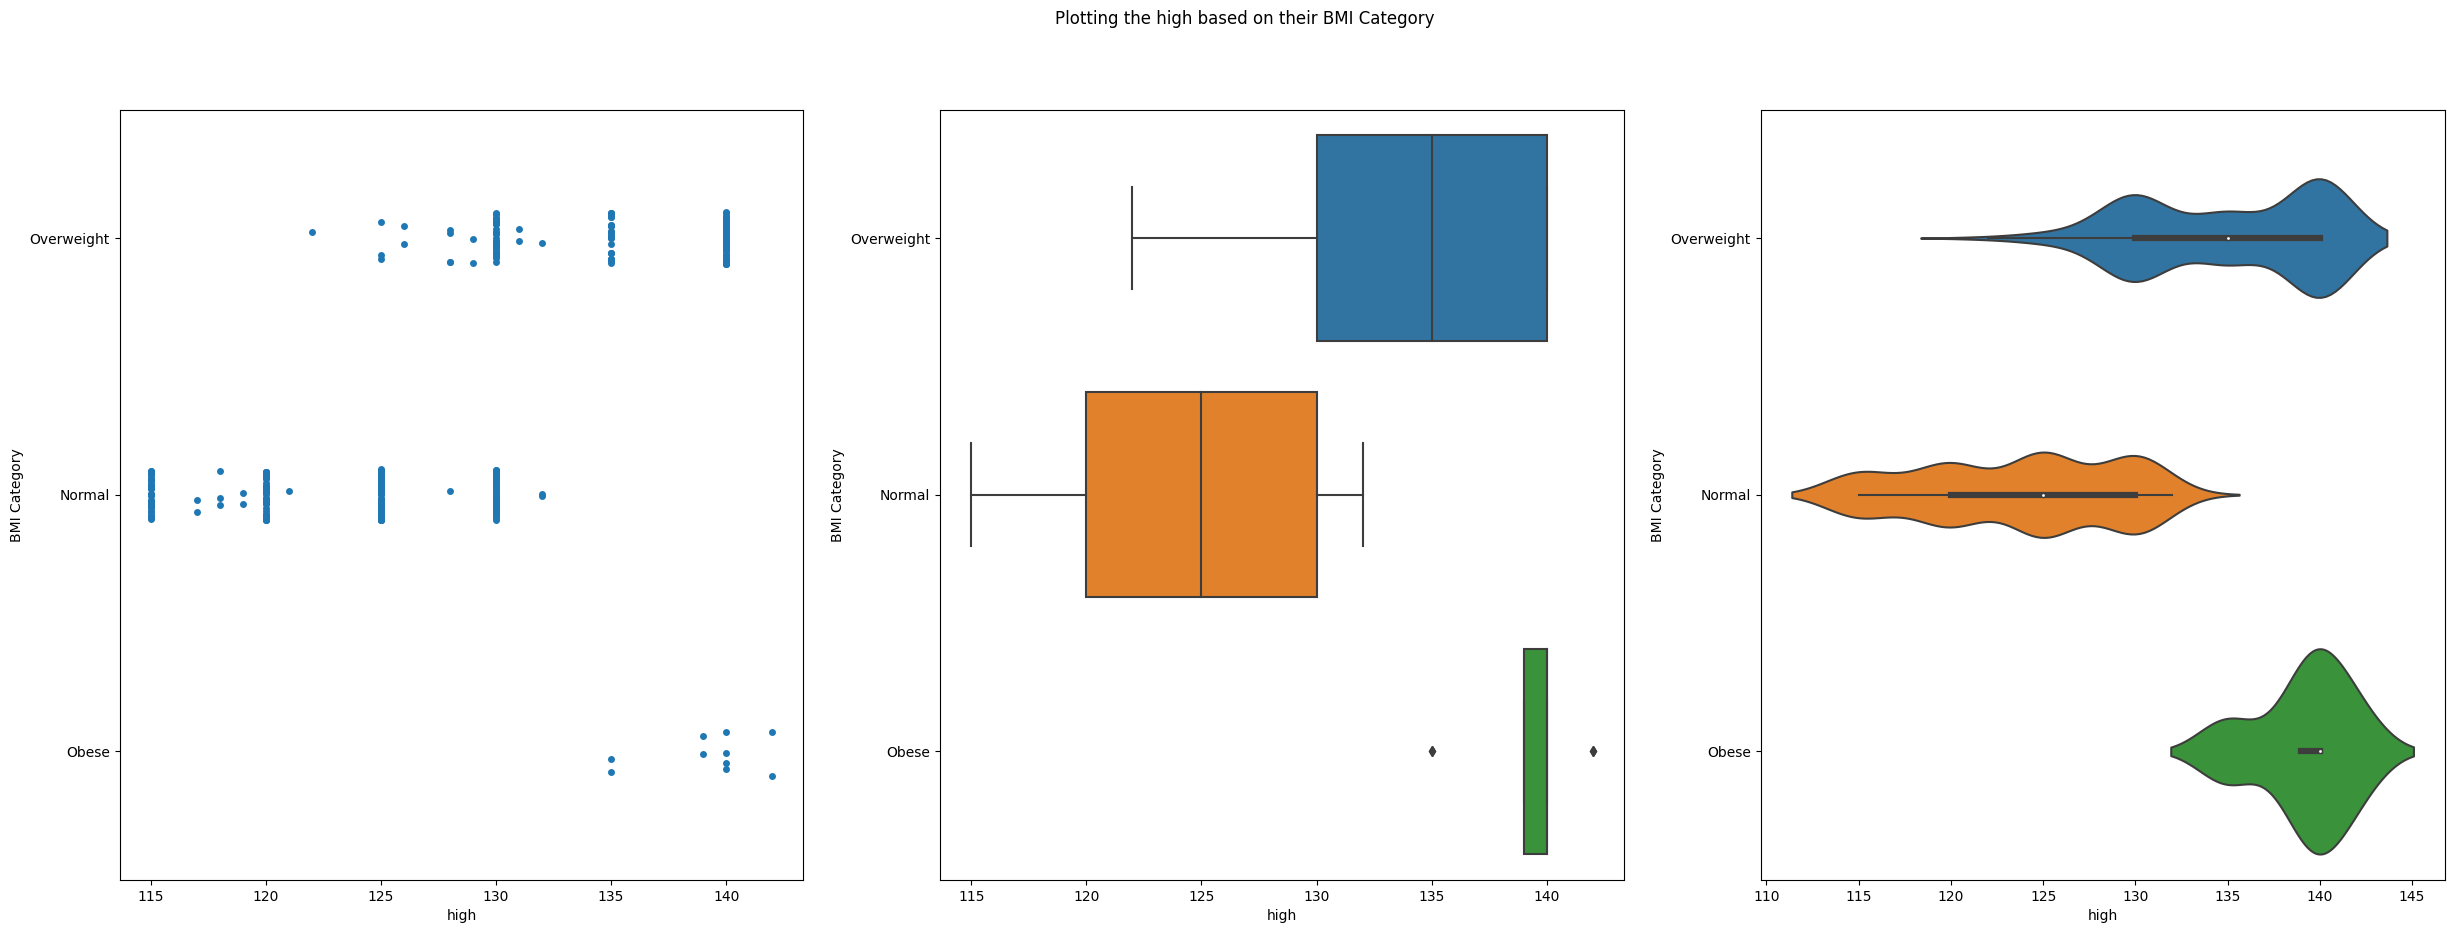

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[5]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[5], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[5], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[5], ax = axes[2])

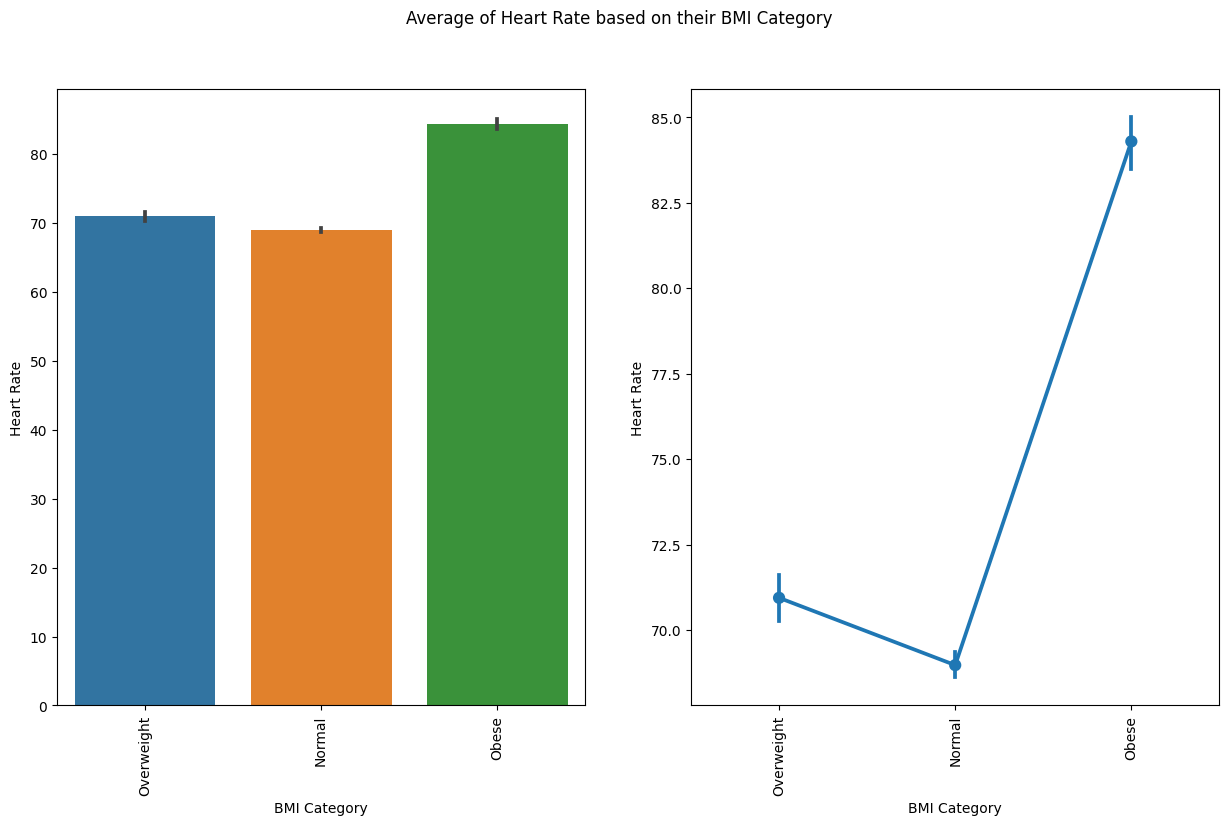

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[6]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[6], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[6], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Heart Rate', ylabel='BMI Category'>

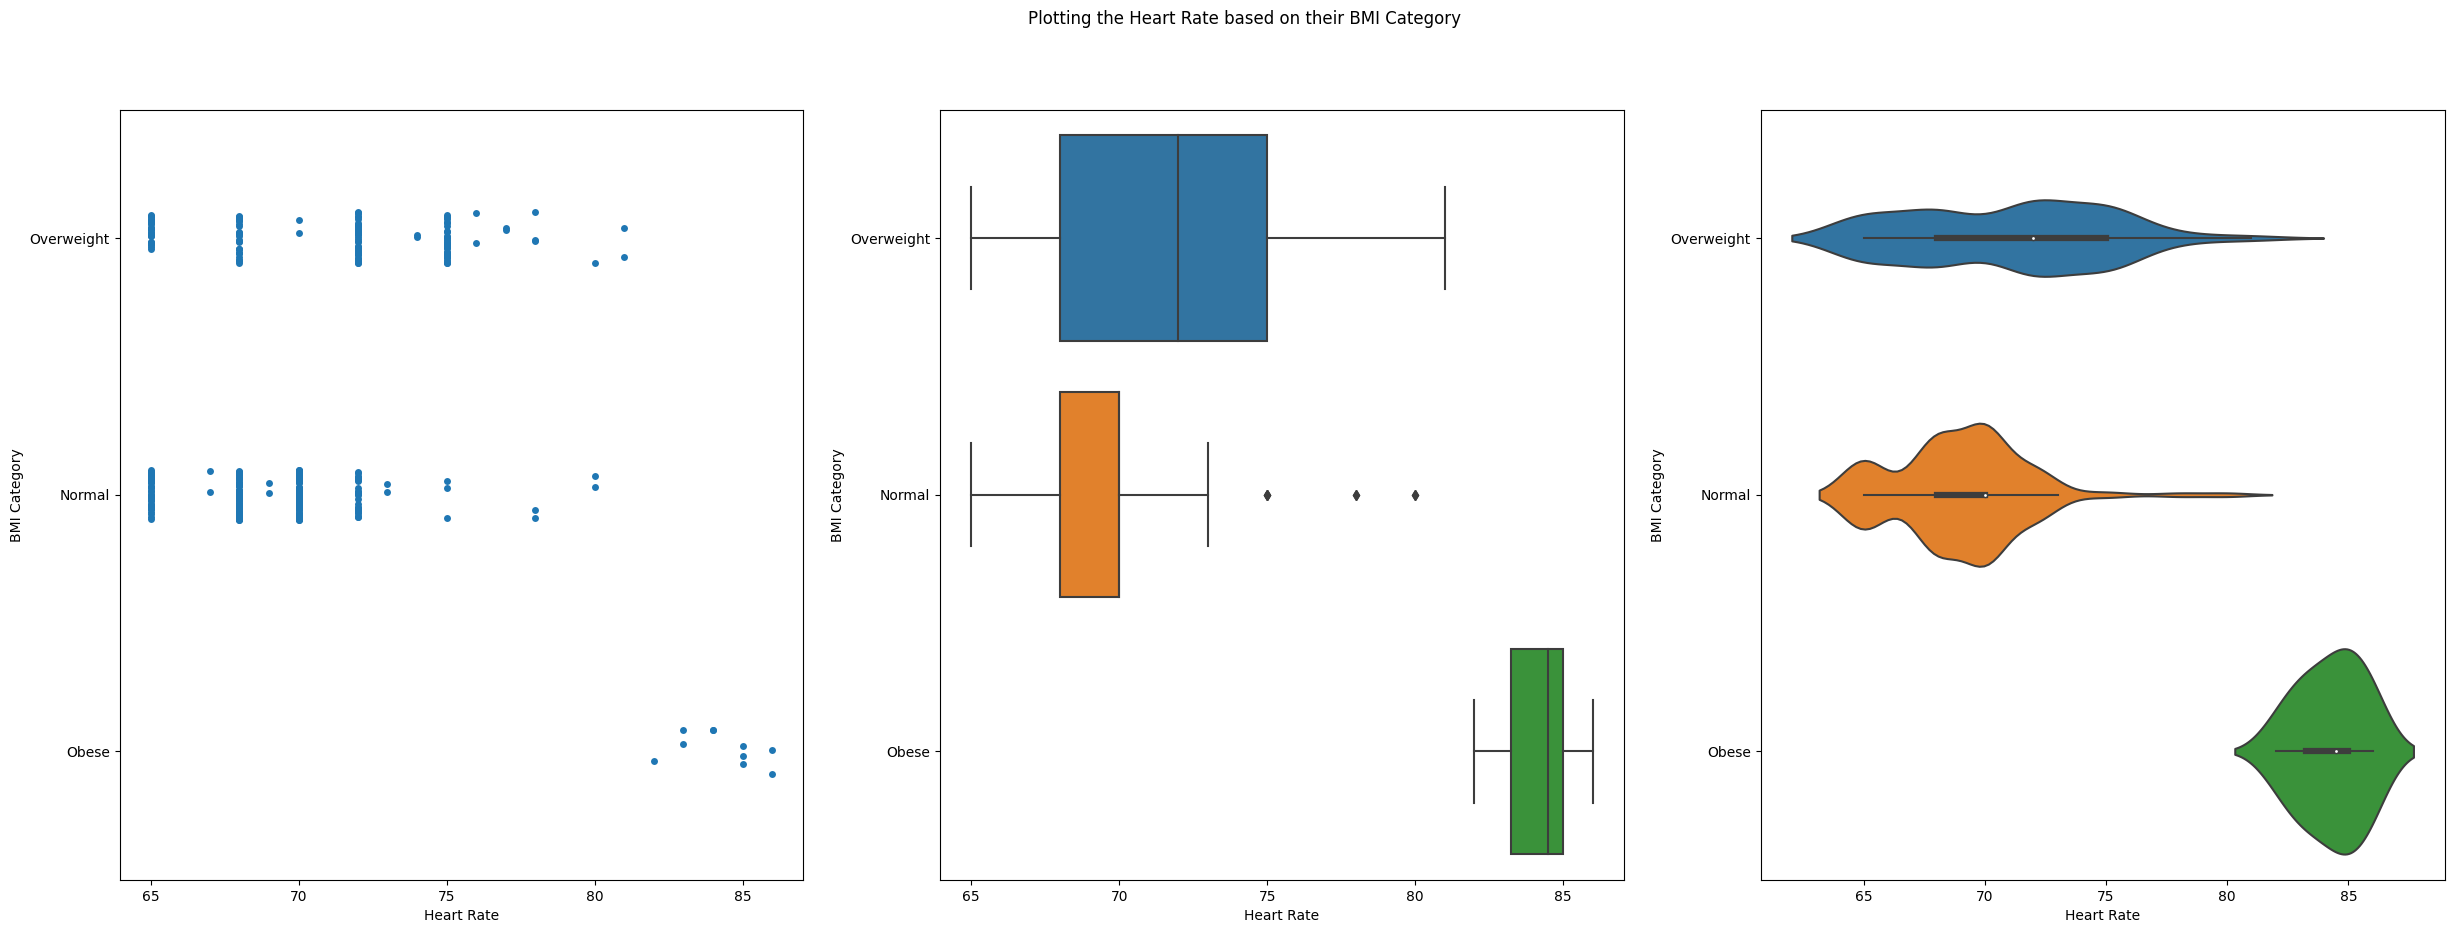

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[6]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[6], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[6], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[6], ax = axes[2])

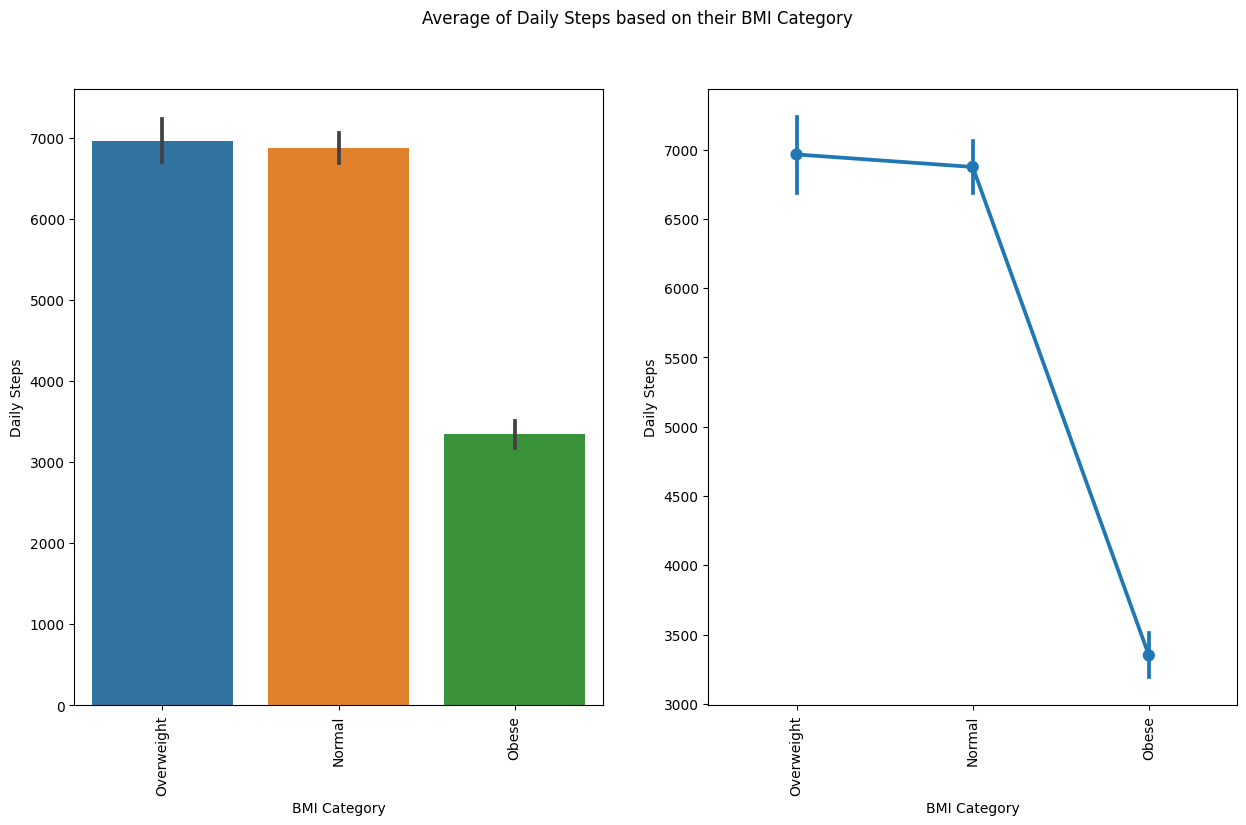

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[7]} based on their BMI Category")
sns.barplot(df, x = "BMI Category", y = continuous_var[7], ax = axes[0])
sns.pointplot(df, x = "BMI Category", y = continuous_var[7], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Daily Steps', ylabel='BMI Category'>

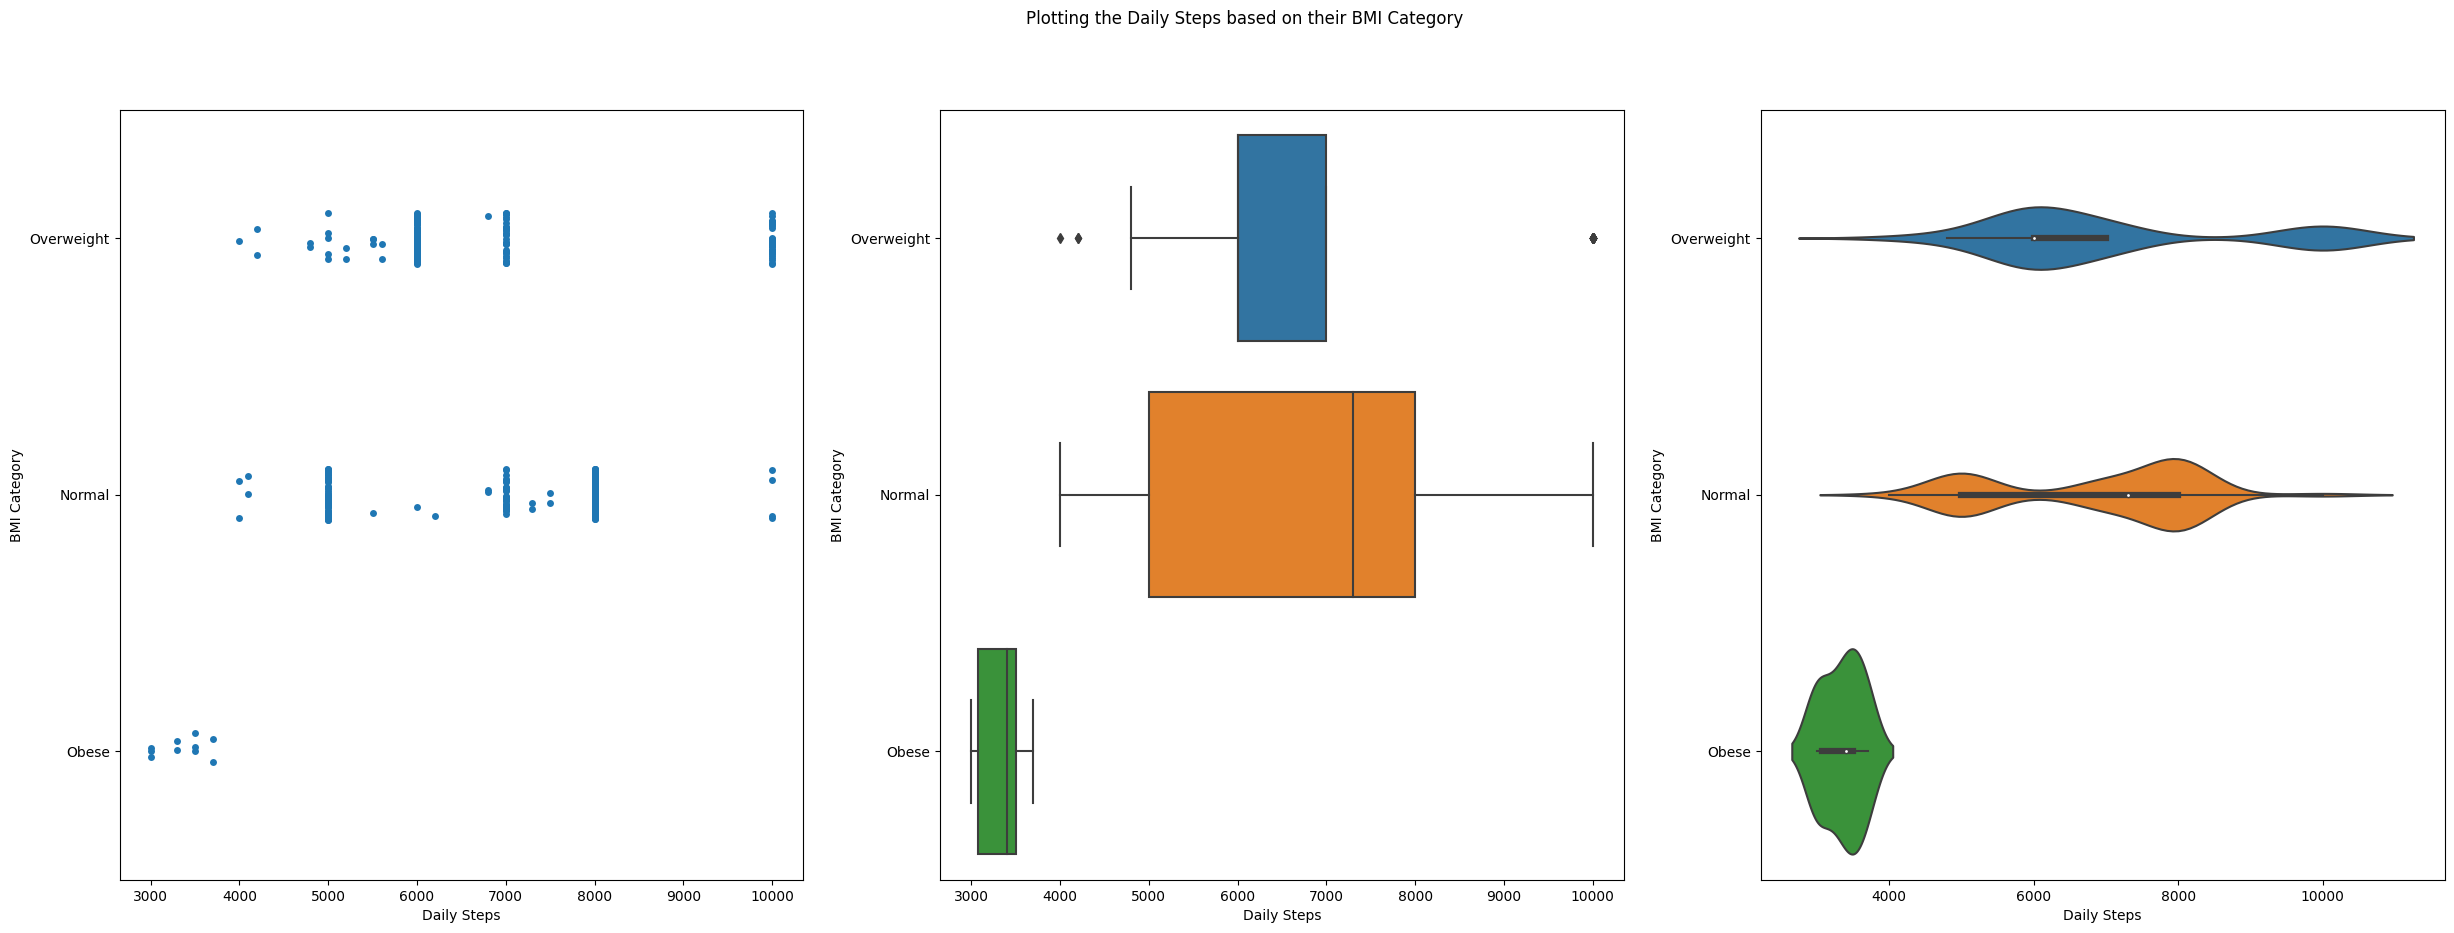

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[7]} based on their BMI Category")
sns.stripplot(df, y = "BMI Category", x = continuous_var[7], ax = axes[0])
sns.boxplot(df, y = "BMI Category", x = continuous_var[7], ax = axes[1])
sns.violinplot(df, y = "BMI Category", x = continuous_var[7], ax = axes[2])

# Analyzing the Sleep Disorder Category

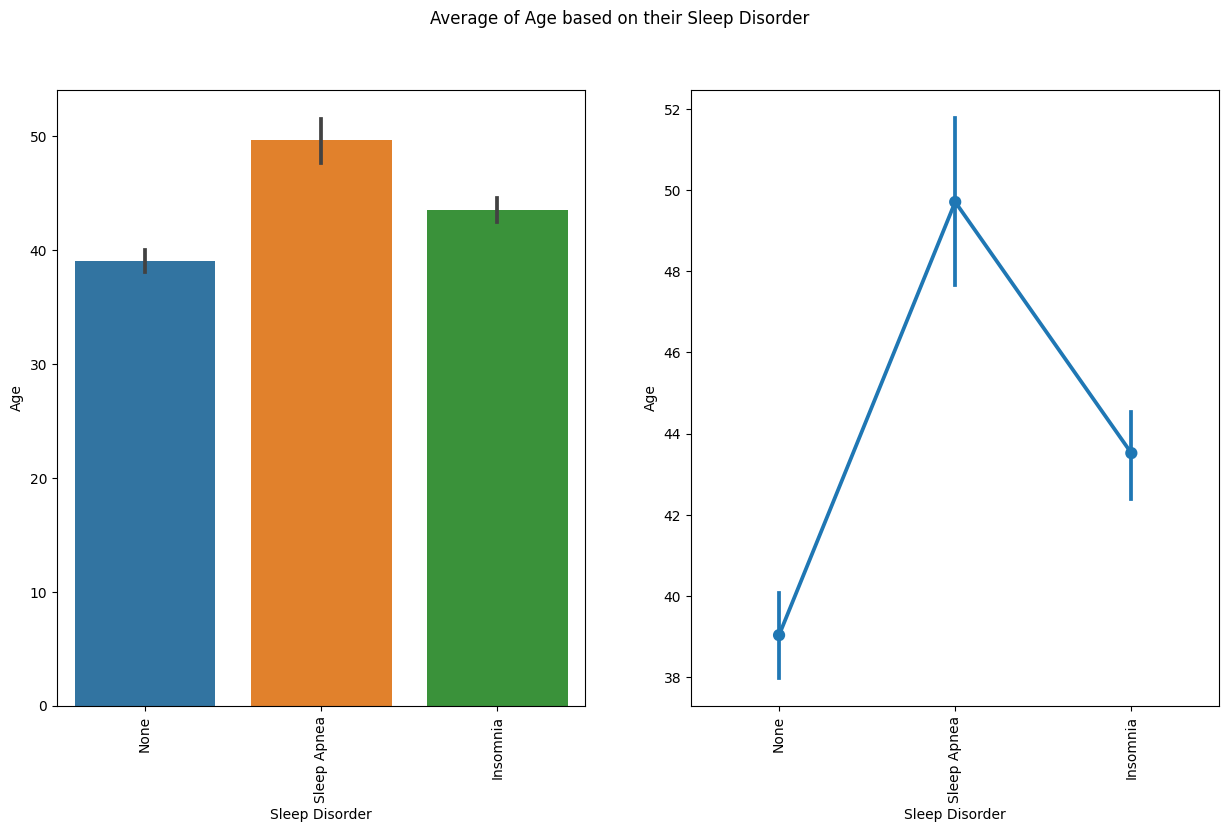

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[0]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[0], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[0], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

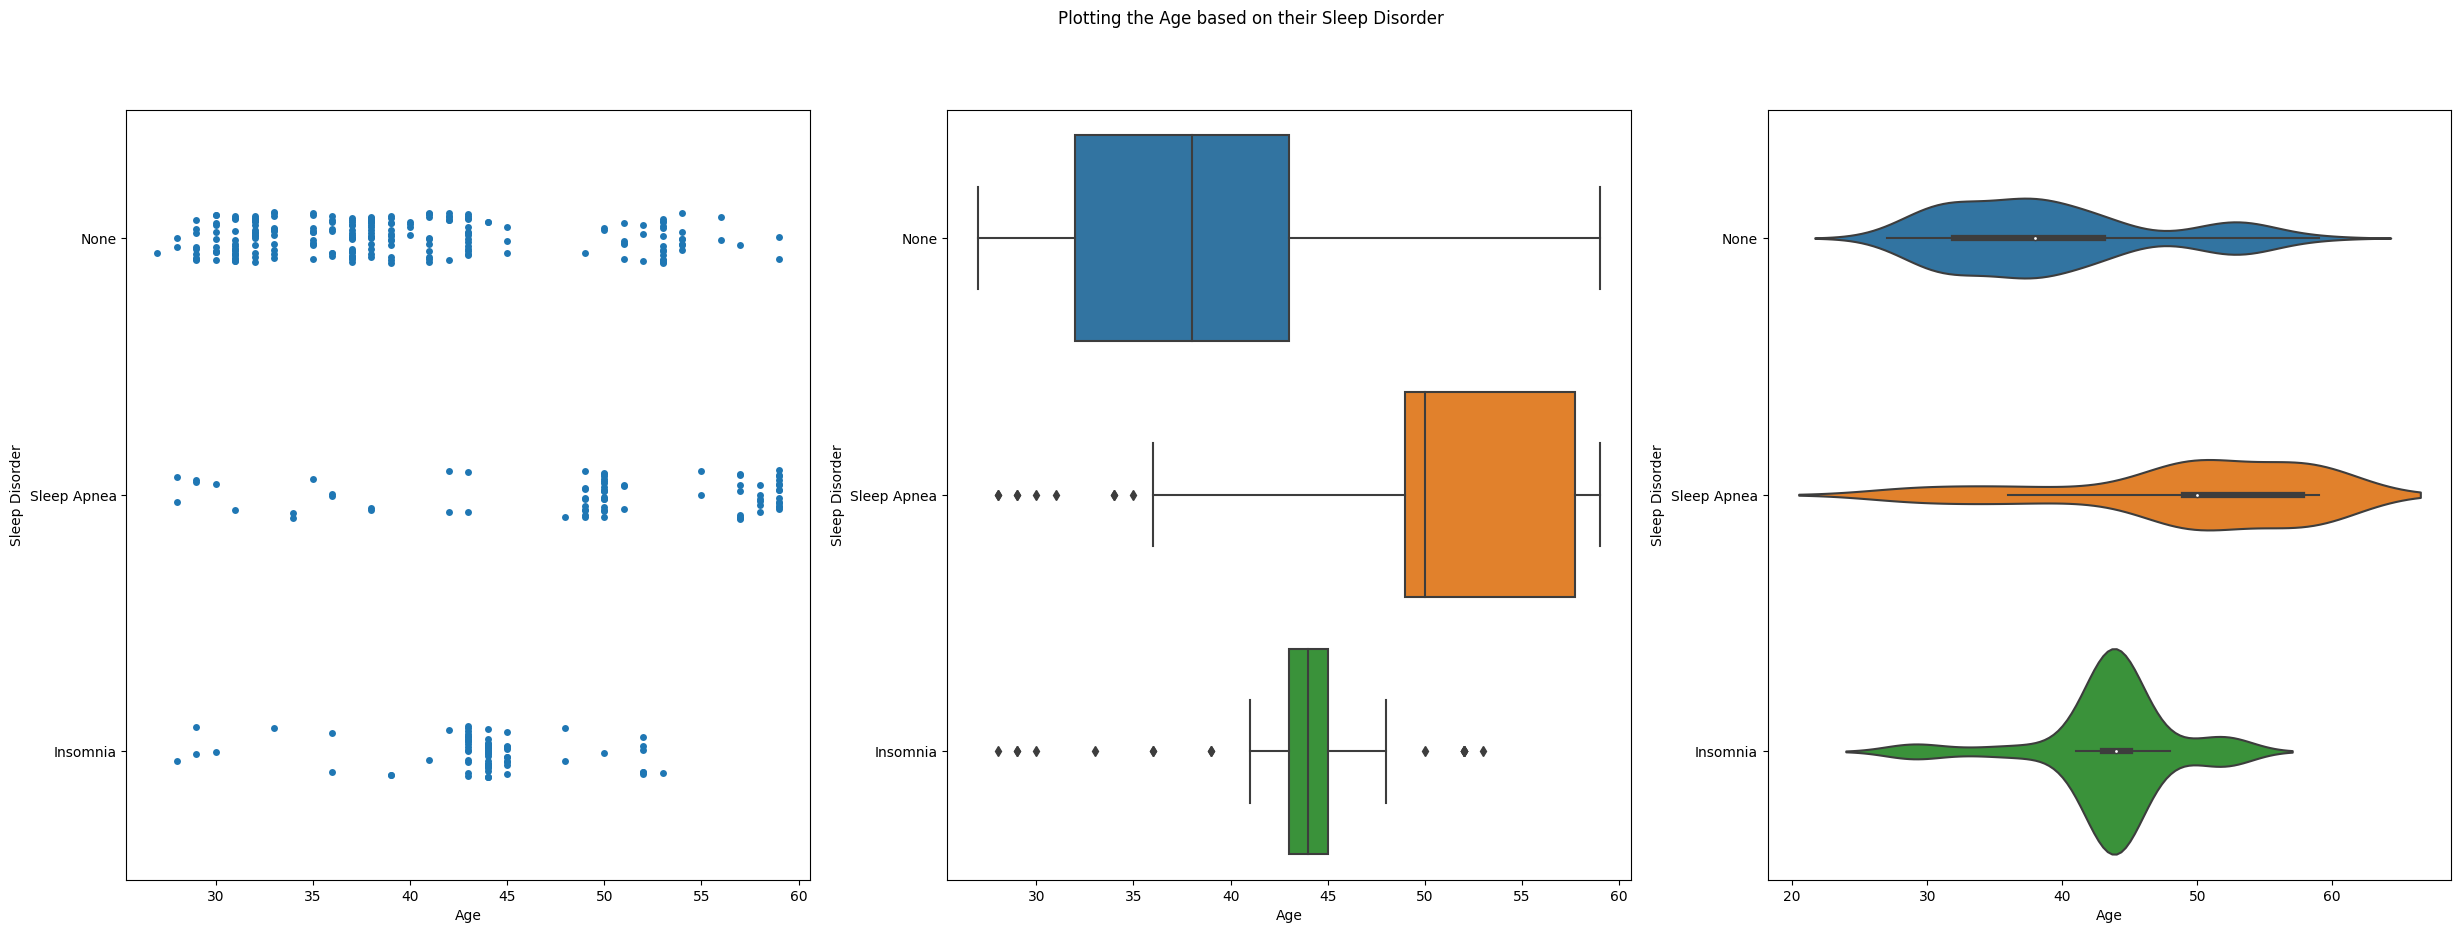

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[0]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[0], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[0], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[0], ax = axes[2])

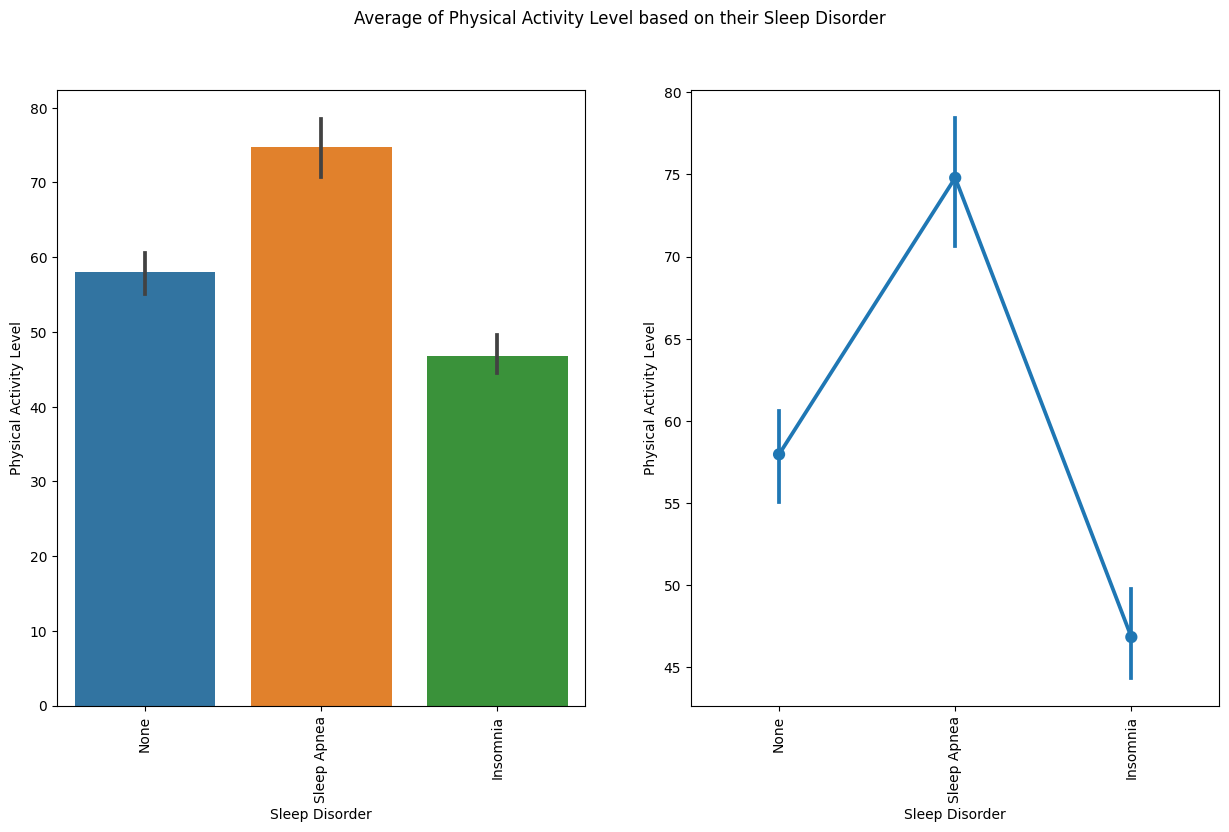

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[1]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[1], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[1], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Disorder'>

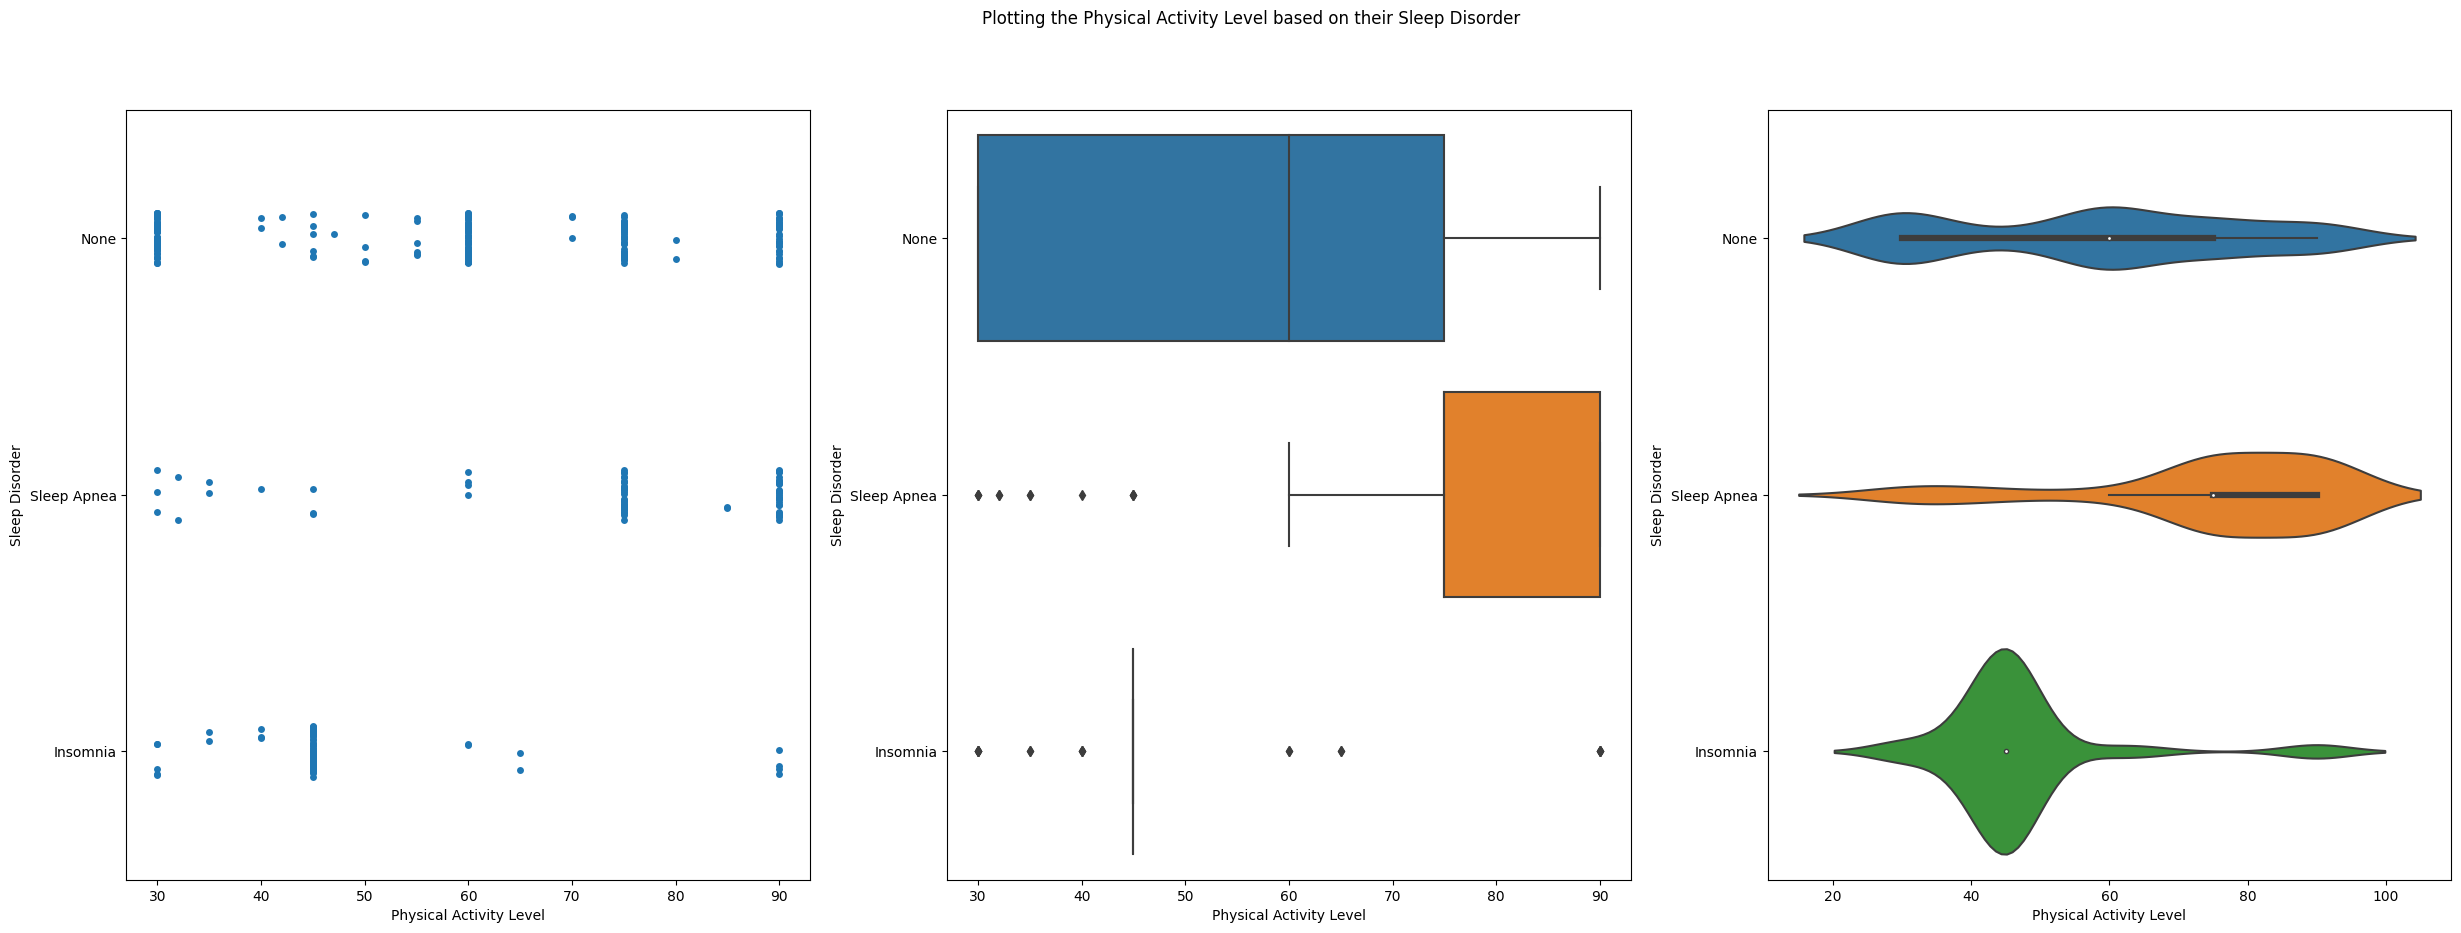

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[1]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[1], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[1], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[1], ax = axes[2])

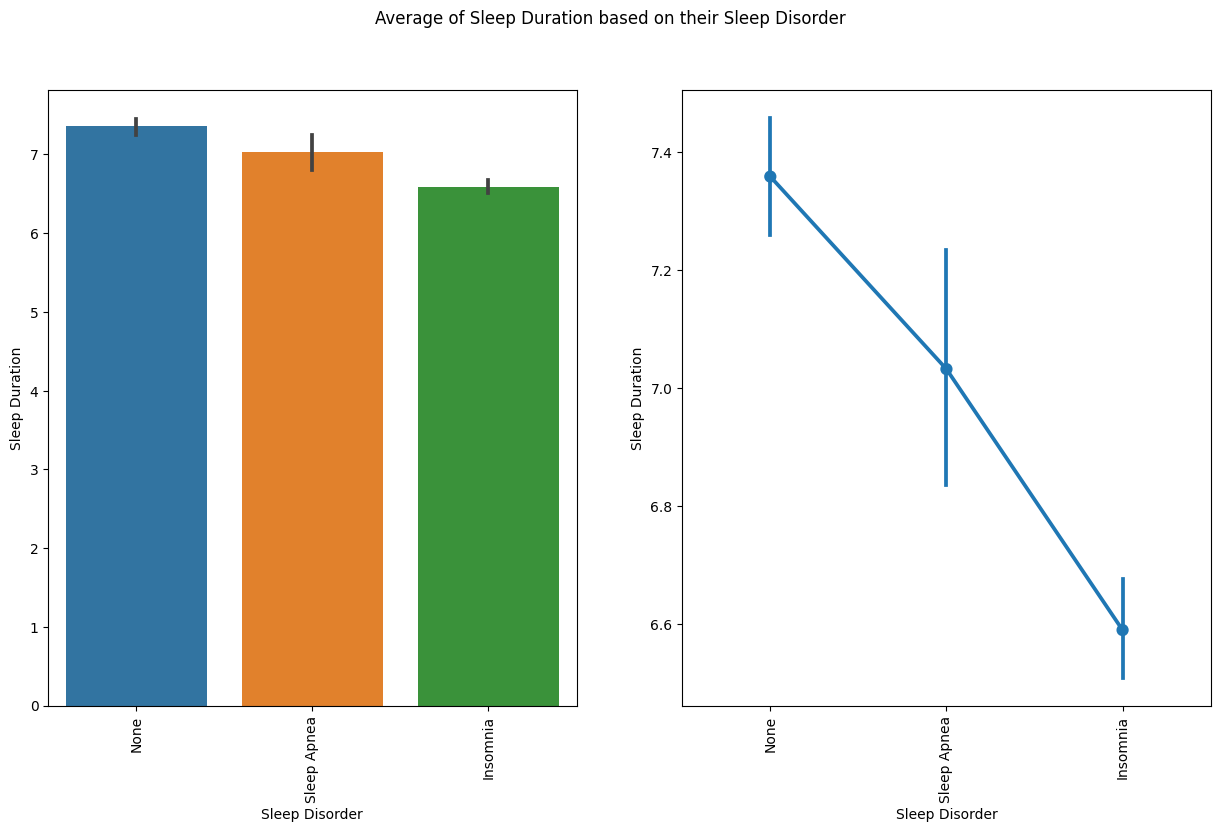

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[3]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[3], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[3], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Sleep Duration', ylabel='Sleep Disorder'>

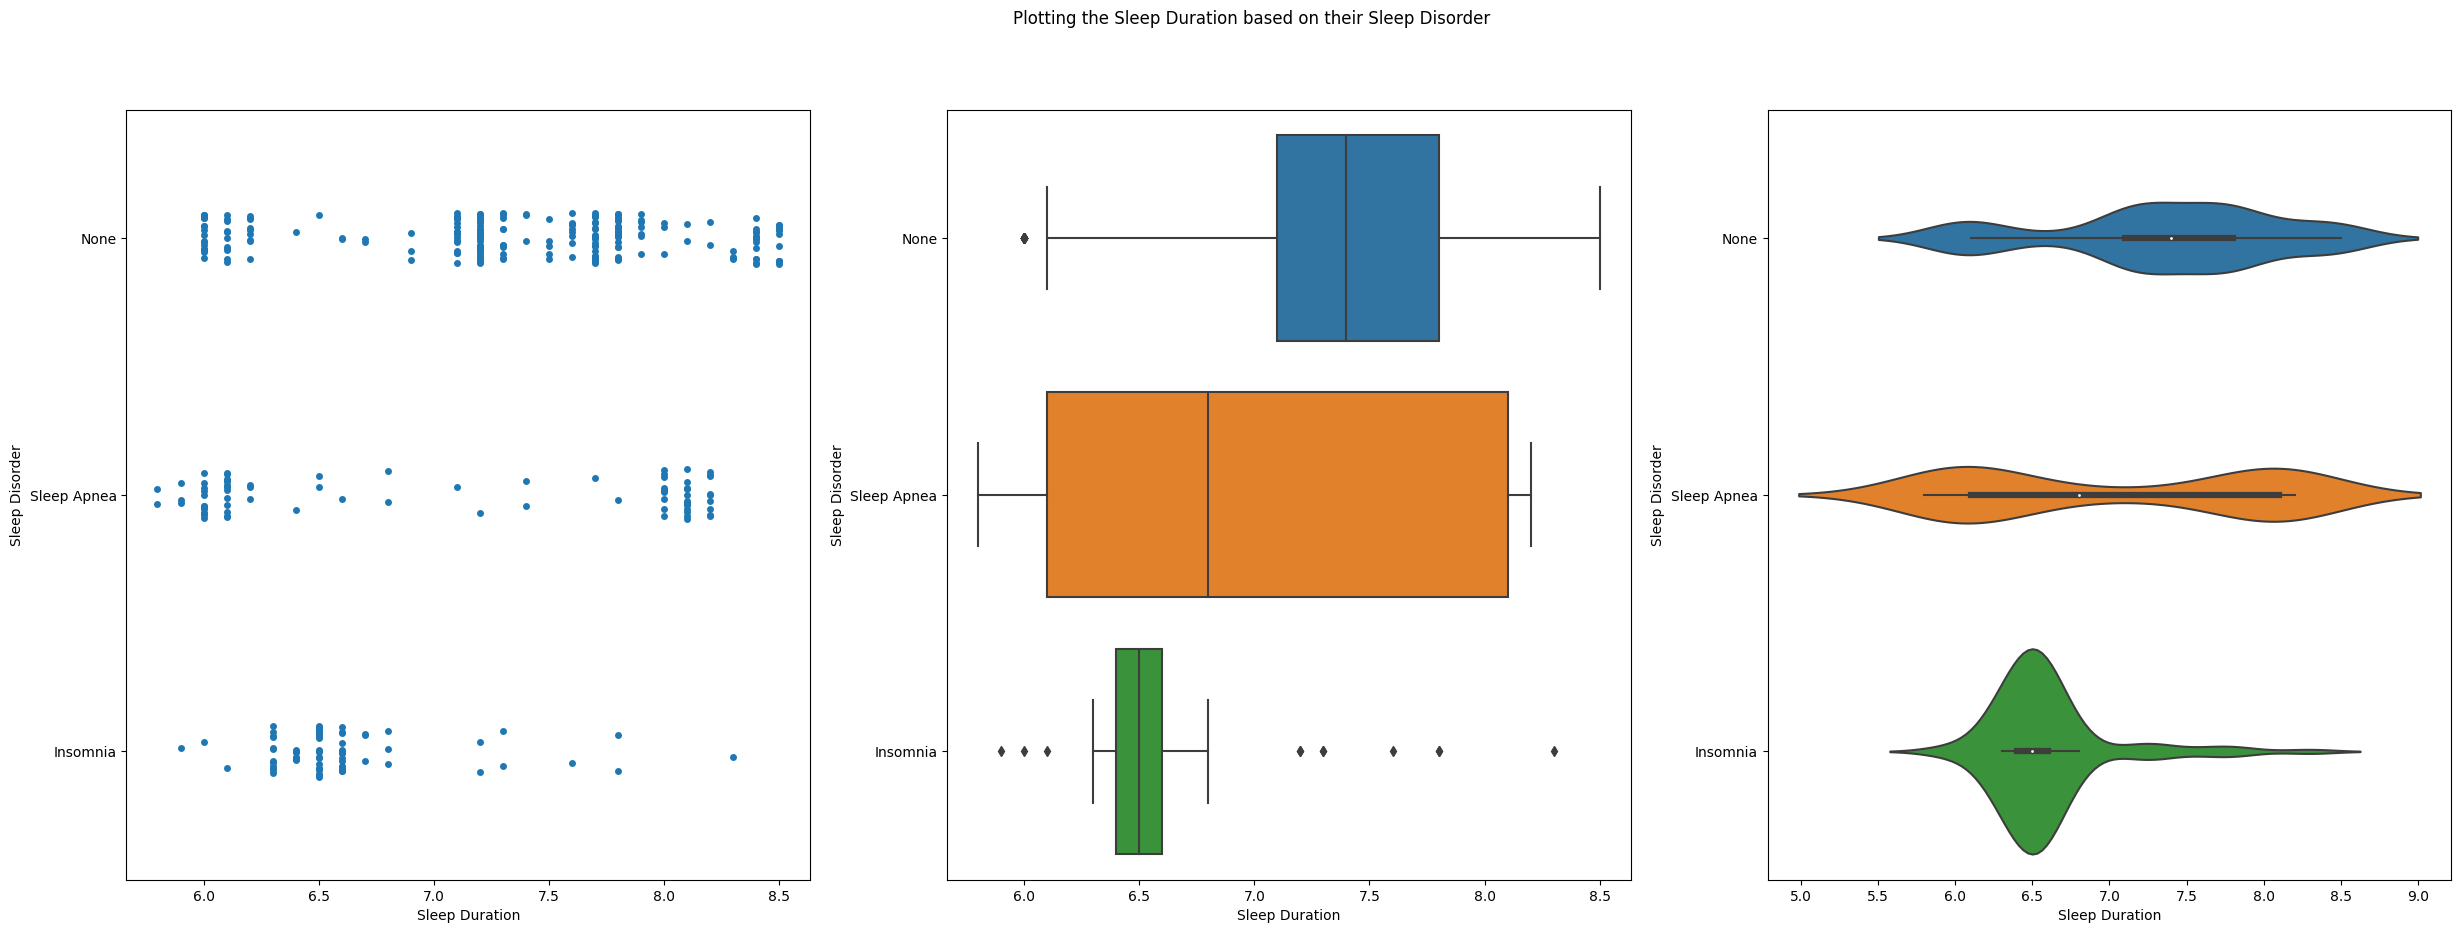

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[3]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[3], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[3], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[3], ax = axes[2])

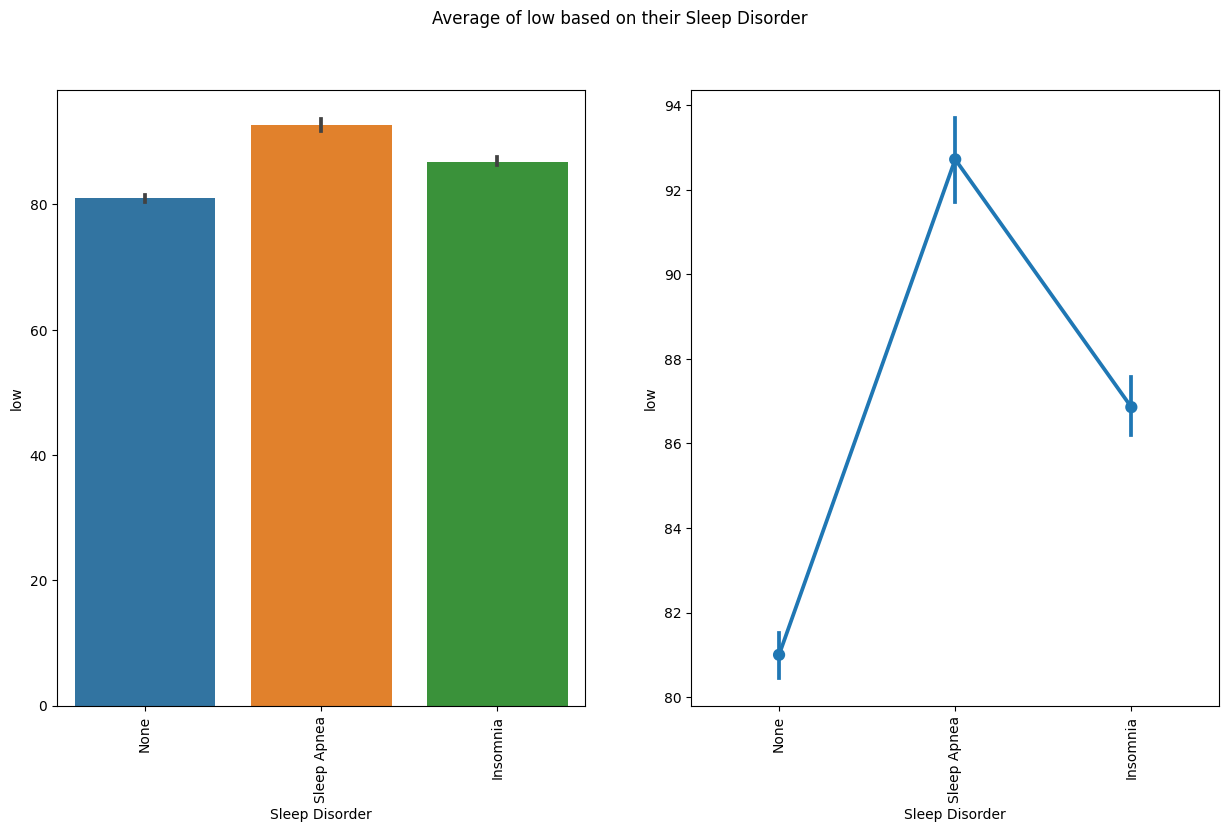

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[4]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[4], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[4], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='low', ylabel='Sleep Disorder'>

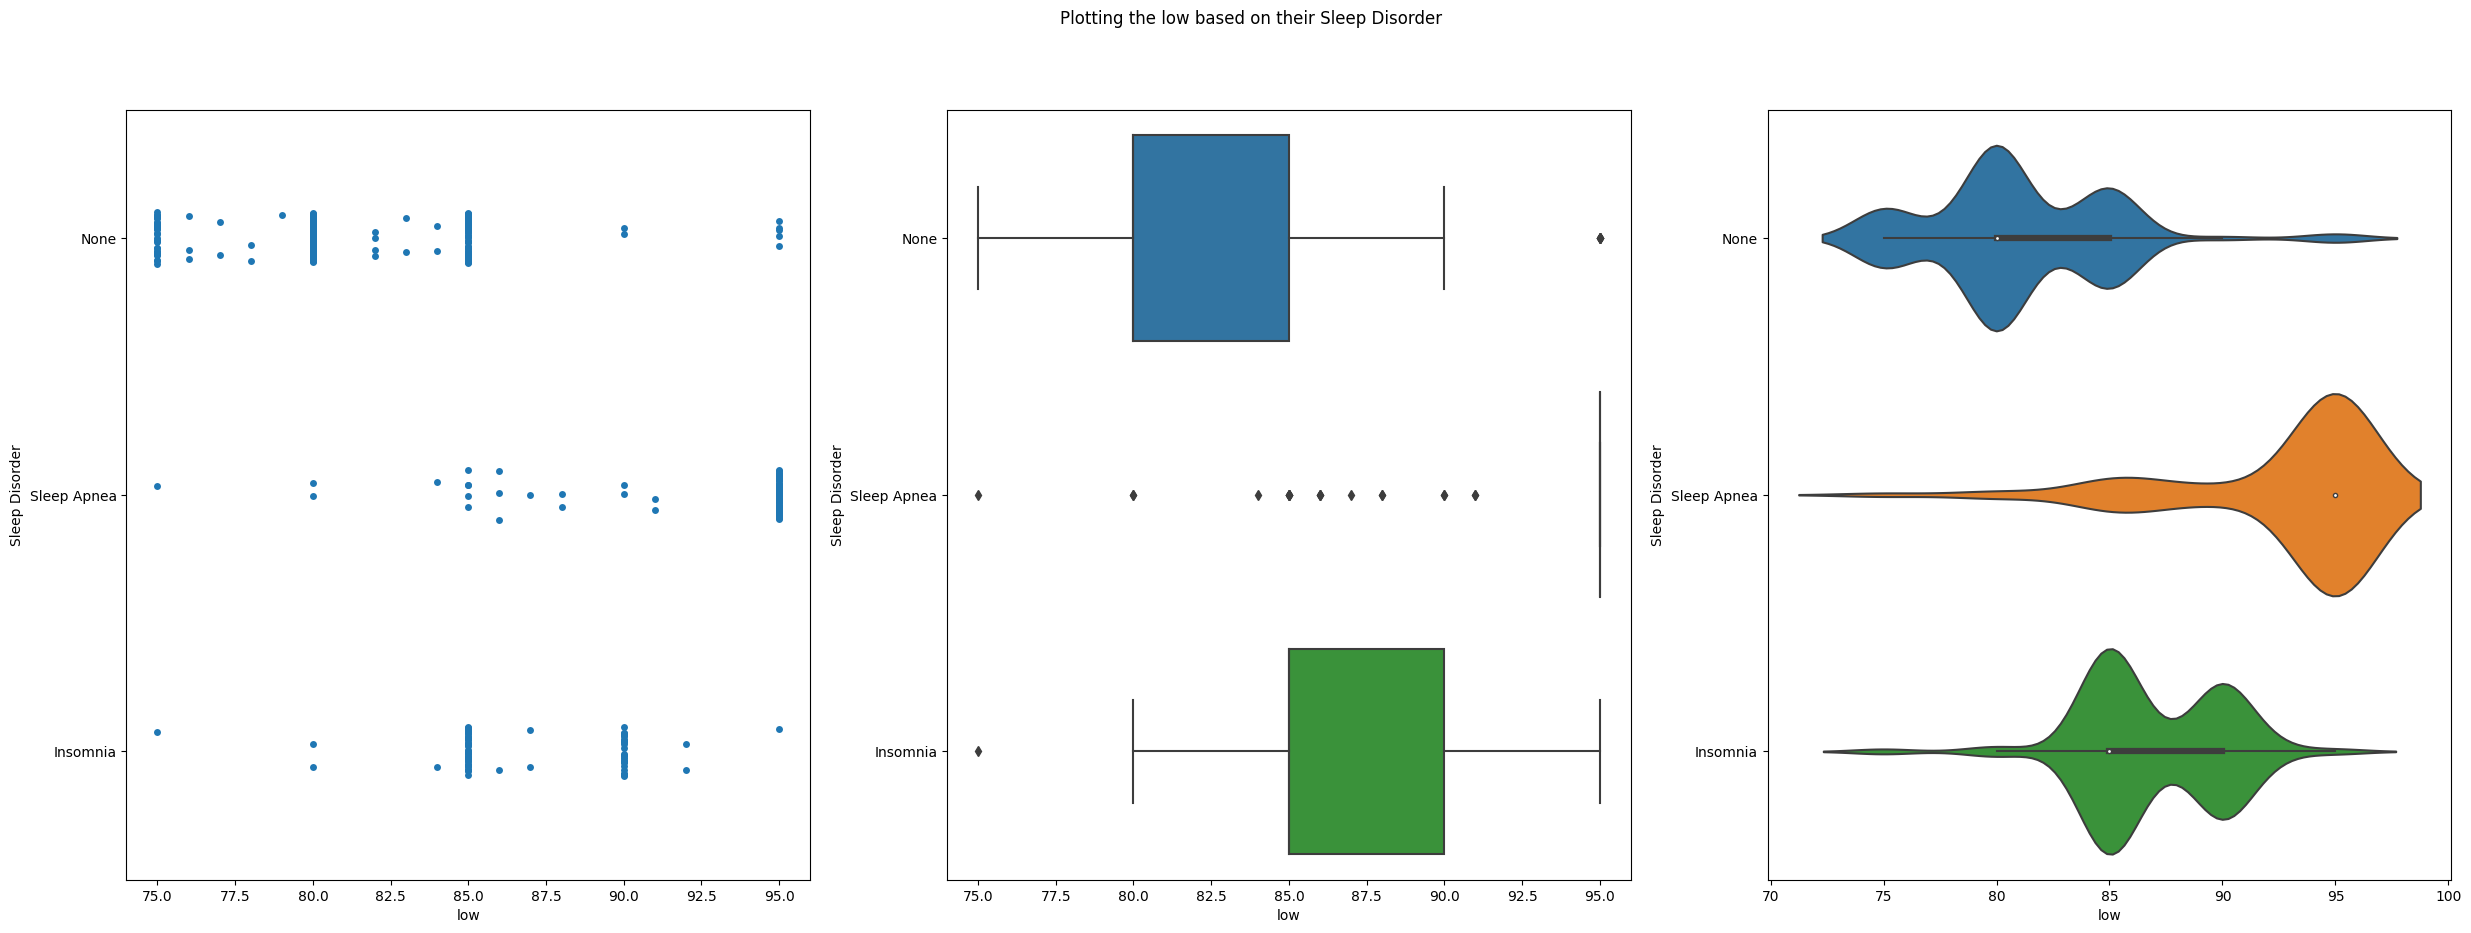

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[4]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[4], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[4], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[4], ax = axes[2])

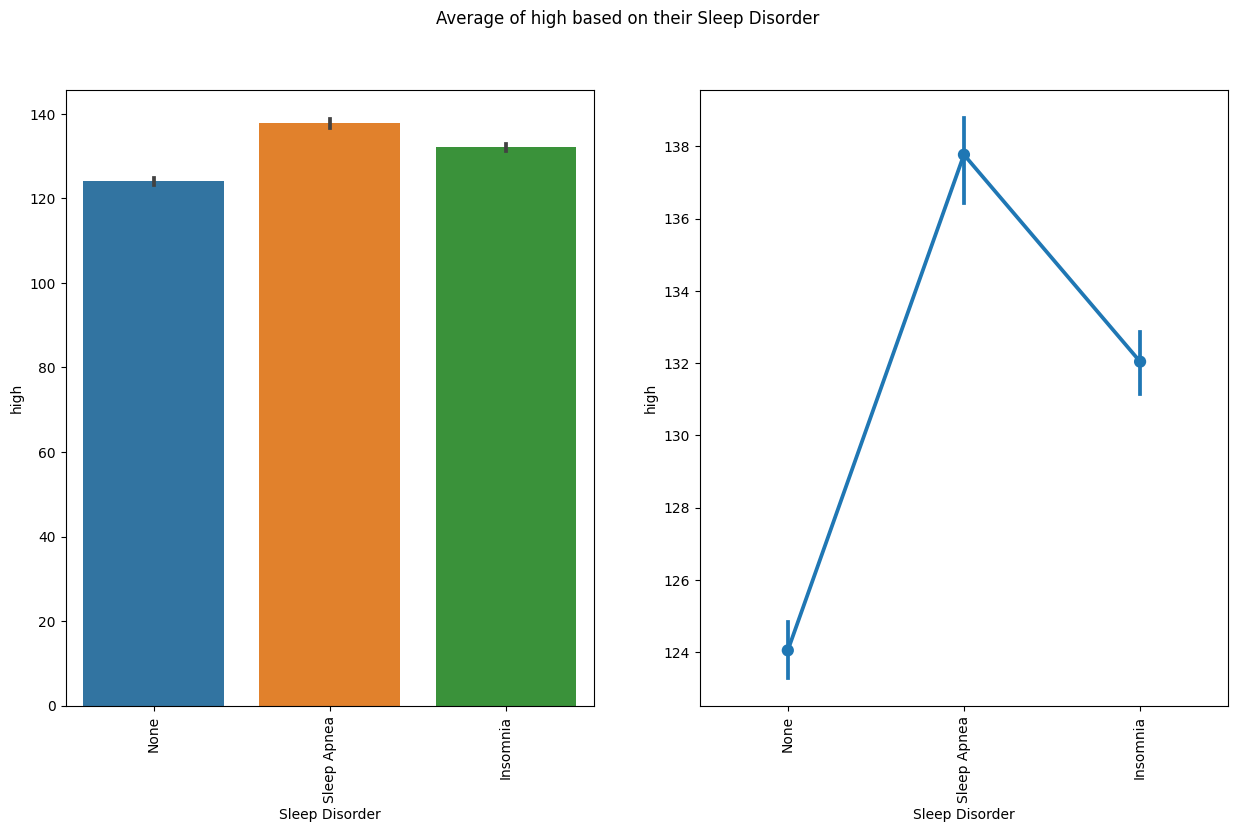

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[5]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[5], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[5], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='high', ylabel='Sleep Disorder'>

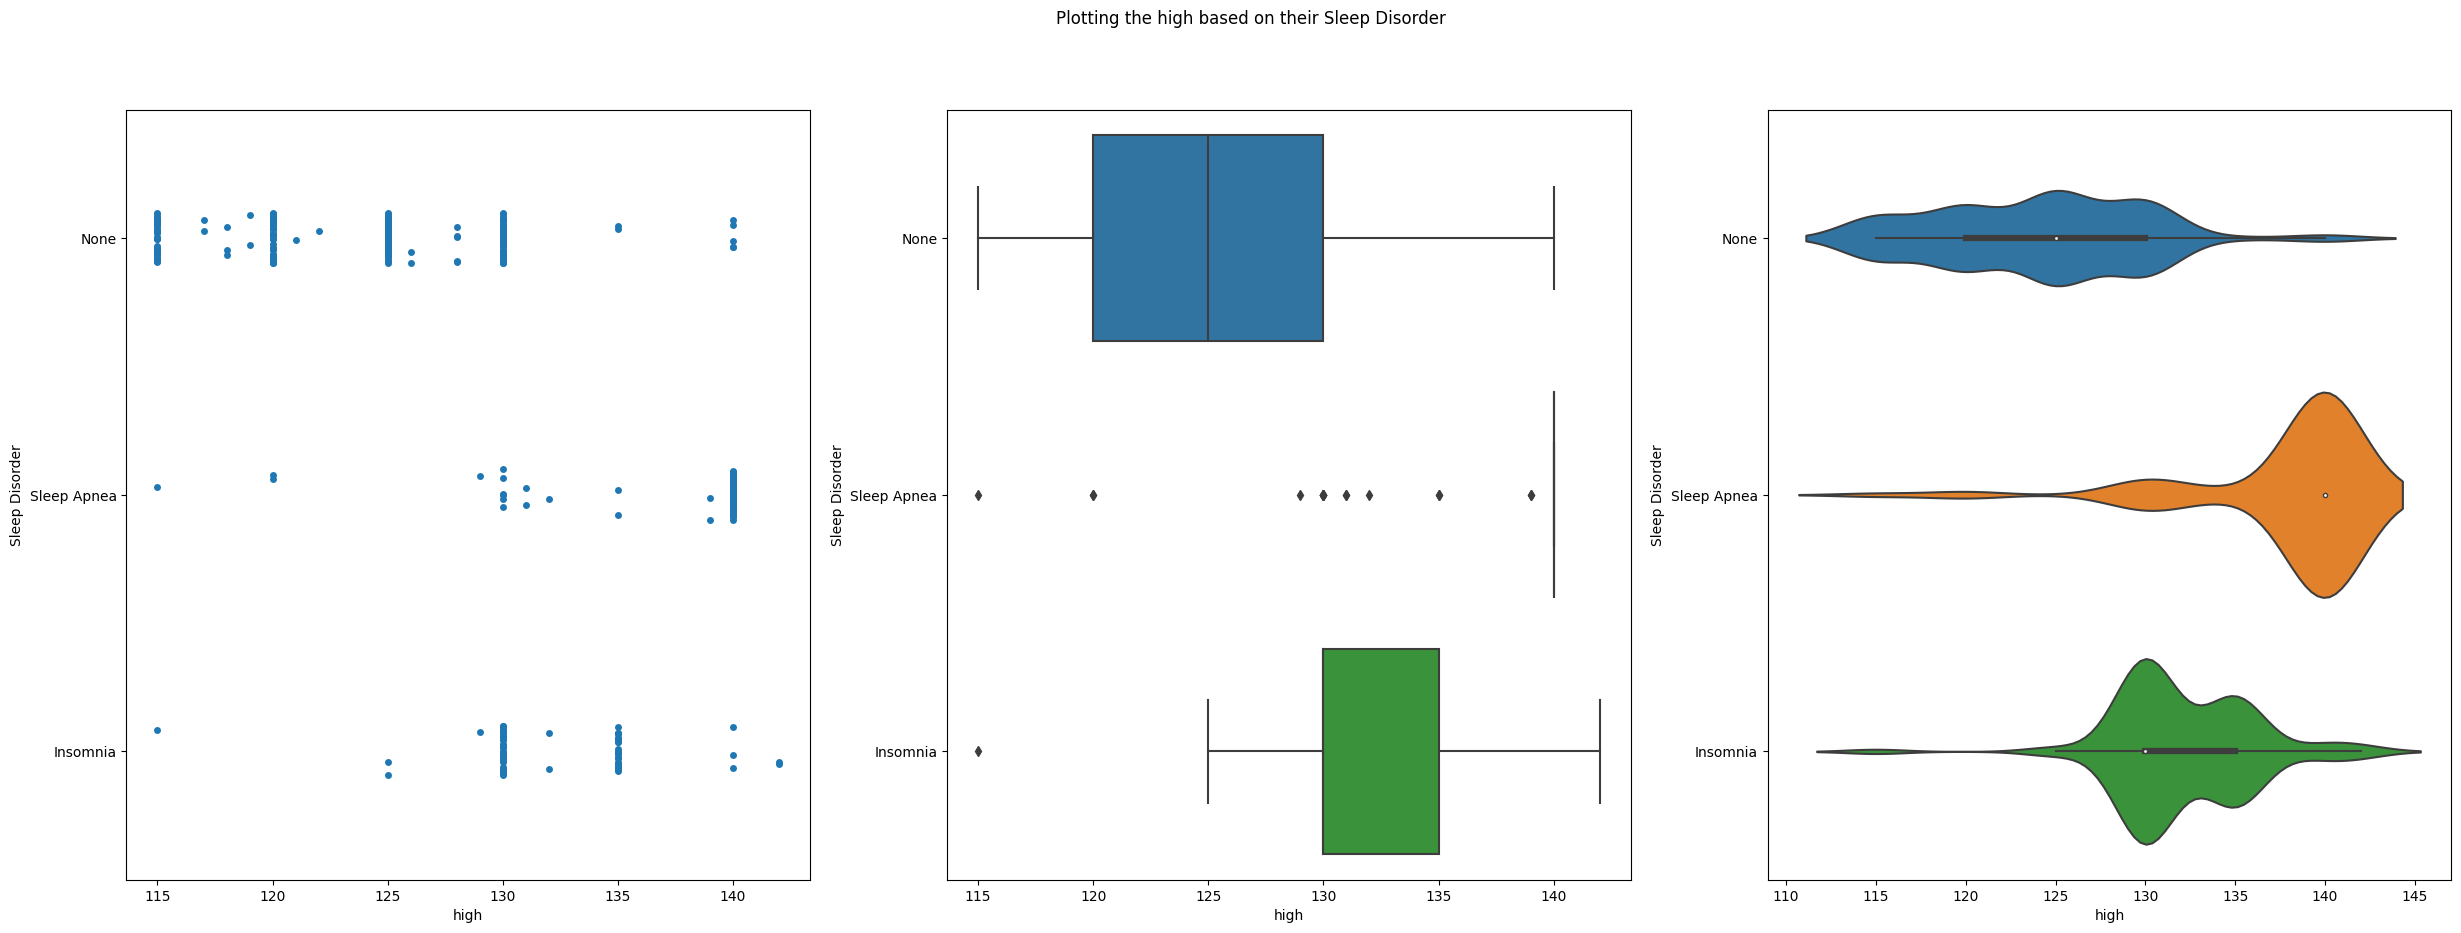

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[5]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[5], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[5], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[5], ax = axes[2])

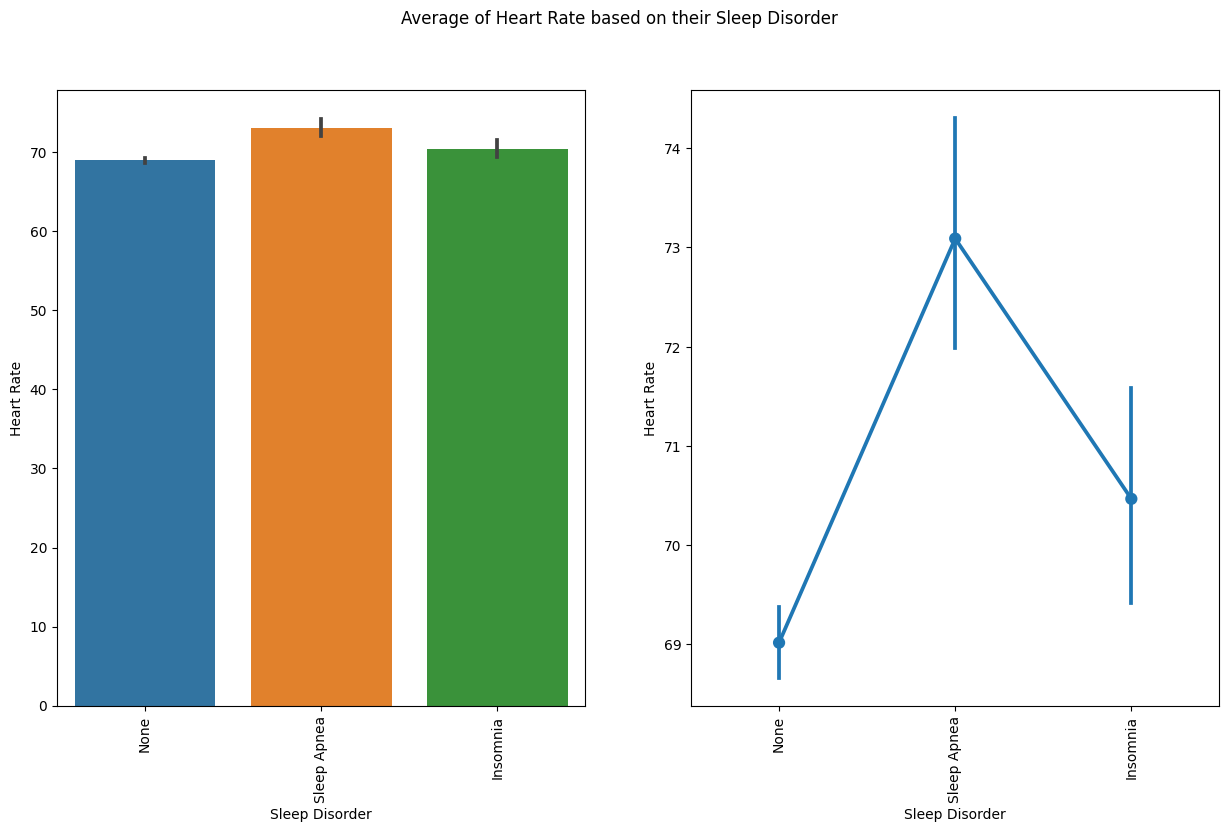

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[6]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[6], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[6], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Heart Rate', ylabel='Sleep Disorder'>

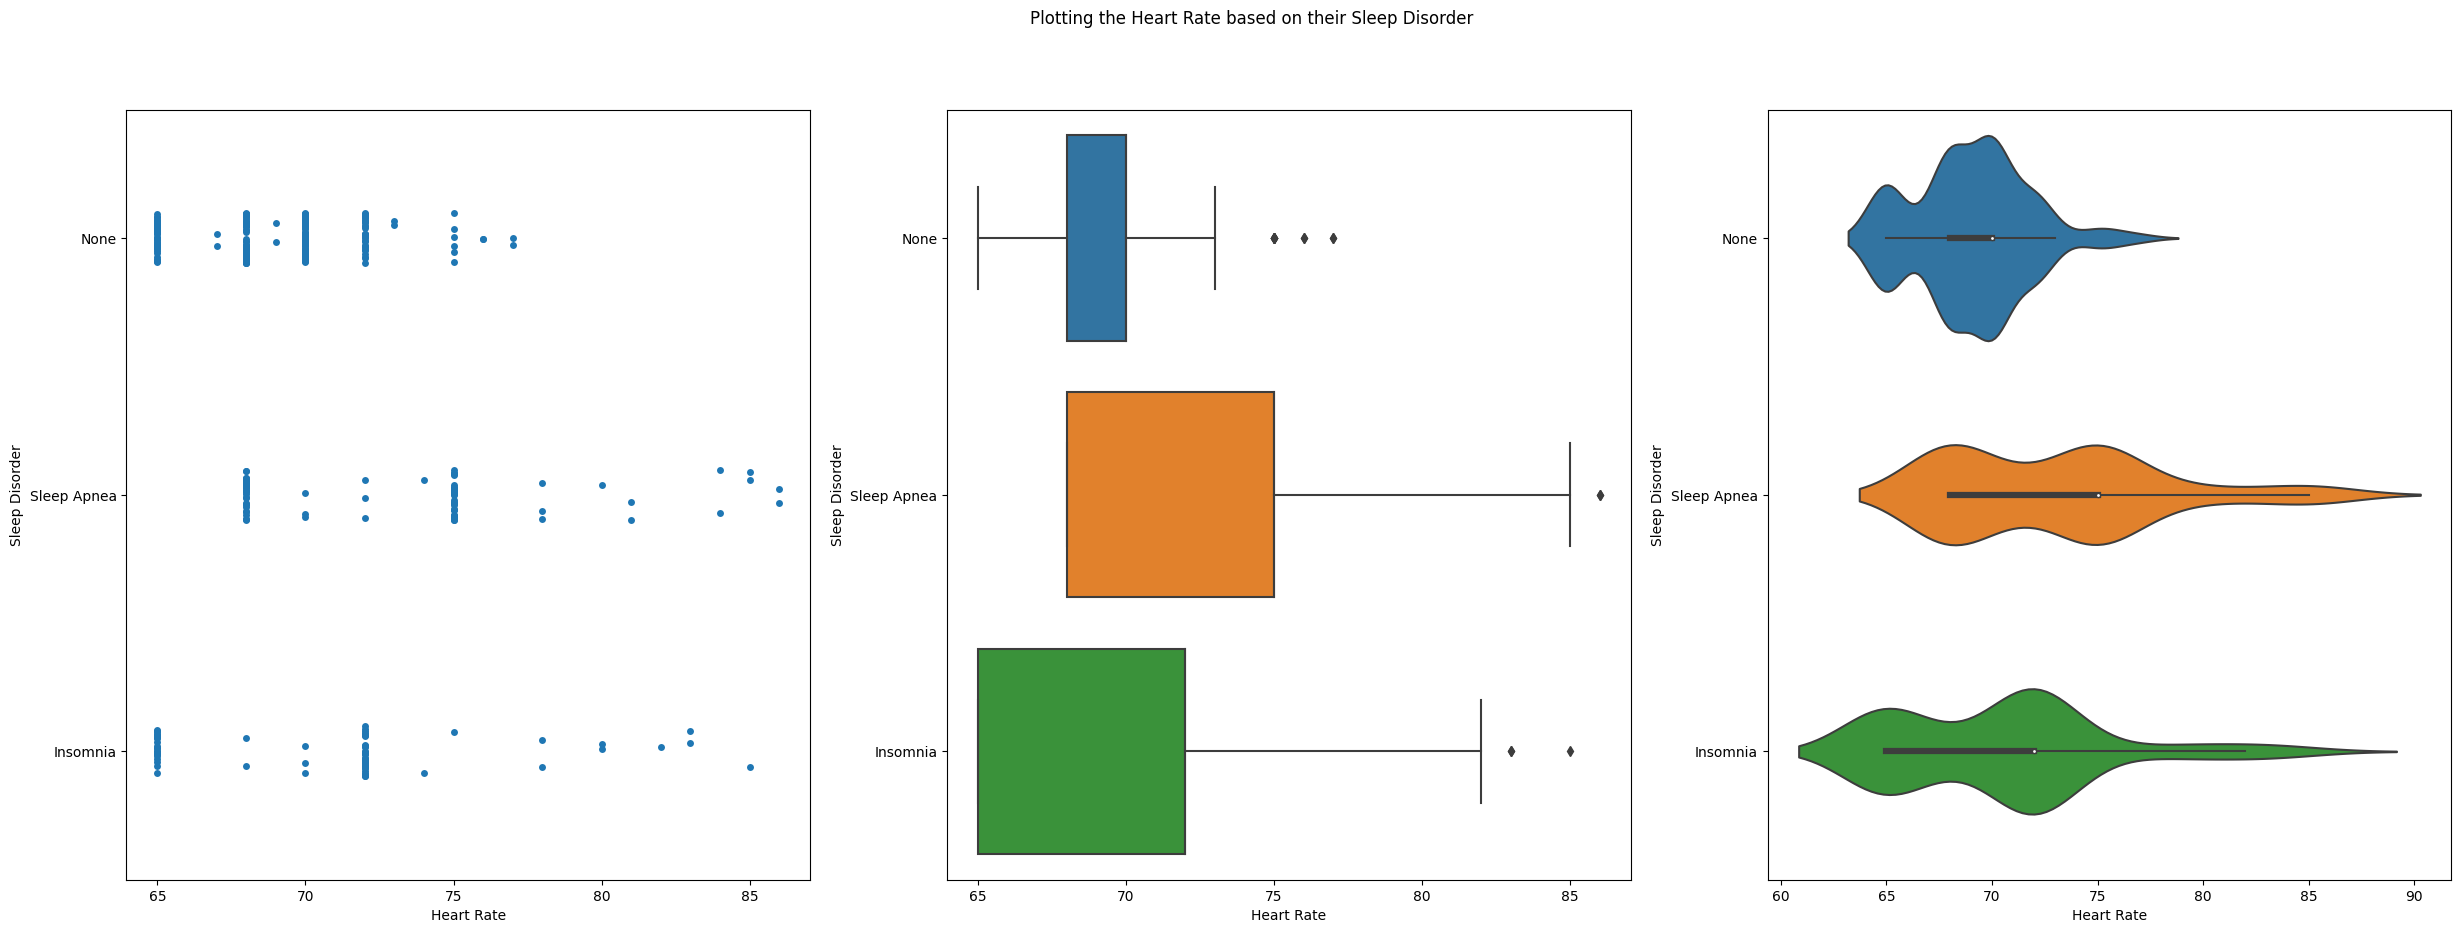

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[6]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[6], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[6], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[6], ax = axes[2])

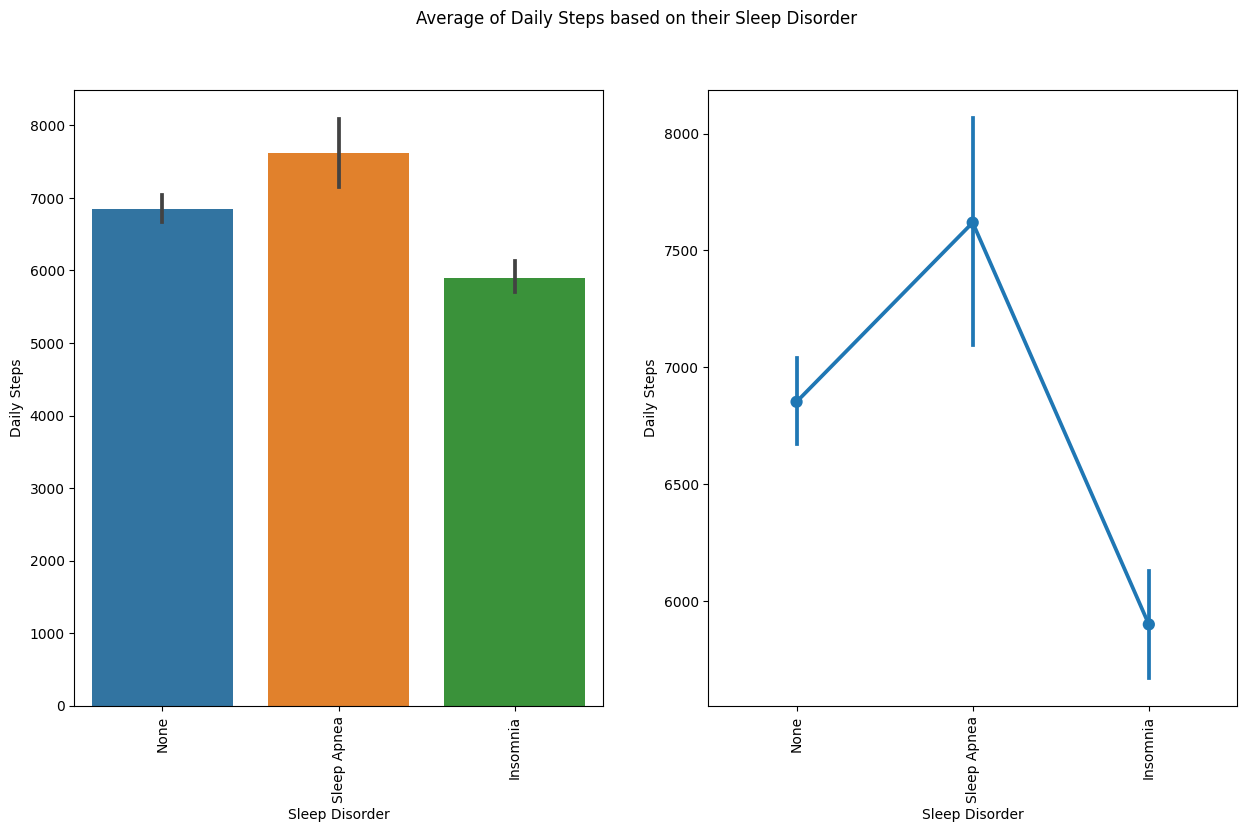

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
plt.suptitle(f"Average of {continuous_var[7]} based on their Sleep Disorder")
sns.barplot(df, x = "Sleep Disorder", y = continuous_var[7], ax = axes[0])
sns.pointplot(df, x = "Sleep Disorder", y = continuous_var[7], ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=90);

<Axes: xlabel='Daily Steps', ylabel='Sleep Disorder'>

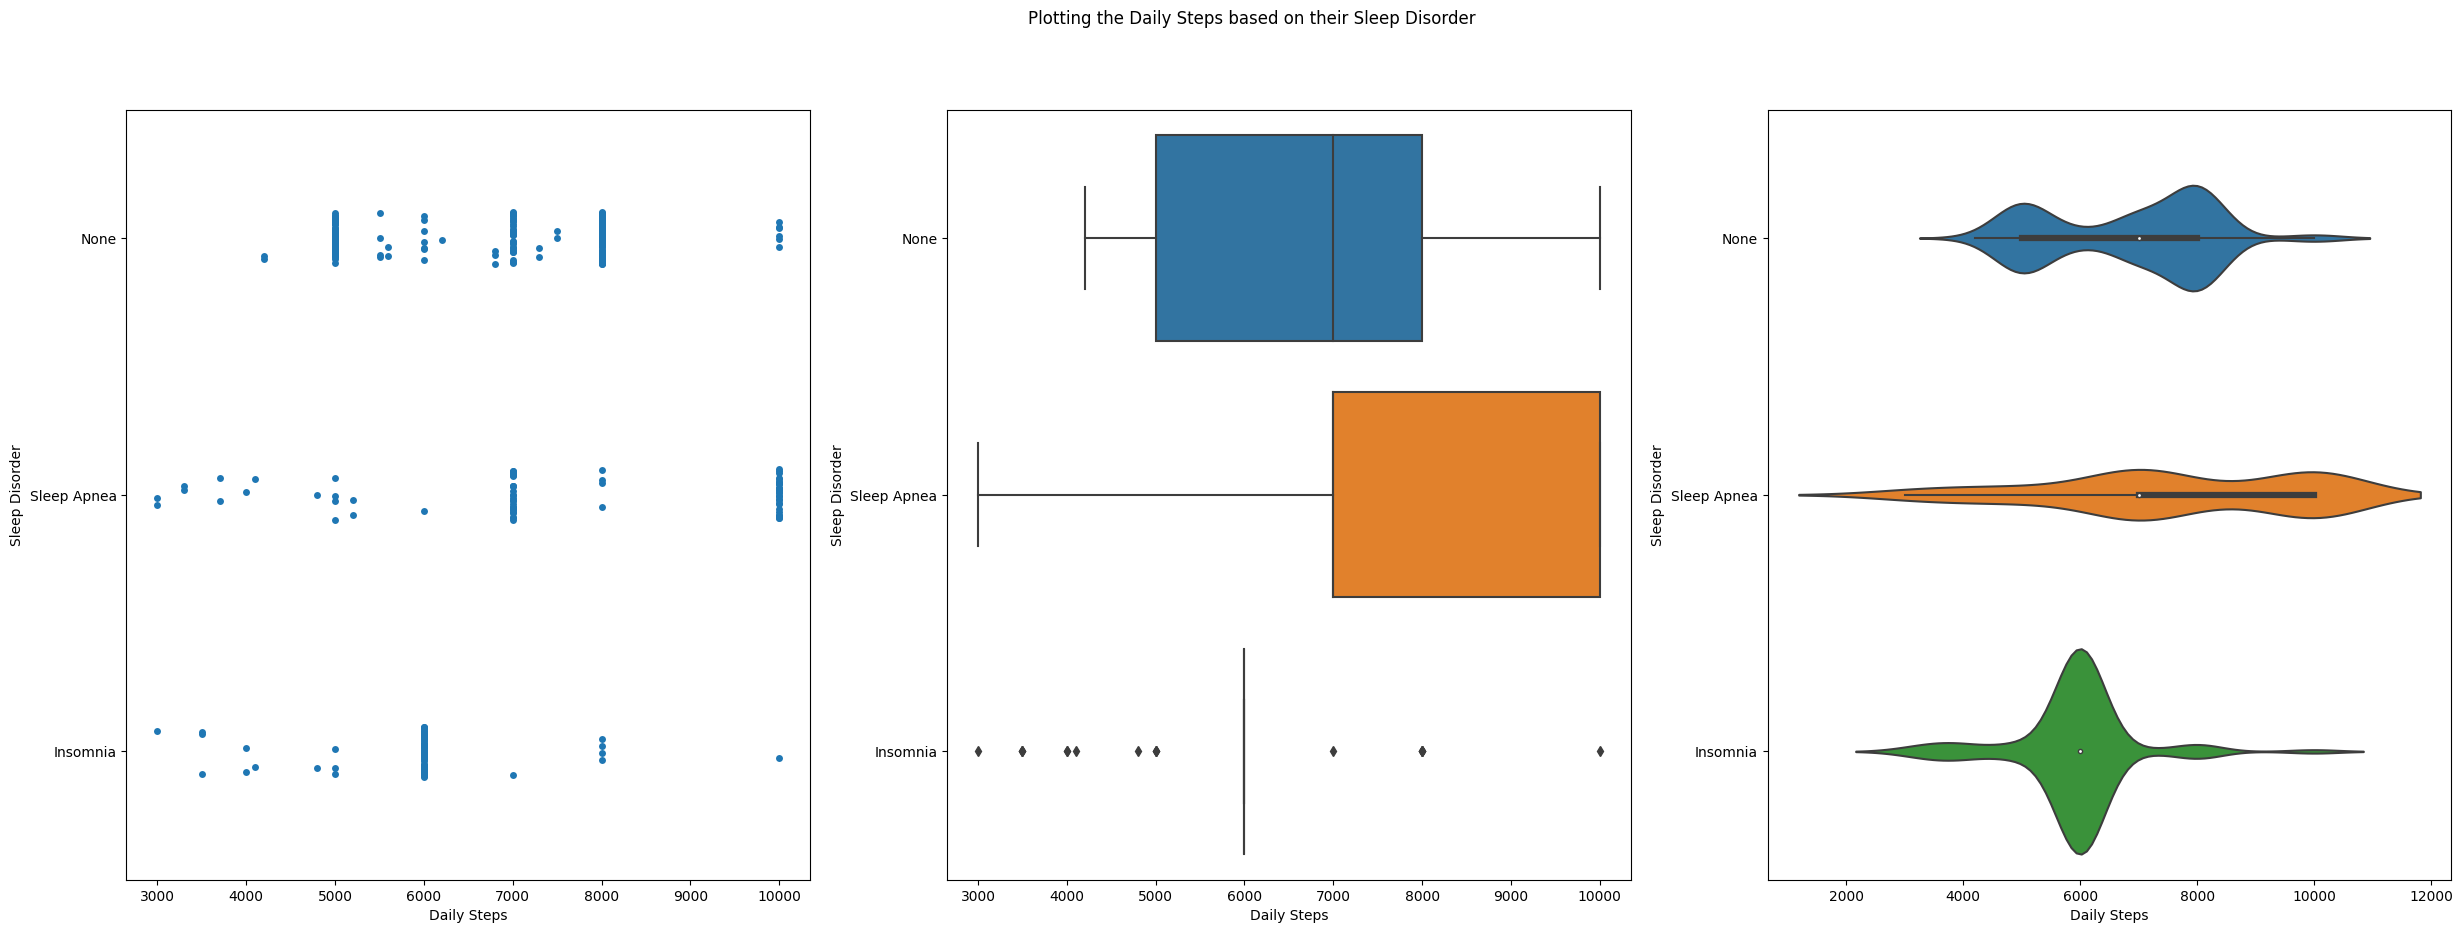

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (30, 10))
plt.suptitle(f"Plotting the {continuous_var[7]} based on their Sleep Disorder")
sns.stripplot(df, y = "Sleep Disorder", x = continuous_var[7], ax = axes[0])
sns.boxplot(df, y = "Sleep Disorder", x = continuous_var[7], ax = axes[1])
sns.violinplot(df, y = "Sleep Disorder", x = continuous_var[7], ax = axes[2])

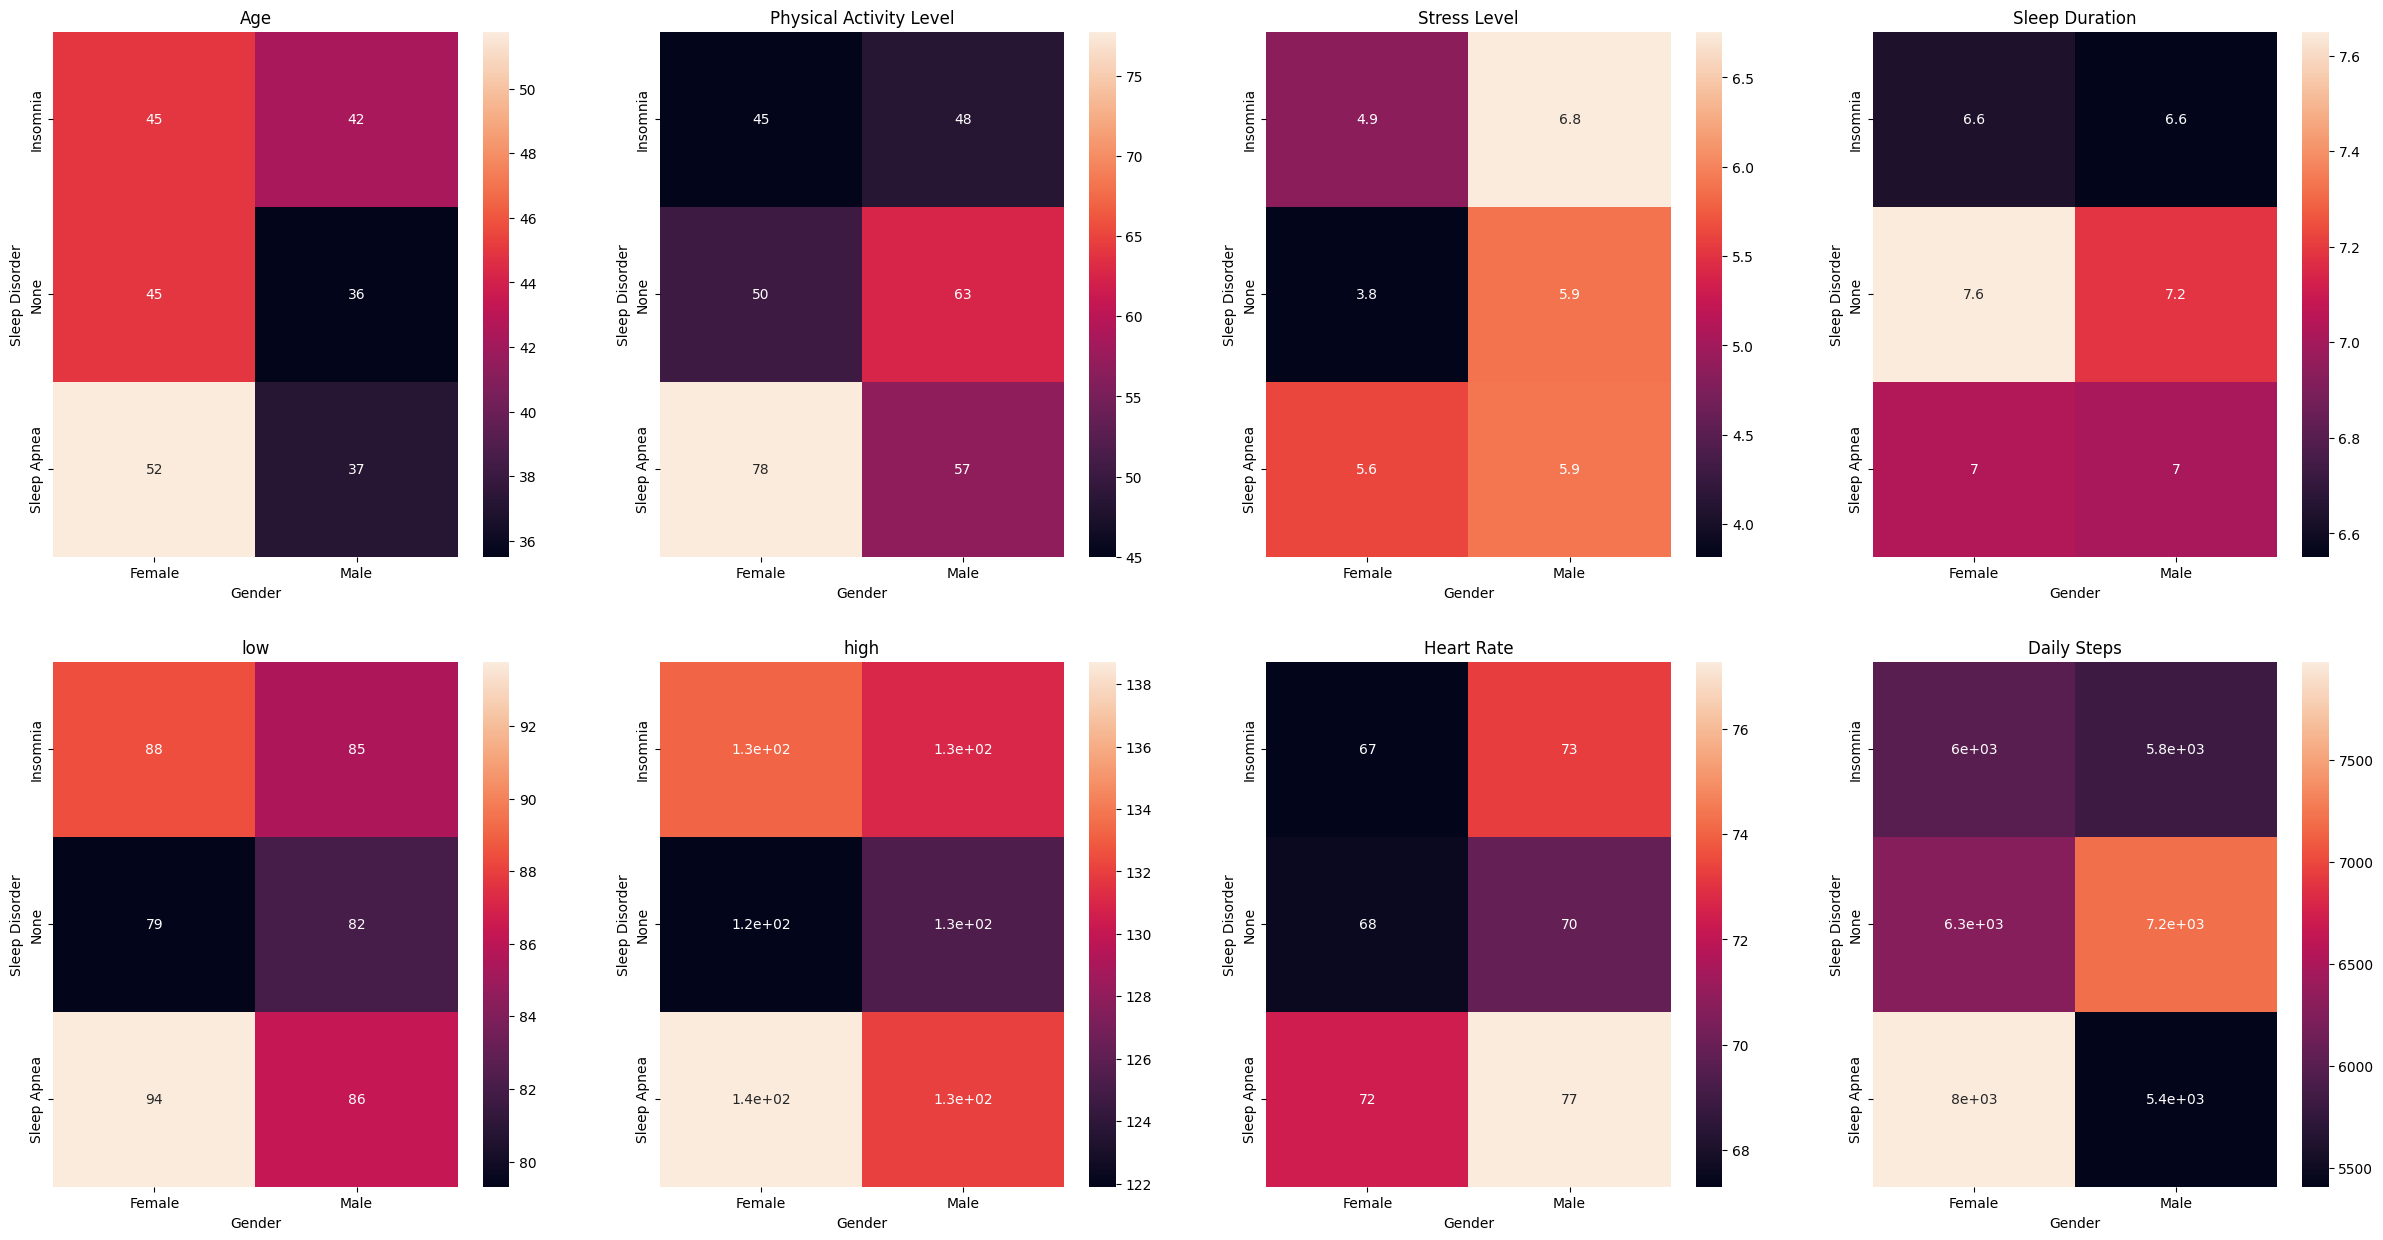

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (30, 15))
col = 0
row = 0
for cat in continuous_var:
  gender_sleep = pd.pivot_table(df, index = "Sleep Disorder", columns = "Gender", values = cat, aggfunc = np.mean)
  axes[row, col].set_title(cat)
  sns.heatmap(gender_sleep, annot = True, ax = axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

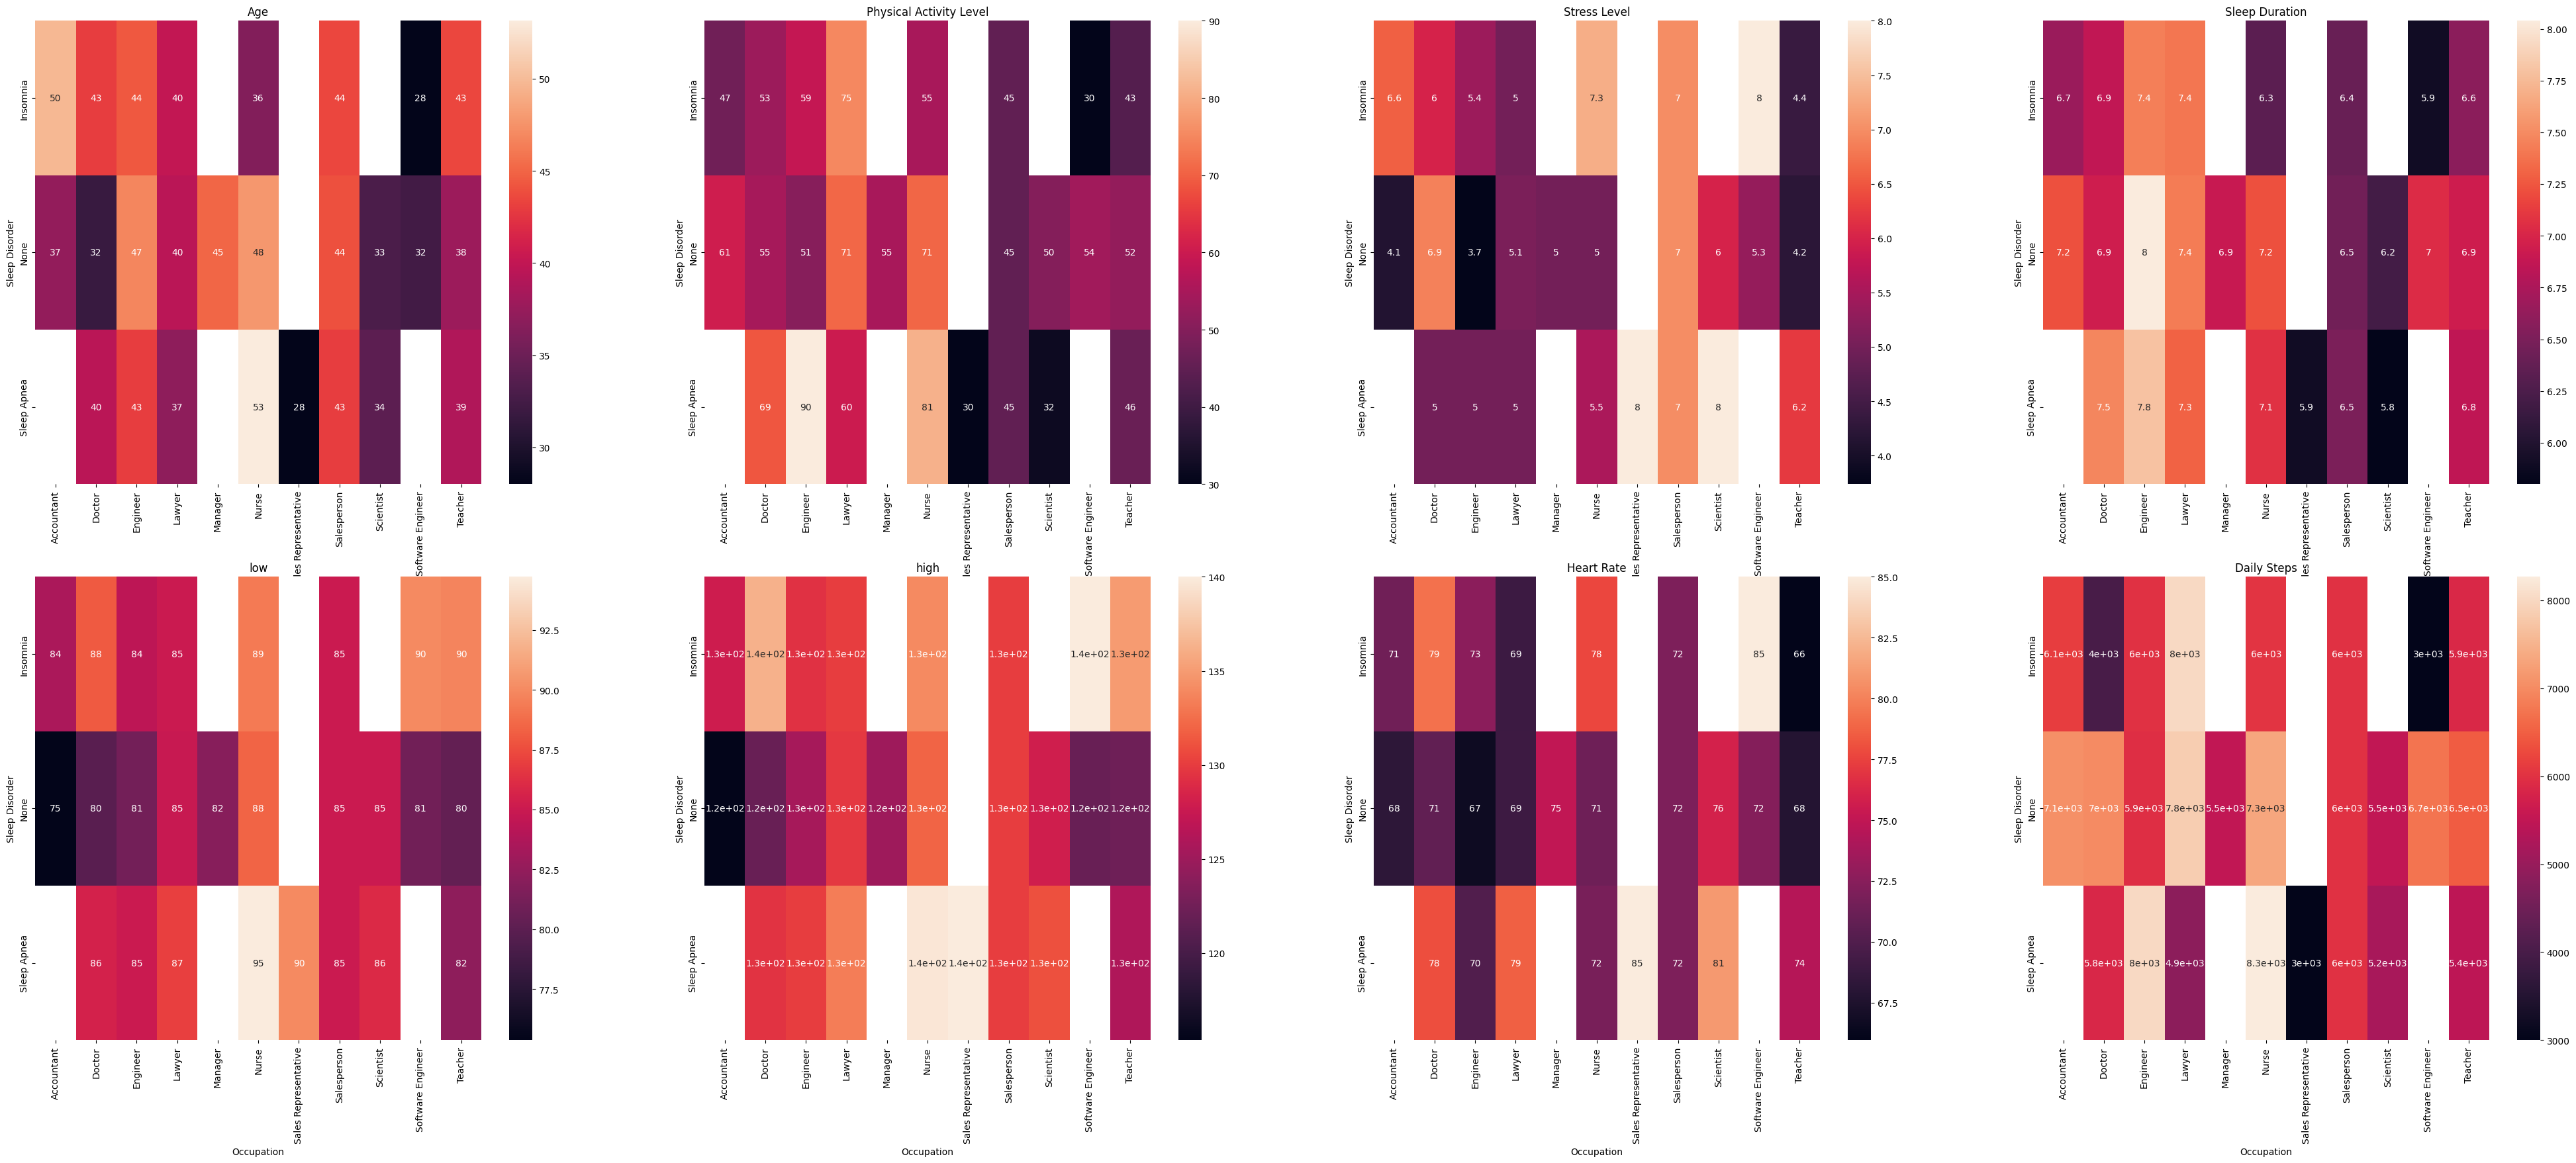

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (50, 20))
col = 0
row = 0
for cat in continuous_var:
  gender_sleep = pd.pivot_table(df, index = "Sleep Disorder", columns = "Occupation", values = cat, aggfunc = np.mean)
  axes[row, col].set_title(cat)
  sns.heatmap(gender_sleep, annot = True, ax = axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

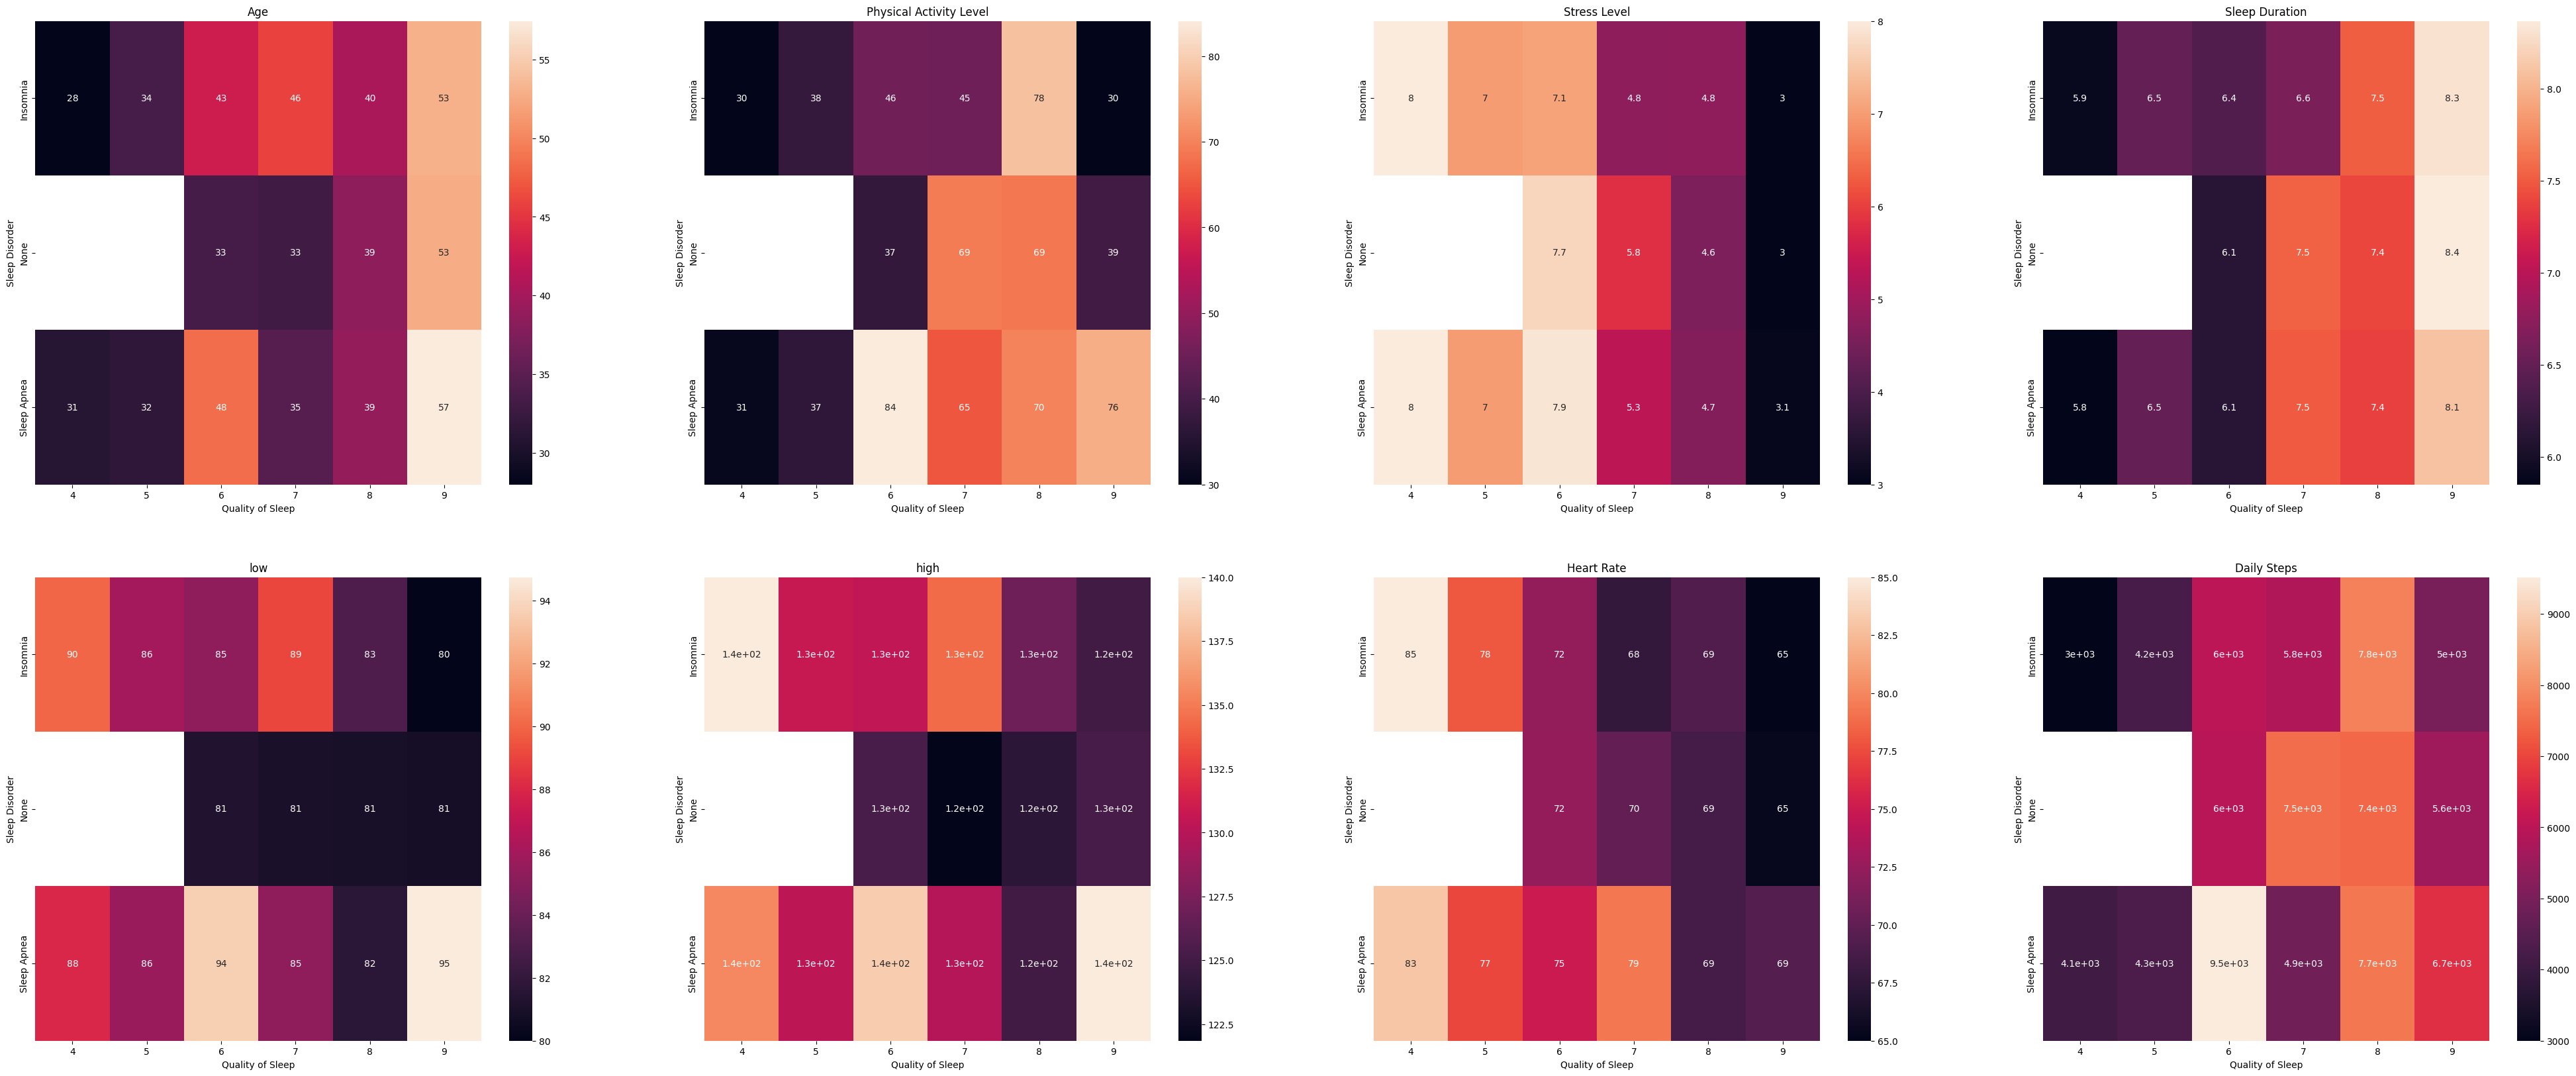

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (50, 20))
col = 0
row = 0
for cat in continuous_var:
  gender_sleep = pd.pivot_table(df, index = "Sleep Disorder", columns = "Quality of Sleep", values = cat, aggfunc = np.mean)
  axes[row, col].set_title(cat)
  sns.heatmap(gender_sleep, annot = True, ax = axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

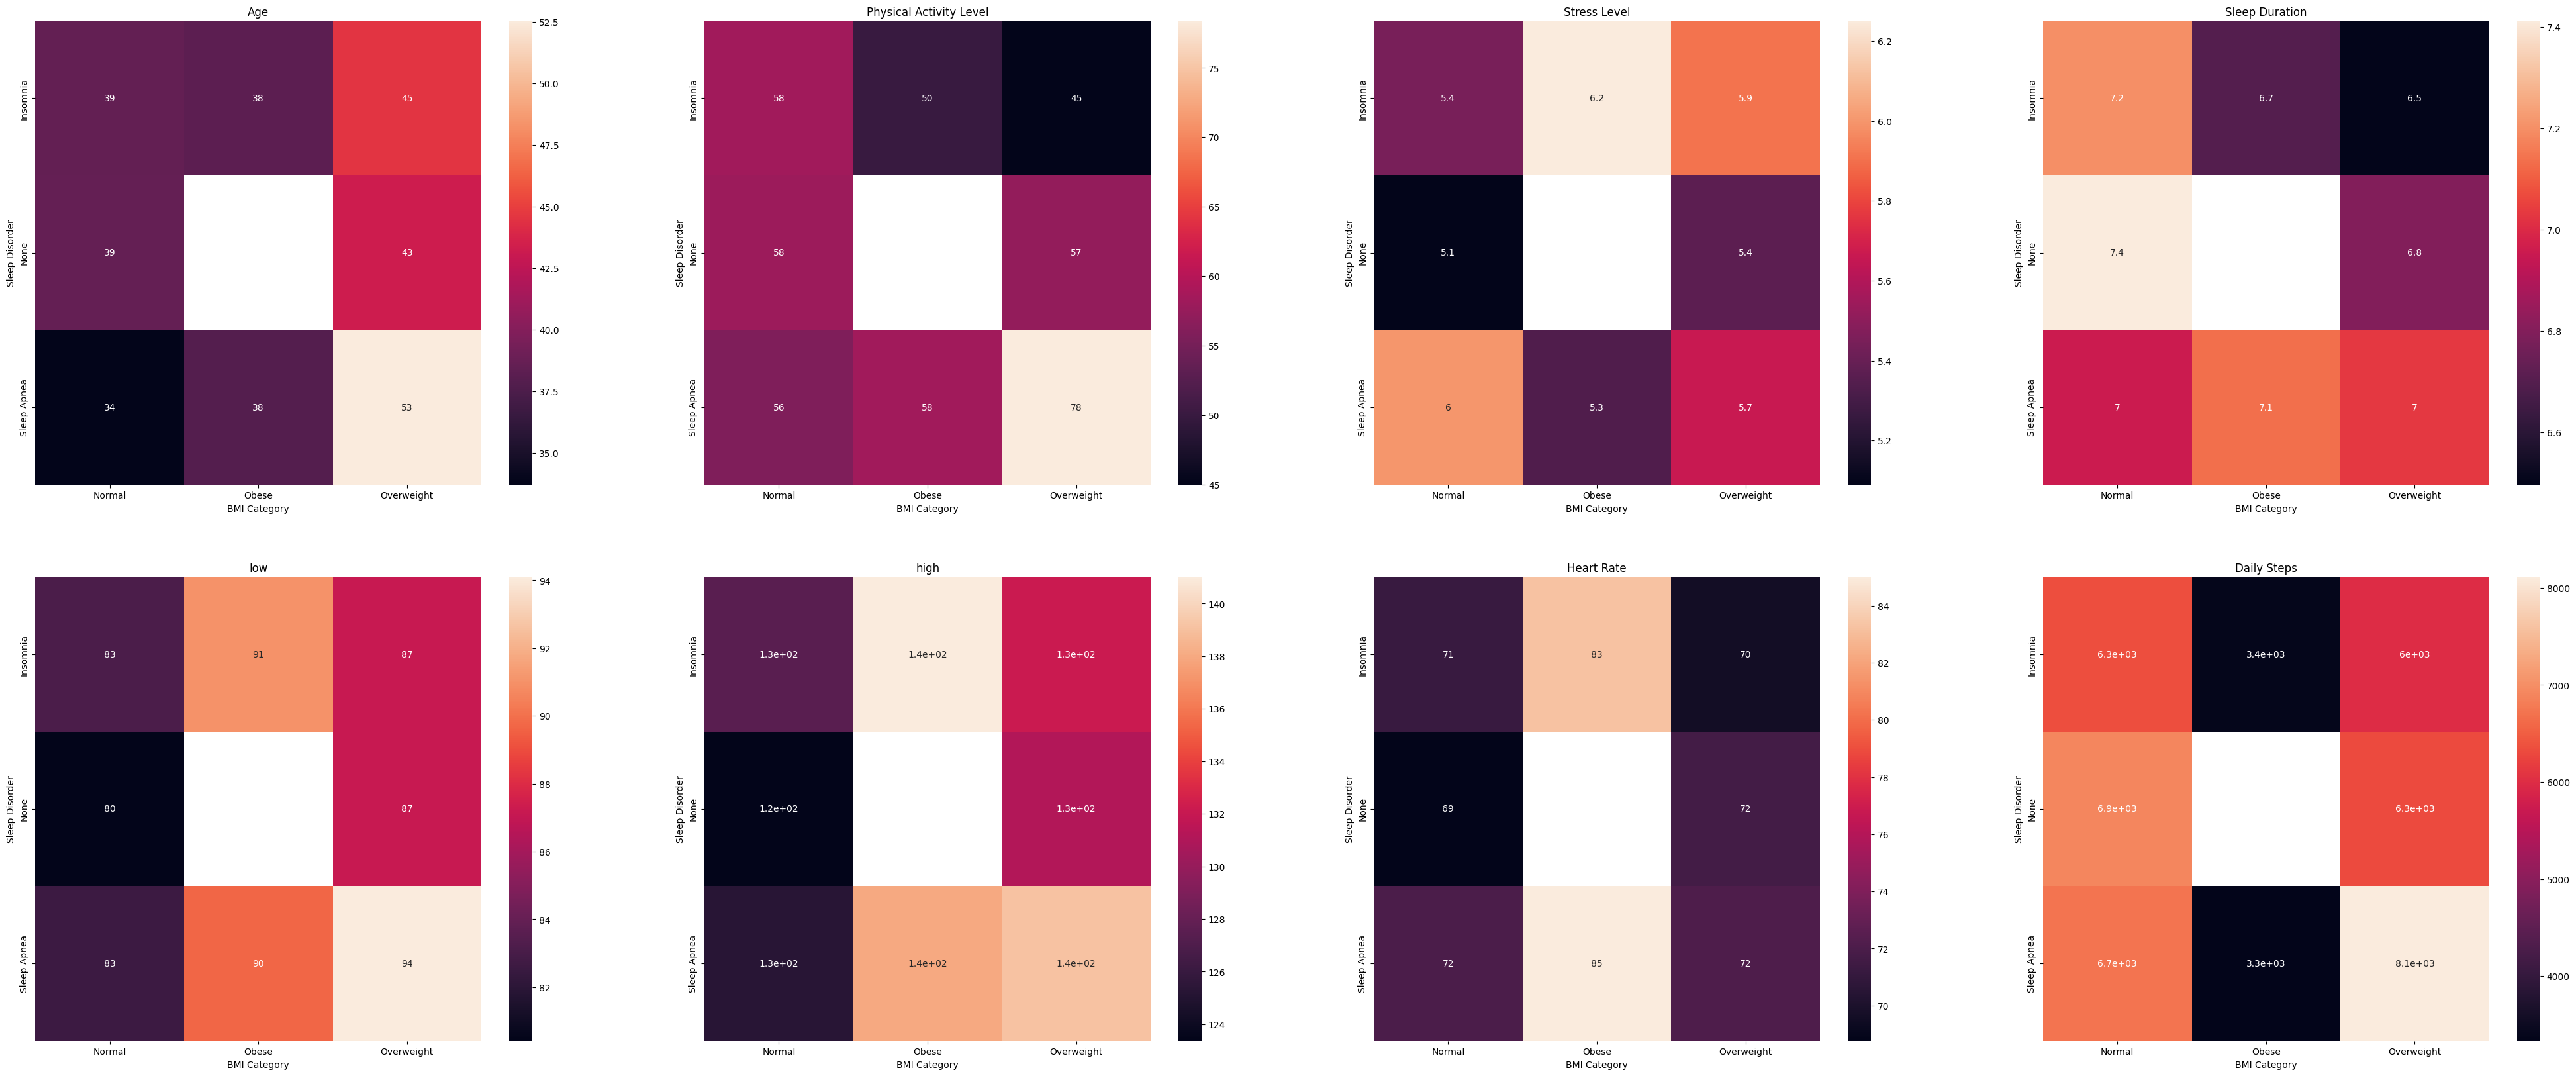

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (50, 20))
col = 0
row = 0
for cat in continuous_var:
  gender_sleep = pd.pivot_table(df, index = "Sleep Disorder", columns = "BMI Category", values = cat, aggfunc = np.mean)
  axes[row, col].set_title(cat)
  sns.heatmap(gender_sleep, annot = True, ax = axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1

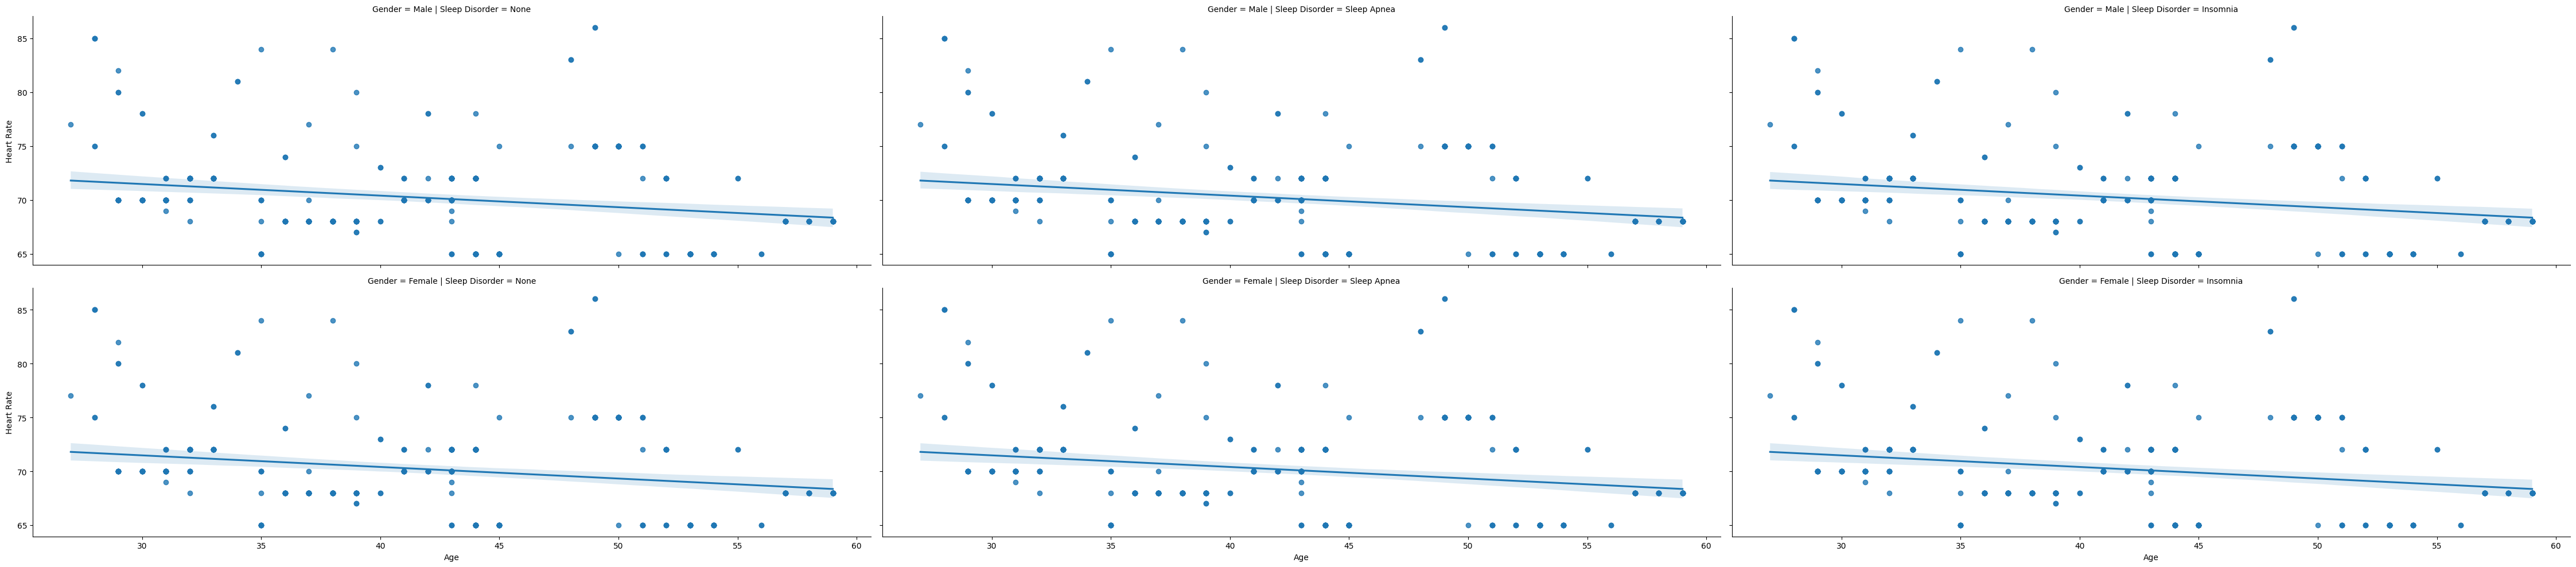

In [ ]:
g = sns.FacetGrid(data = df, row = "Gender", col = "Sleep Disorder", aspect=3, height = 5)
g.map(sns.regplot, x = df["Age"], y = df["Heart Rate"])

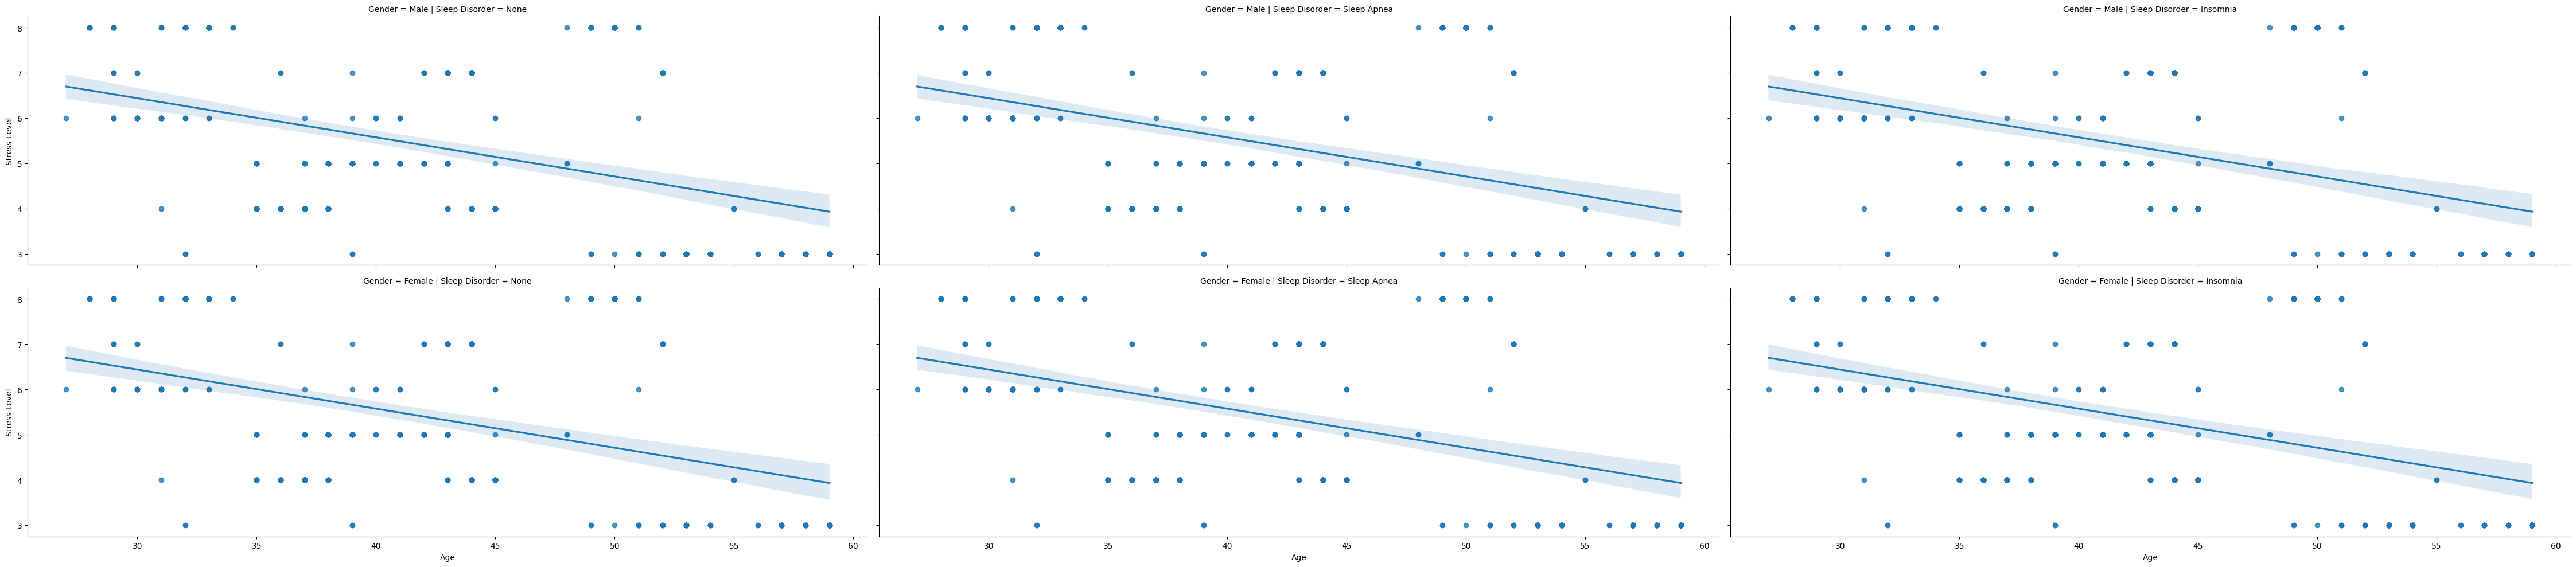

In [ ]:
g = sns.FacetGrid(df, row = "Gender", col = "Sleep Disorder", aspect=3, height = 5)
g.map(sns.regplot, x = df["Age"], y = df["Stress Level"])

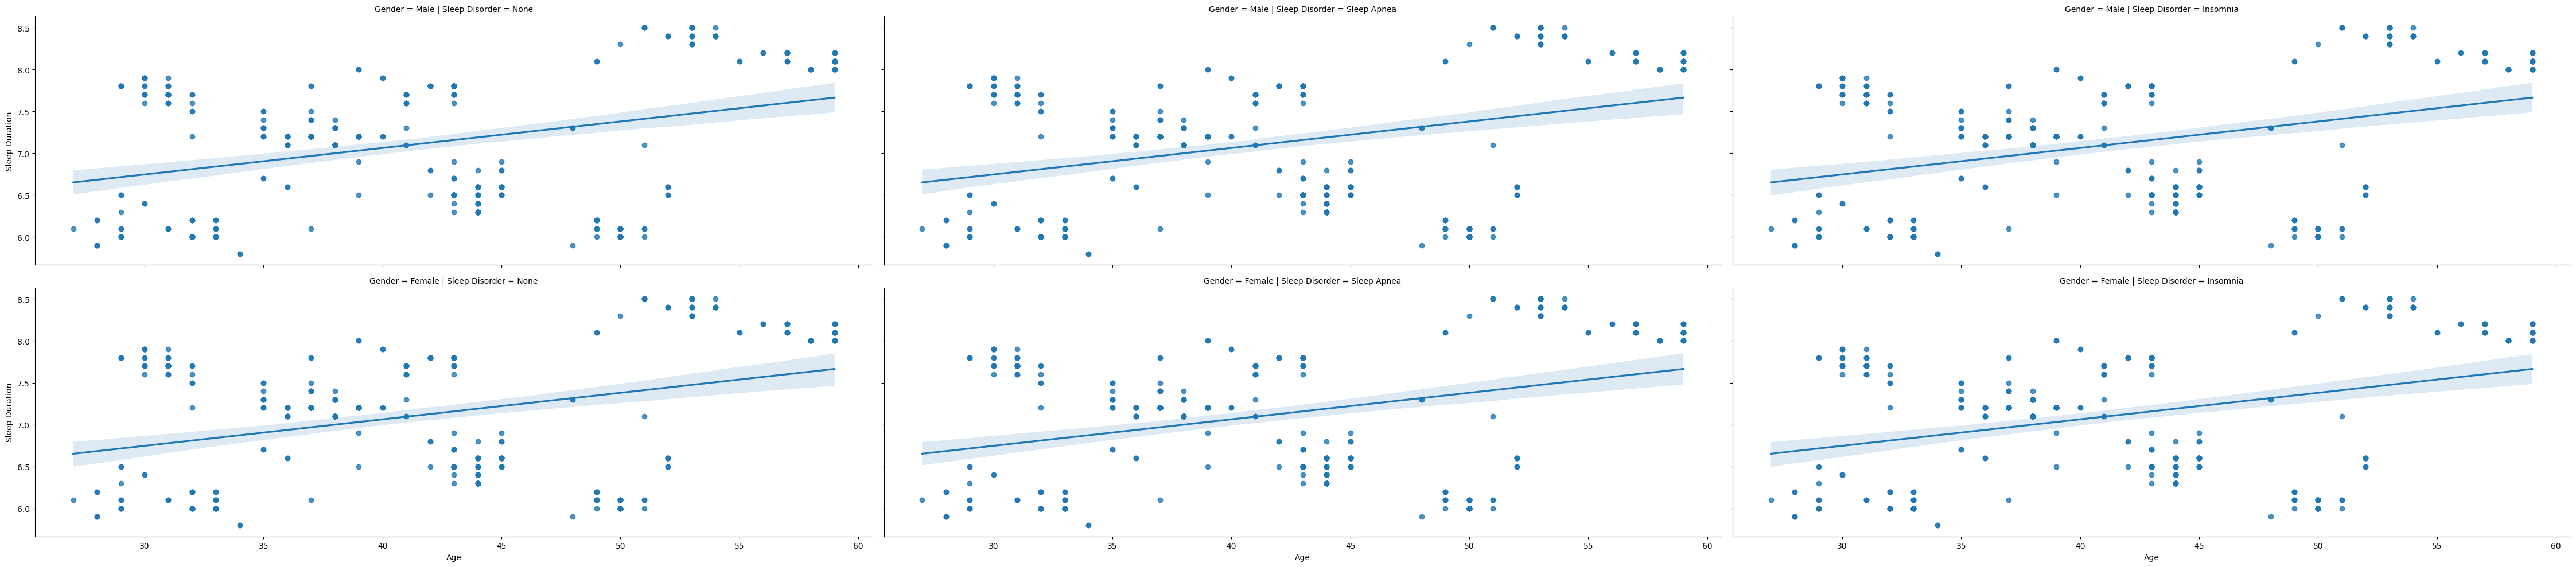

In [ ]:
g = sns.FacetGrid(df, row = "Gender", col = "Sleep Disorder", aspect=3, height = 5)
g.map(sns.regplot, x = df["Age"], y = df["Sleep Duration"])

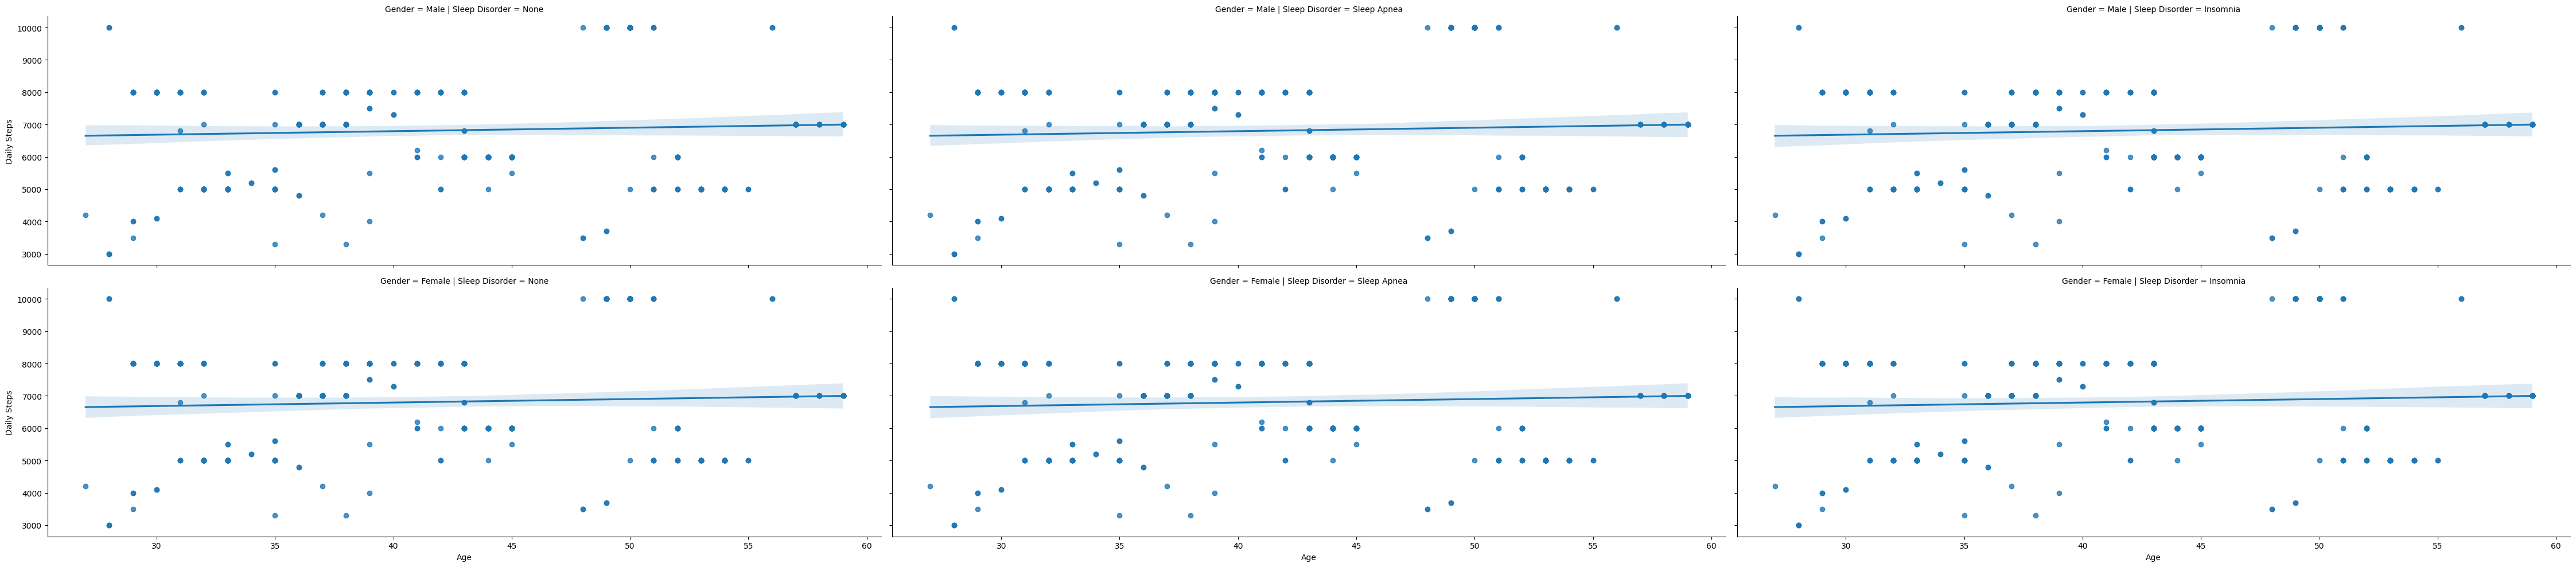

In [ ]:
g = sns.FacetGrid(df, row = "Gender", col = "Sleep Disorder", aspect=3, height = 5)
g.map(sns.regplot, x = df["Age"], y = df["Daily Steps"])

# Machine Learning Section
The section will covered all of the process on how to train, evaluate, tune, etc a model.
 - Feature Engineering
 - Splitting the Data
 - Choosing the perfect model
 - Training the model
 - Evaluating the model
 - Tuning the model

This will break into three parts since will use different kinds algorithms and check what best fits.

# Feature Engineering
- The Occupation will have three category STEM, ABM and HUMMS.
  - STEM:
    - Nurse
    - Doctor
    - Engineer
    - Software Engineer
    - Scientist
  - ABM:
    - Accountant
    - Salesperson
    - Manager
    - Sales Representative
  - HUMMS
    - Teacher
    - Lawyer
- The BMI Category overweight and obese will change to not normal.



In [ ]:
df_tmp = df.copy()

In [ ]:
STEM = ["Nurse", "Doctor", "Engineer", "Software Engineer", "Scientist"]
ABM = ["Accountant", "Salesperson", "Manager", "Sales Representative"]
HUMMS = ["Teacher", "Lawyer"]

df_tmp.loc[df_tmp["Occupation"].isin(STEM), "Occupation"] = "STEM"
df_tmp.loc[df_tmp["Occupation"].isin(ABM), "Occupation"] = "ABM"
df_tmp.loc[df_tmp["Occupation"].isin(HUMMS), "Occupation"] = "HUMMS"

df_tmp.loc[df_tmp["BMI Category"].isin(["Overweight", "Obese"]), "BMI Category"] = "Not Normal"


In [ ]:
df_tmp

Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                             
1            Male   27       STEM             6.1                 6   
2            Male   28       STEM             6.2                 6   
3            Male   28       STEM             6.2                 6   
4            Male   28        ABM             5.9                 4   
5            Male   28        ABM             5.9                 4   
...           ...  ...        ...             ...               ...   
370        Female   59       STEM             8.1                 9   
371        Female   59       STEM             8.0                 9   
372        Female   59       STEM             8.1                 9   
373        Female   59       STEM             8.1                 9   
374        Female   59       STEM             8.1                 9   

           Physical Activity Level  Stress Level BMI Category Blood Pressure  \
Person ID                                                                      
1                               42             6   Not Normal         126/83   
2                               60             8       Normal         125/80   
3                               60             8       Normal         125/80   
4                               30             8   Not Normal         140/90   
5                               30             8   Not Normal         140/90   
...                            ...           ...          ...            ...   
370                             75             3   Not Normal         140/95   
371                             75             3   Not Normal         140/95   
372                             75             3   Not Normal         140/95   
373                             75             3   Not Normal         140/95   
374                             75             3   Not Normal         140/95   

           Heart Rate  Daily Steps Sleep Disorder  low  high  
Person ID                                                     
1                  77         4200           None   83   126  
2                  75        10000           None   80   125  
3                  75        10000           None   80   125  
4                  85         3000    Sleep Apnea   90   140  
5                  85         3000    Sleep Apnea   90   140  
...               ...          ...            ...  ...   ...  
370                68         7000    Sleep Apnea   95   140  
371                68         7000    Sleep Apnea   95   140  
372                68         7000    Sleep Apnea   95   140  
373                68         7000    Sleep Apnea   95   140  
374                68         7000    Sleep Apnea   95   140  

[374 rows x 14 columns]

# Changing all of the string to numerical data type

In [ ]:
df_tmp.groupby(["Occupation", "Sleep Disorder"])[["Age"]].count().unstack()

Age                 
Sleep Disorder Insomnia None Sleep Apnea
Occupation                              
ABM                  36   33           3
HUMMS                29   51           7
STEM                 12  135          68

In [ ]:
# Change the HUMMS to 0, the ABM to 1 and STEM to 2
df_tmp["Occupation"] = df_tmp["Occupation"].replace({
    "HUMMS": 0,
    "ABM":1,
    "STEM":2
})

In [ ]:
# Change the Gender Female to 0 and Gender Male to 1
df_tmp["Gender"] = df_tmp["Gender"].replace({"Male": 1, "Female": 0})

In [ ]:
# Change the Not Normal to 1 and Normal to 0
df_tmp["BMI Category"] = df_tmp["BMI Category"].replace({"Normal": 0, "Not Normal": 1})

In [ ]:
df_tmp

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                              
1               1   27           2             6.1                 6   
2               1   28           2             6.2                 6   
3               1   28           2             6.2                 6   
4               1   28           1             5.9                 4   
5               1   28           1             5.9                 4   
...           ...  ...         ...             ...               ...   
370             0   59           2             8.1                 9   
371             0   59           2             8.0                 9   
372             0   59           2             8.1                 9   
373             0   59           2             8.1                 9   
374             0   59           2             8.1                 9   

           Physical Activity Level  Stress Level  BMI Category Blood Pressure  \
Person ID                                                                       
1                               42             6             1         126/83   
2                               60             8             0         125/80   
3                               60             8             0         125/80   
4                               30             8             1         140/90   
5                               30             8             1         140/90   
...                            ...           ...           ...            ...   
370                             75             3             1         140/95   
371                             75             3             1         140/95   
372                             75             3             1         140/95   
373                             75             3             1         140/95   
374                             75             3             1         140/95   

           Heart Rate  Daily Steps Sleep Disorder  low  high  
Person ID                                                     
1                  77         4200           None   83   126  
2                  75        10000           None   80   125  
3                  75        10000           None   80   125  
4                  85         3000    Sleep Apnea   90   140  
5                  85         3000    Sleep Apnea   90   140  
...               ...          ...            ...  ...   ...  
370                68         7000    Sleep Apnea   95   140  
371                68         7000    Sleep Apnea   95   140  
372                68         7000    Sleep Apnea   95   140  
373                68         7000    Sleep Apnea   95   140  
374                68         7000    Sleep Apnea   95   140  

[374 rows x 14 columns]

In [ ]:
# Removing the Blood Pressure column and Saving the dataframe to csv file
# df_tmp.drop("Blood Pressure", axis = 1, inplace = True)

df_tmp.to_csv("/content/drive/MyDrive/Sleep Habits and Health Lifestyle/final_csv.csv")

In [ ]:
import pandas as pd
df_tmp = pd.read_csv("/content/drive/MyDrive/Sleep Habits and Health Lifestyle/final_csv.csv", index_col = 0)
df_tmp

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                              
1               1   27           2             6.1                 6   
2               1   28           2             6.2                 6   
3               1   28           2             6.2                 6   
4               1   28           1             5.9                 4   
5               1   28           1             5.9                 4   
...           ...  ...         ...             ...               ...   
370             0   59           2             8.1                 9   
371             0   59           2             8.0                 9   
372             0   59           2             8.1                 9   
373             0   59           2             8.1                 9   
374             0   59           2             8.1                 9   

           Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
Person ID                                                                    
1                               42             6             1          77   
2                               60             8             0          75   
3                               60             8             0          75   
4                               30             8             1          85   
5                               30             8             1          85   
...                            ...           ...           ...         ...   
370                             75             3             1          68   
371                             75             3             1          68   
372                             75             3             1          68   
373                             75             3             1          68   
374                             75             3             1          68   

           Daily Steps  Sleep Disorder  low  high  
Person ID                                          
1                 4200               0   83   126  
2                10000               0   80   125  
3                10000               0   80   125  
4                 3000               2   90   140  
5                 3000               2   90   140  
...                ...             ...  ...   ...  
370               7000               2   95   140  
371               7000               2   95   140  
372               7000               2   95   140  
373               7000               2   95   140  
374               7000               2   95   140  

[374 rows x 13 columns]

In [ ]:
# Changing the None into 0, Insomia to 1 and Sleep Apnea to 2
df_tmp["Sleep Disorder"] = df_tmp["Sleep Disorder"].replace({
    "None":0,
    'Insomnia':1,
    "Sleep Apnea":2
})

for col in df_tmp.columns:
  if pd.api.types.is_object_dtype(df_tmp[col]):
    df_tmp[col] = df_tmp[col].astype(int)

# Checking the correlation of the independent variables to dependent variables

<Axes: >

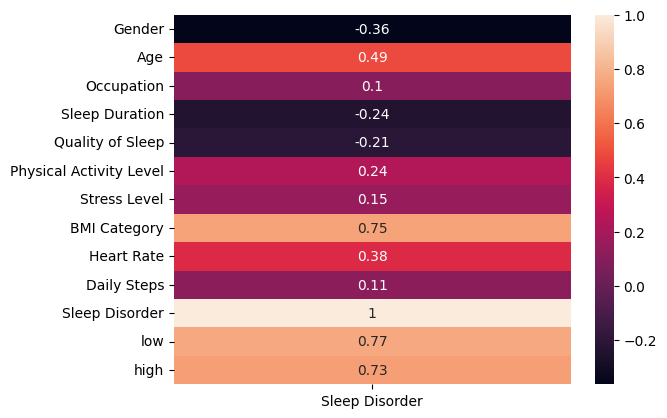

In [ ]:
sns.heatmap(df_tmp.corr()[["Sleep Disorder"]], annot = True)

# Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_tmp.drop("Sleep Disorder", axis = 1)
y = df_tmp["Sleep Disorder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

# Using the Random Forest Classifier as the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Accuracy Score: {model.score(X_test, y_test)}")

Accuracy Score: 0.9469026548672567


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.69333333 0.58666667 0.96       0.45333333 0.83783784], Average: 0.7062342342342343
Cross Val Train: [0.94339623 0.96153846 0.88461538 0.88461538 0.78846154], Average: 0.8925253991291727
Cross Val Test: [0.82608696 0.7826087  0.56521739 0.90909091 0.90909091], Average: 0.7984189723320159    



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report

# ConfusionMatrixDisplay

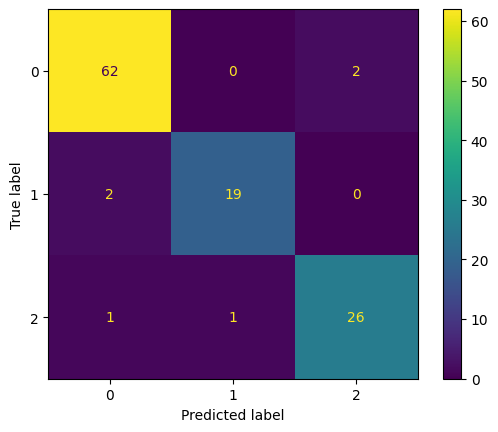

In [ ]:
y_preds = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.95      0.90      0.93        21
           2       0.93      0.93      0.93        28

    accuracy                           0.95       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.95      0.95      0.95       113



# Hyper Parameter Tuning using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "n_estimators": np.arange(100, 500, 100),
    "max_depth": np.arange(50, 100, 10),
    "min_samples_split": [2,4,6,8]
}

param_clf = RandomizedSearchCV(model, param_distributions = param_dist, cv = 5, n_iter = 25, verbose = 2, n_jobs = -1)
param_clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([50, 60, 70, 80, 90]),
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': array([100, 200, 300, 400])},
                   verbose=2)

In [ ]:
model_tuned = param_clf.best_estimator_
y_preds_tuned = model_tuned.predict(X_test)
print(classification_report(y_test, y_preds_tuned))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.95      0.90      0.93        21
           2       0.93      0.93      0.93        28

    accuracy                           0.95       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.95      0.95      0.95       113



<Axes: >

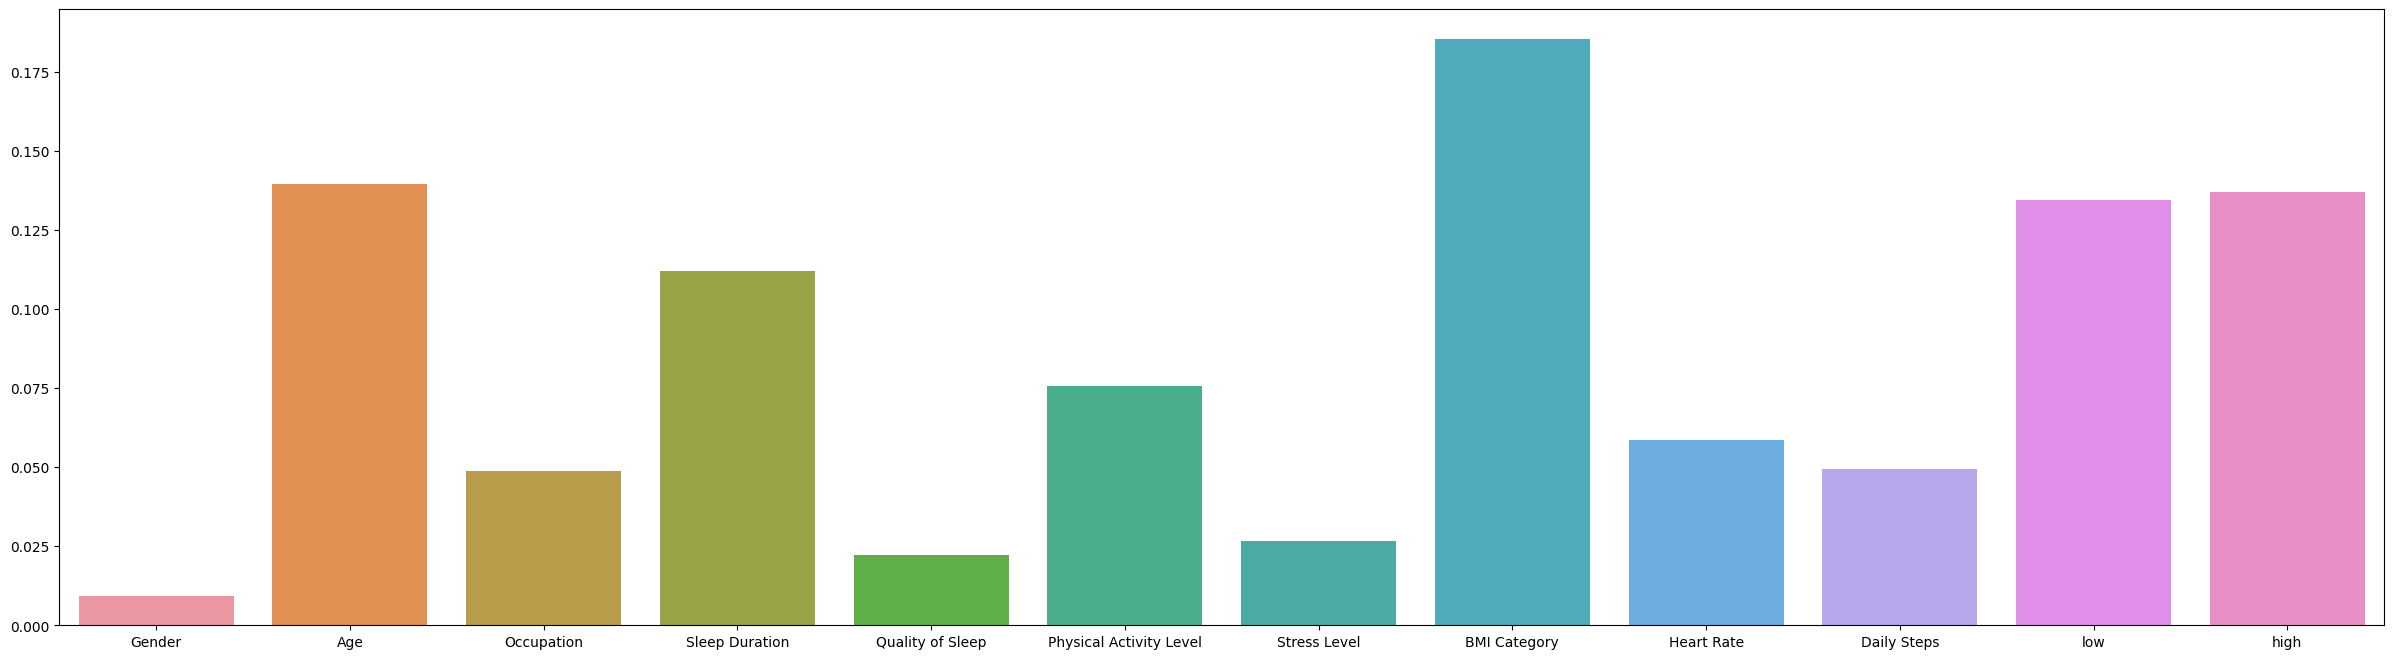

In [ ]:
plt.figure(figsize = (30, 8))
sns.barplot(x = X_train.columns, y = model.feature_importances_)

# Using the Logistic Regression as the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter = 100000)
model.fit(X_train, y_train)
print(f"Accuracy Score: {model.score(X_test, y_test)}")

Accuracy Score: 0.8938053097345132


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.70666667 0.93333333 0.97333333 0.73333333 0.81081081], Average: 0.8314954954954954
Cross Val Train: [0.8490566  0.88461538 0.84615385 0.90384615 0.92307692], Average: 0.8813497822931785
Cross Val Test: [0.91304348 0.95652174 0.7826087  0.95454545 0.86363636], Average: 0.8940711462450592



In [ ]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.94      0.81      0.87        21
           2       0.79      0.96      0.87        28

    accuracy                           0.89       113
   macro avg       0.89      0.89      0.88       113
weighted avg       0.90      0.89      0.89       113



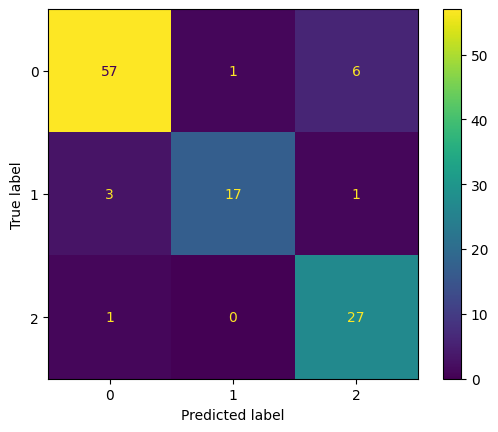

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

# Tuning the Logistic Regression using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
param_grid = {
    "solver": ["liblinear"],
    "penalty": ["l1", "l2"],
    "tol": np.logspace(-2, 2, 20),
    "C": np.linspace(0.01, 2, 20),
    "intercept_scaling": [1, 3, 5]

}

param_clf = GridSearchCV(model, param_grid= param_grid, cv = 10, n_jobs = -1, verbose = 2)
param_clf.fit(X_train, y_train)

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                         'intercept_scaling': [1, 3, 5],
                         'penalty': ['l1',..., 'solver': ['liblinear'],
                         'tol': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             verbose=2)

In [ ]:
tuned_model  = param_clf.best_estimator_
print(f"Higehest Accuracy: {param_clf.best_score_}")

Higehest Accuracy: 0.8814814814814815


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(tuned_model, X, y, cv = 5)
cross_val_train = cross_val_score(tuned_model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(tuned_model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.69333333 0.90666667 0.98666667 0.86666667 0.82432432], Average: 0.8555315315315315
Cross Val Train: [0.81132075 0.88461538 0.84615385 0.90384615 0.88461538], Average: 0.8661103047895502
Cross Val Test: [0.91304348 0.91304348 0.82608696 0.95454545 0.90909091], Average: 0.9031620553359684



In [ ]:

y_preds = tuned_model.predict(X_test)
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        61
           1       0.86      0.90      0.88        20
           2       0.93      0.81      0.87        32

    accuracy                           0.89       113
   macro avg       0.89      0.88      0.89       113
weighted avg       0.90      0.89      0.89       113



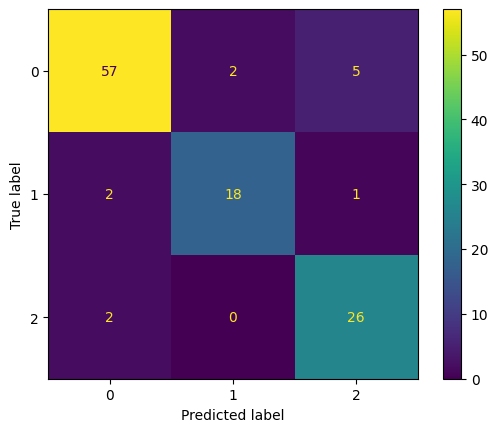

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

# Using Adaboost classifier with a base estimator of Decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base = DecisionTreeClassifier(max_depth = 50)
model = AdaBoostClassifier(estimator= base, n_estimators = 200)
model.fit(X_train, y_train)
print(f"Accuracy Score: {model.score(X_test, y_test)}")

Accuracy Score: 0.911504424778761


In [ ]:
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.70666667 0.53333333 0.74666667 0.49333333 0.40540541], Average: 0.577081081081081
Cross Val Train: [0.8490566  0.86538462 0.78846154 0.90384615 0.86538462], Average: 0.8544267053701017
Cross Val Test: [0.95652174 0.91304348 0.86956522 0.95454545 0.86363636], Average: 0.9114624505928853



In [ ]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.94      0.81      0.87        21
           2       0.86      0.86      0.86        28

    accuracy                           0.91       113
   macro avg       0.91      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



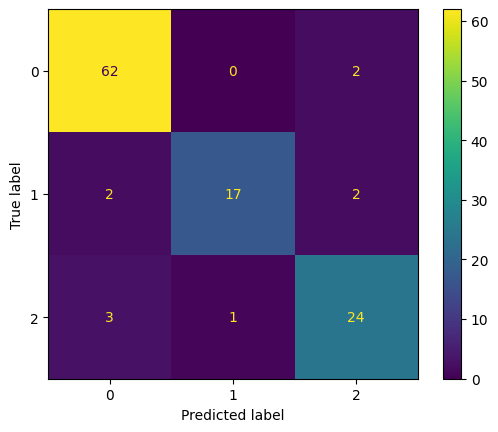

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

# Using Tensorflow to create a deep learning model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation = "relu", input_dim =  len(X.columns)),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

In [ ]:
y_encoded = tf.keras.utils.to_categorical(df_tmp["Sleep Disorder"])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3, random_state = 12)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, verbose = 1)

Epoch 1/500
9/9 [==============================] - 5s 109ms/step - loss: 122.6584 - accuracy: 0.4789 - val_loss: 37.9827 - val_accuracy: 0.2478
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 19.6444 - accuracy: 0.4521 - val_loss: 23.3280 - val_accuracy: 0.2478
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 18.3282 - accuracy: 0.3372 - val_loss: 27.6191 - val_accuracy: 0.5664
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 16.4406 - accuracy: 0.5057 - val_loss: 8.8272 - val_accuracy: 0.5664
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 16.3064 - accuracy: 0.5287 - val_loss: 14.4620 - val_accuracy: 0.1770
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 8.1760 - accuracy: 0.3487 - val_loss: 17.9845 - val_accuracy: 0.5664
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 12.7249 - accuracy: 0.4789 - val_loss: 6.9471 - val_accuracy: 0.5664
Epoch 8/500
9

[Text(0.5, 0, 'Number of Epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy per Epochs')]

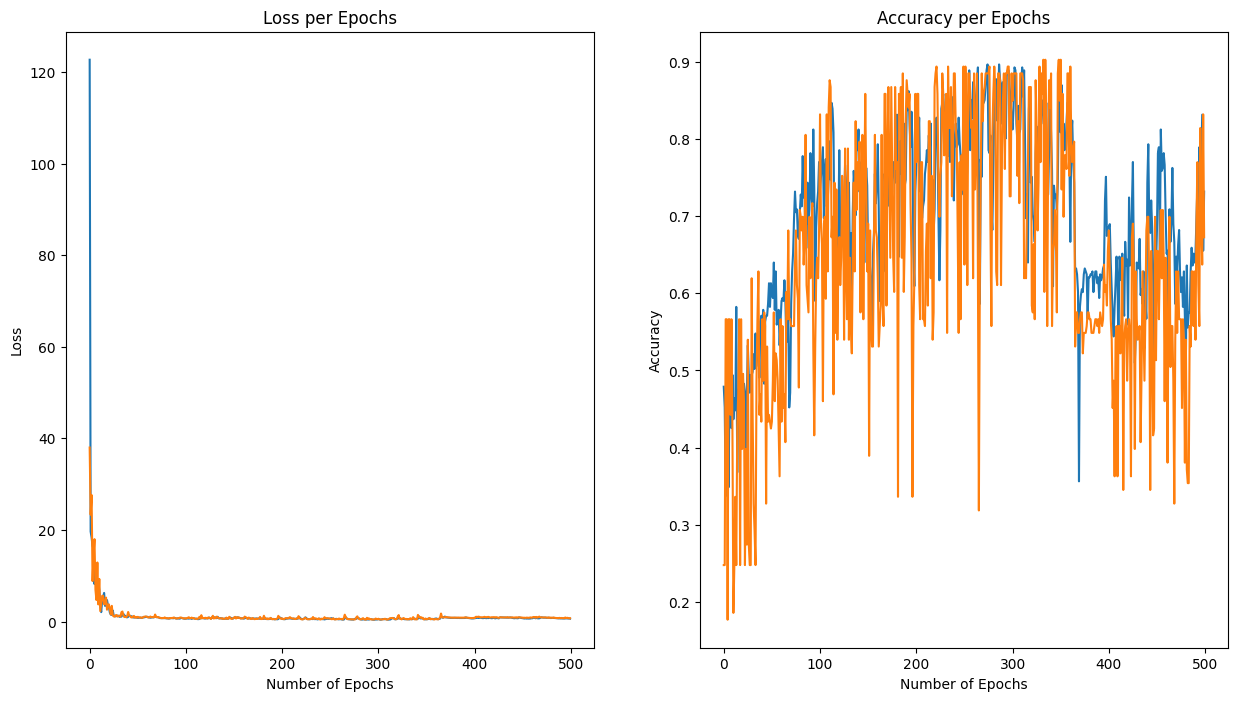

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize = (15, 8))
ax[0].plot(r.history["loss"])
ax[0].plot(r.history["val_loss"])
ax[0].set(xlabel = "Number of Epochs",
          ylabel = "Loss", title = "Loss per Epochs")
ax[1].plot(r.history['accuracy'])
ax[1].plot(r.history["val_accuracy"])
ax[1].set(xlabel = "Number of Epochs",
          ylabel = "Accuracy", title = "Accuracy per Epochs")

# Evaluating the deep learning Model

In [ ]:
y_preds = model.predict(X_test)
y_preds = y_preds.argmax(axis = 1)

4/4 [==============================] - 0s 6ms/step


In [ ]:
print(classification_report(y_test.argmax(axis = 1), y_preds))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77        64
           1       0.84      0.76      0.80        21
           2       0.00      0.00      0.00        28

    accuracy                           0.67       113
   macro avg       0.50      0.57      0.52       113
weighted avg       0.53      0.67      0.59       113



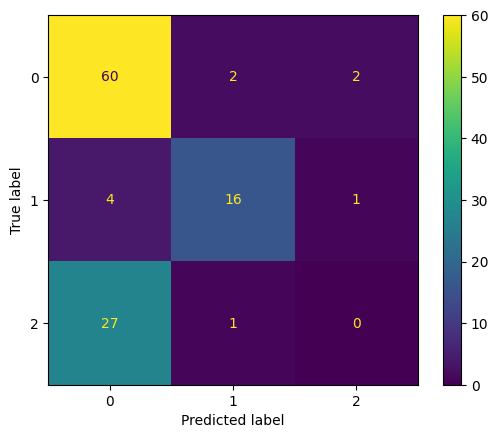

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis = 1), y_preds)

# Making the target data into binary.
Set the insomia and sleep apnea into 1 since both of the are sleep disorder.

In [ ]:
df_tmp["Sleep Disorder"] = df_tmp["Sleep Disorder"].replace({
    1: 1,
    2: 1,
})
df_tmp

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                              
1               1   27           2             6.1                 6   
2               1   28           2             6.2                 6   
3               1   28           2             6.2                 6   
4               1   28           1             5.9                 4   
5               1   28           1             5.9                 4   
...           ...  ...         ...             ...               ...   
370             0   59           2             8.1                 9   
371             0   59           2             8.0                 9   
372             0   59           2             8.1                 9   
373             0   59           2             8.1                 9   
374             0   59           2             8.1                 9   

           Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
Person ID                                                                    
1                               42             6             1          77   
2                               60             8             0          75   
3                               60             8             0          75   
4                               30             8             1          85   
5                               30             8             1          85   
...                            ...           ...           ...         ...   
370                             75             3             1          68   
371                             75             3             1          68   
372                             75             3             1          68   
373                             75             3             1          68   
374                             75             3             1          68   

           Daily Steps  Sleep Disorder  low  high  
Person ID                                          
1                 4200               0   83   126  
2                10000               0   80   125  
3                10000               0   80   125  
4                 3000               1   90   140  
5                 3000               1   90   140  
...                ...             ...  ...   ...  
370               7000               1   95   140  
371               7000               1   95   140  
372               7000               1   95   140  
373               7000               1   95   140  
374               7000               1   95   140  

[374 rows x 13 columns]

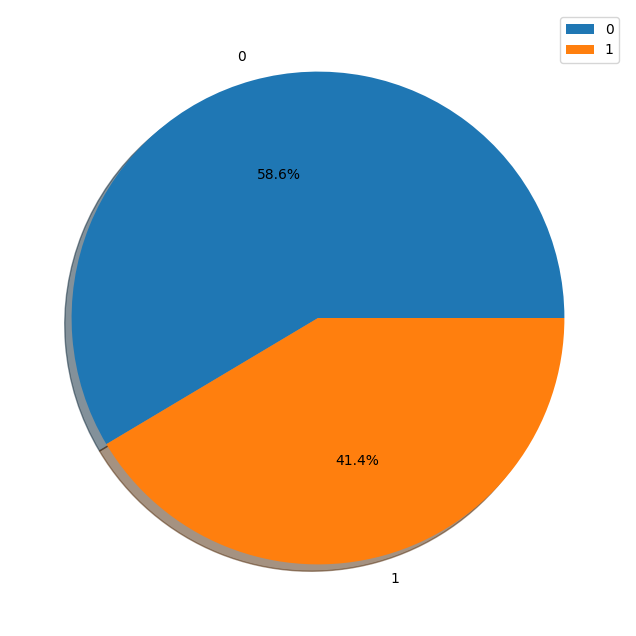

In [ ]:
plt.figure(figsize = (15, 8))
plt.pie(df_tmp["Sleep Disorder"].value_counts(), shadow = True, autopct = "%1.1f%%", labels = ["0", "1"]);
plt.legend()

In [ ]:
# Use Random Forest Classifier Again
from sklearn.ensemble import RandomForestClassifier
X = df_tmp.drop("Sleep Disorder", axis = 1)
y = df_tmp["Sleep Disorder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.78666667 0.70666667 0.81333333 0.48       0.87837838], Average: 0.733009009009009
Cross Val Train: [0.90566038 0.94230769 0.88461538 0.94230769 0.92307692], Average: 0.9195936139332366
Cross Val Test: [0.95652174 0.95652174 0.86956522 0.90909091 0.86363636], Average: 0.9110671936758893



In [ ]:
print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 0.9557522123893806


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)
y_pos = y_pred_prob[:,1]

fpr, tpr, thres = roc_curve(y_test, y_pos)

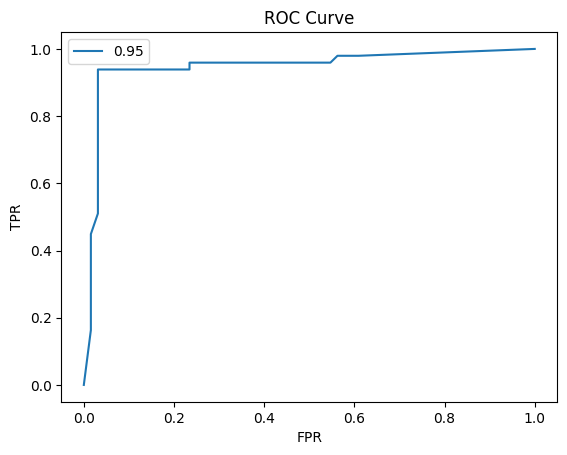

In [ ]:
plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(roc_auc_score(y_test, y_pos), 2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [ ]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.96      0.94      0.95        49

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



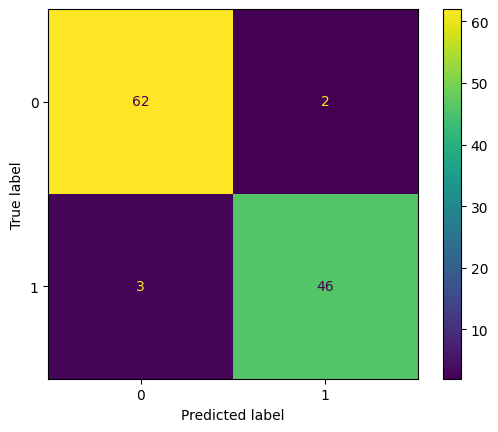

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

Text(0, 0.5, 'Features')

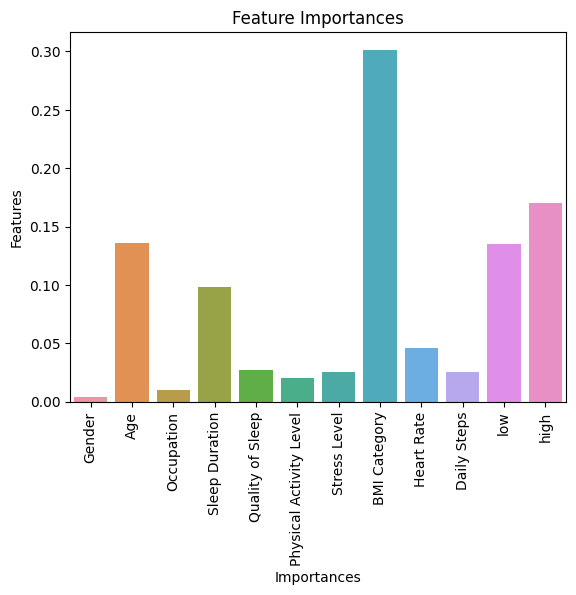

In [ ]:
sns.barplot(x = X.columns, y = model.feature_importances_)
plt.xticks(rotation = 90)
plt.title("Feature Importances")
plt.xlabel("Importances")
plt.ylabel("Features")

In [ ]:
# Now using the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.81333333 0.70666667 0.65333333 0.29333333 0.87837838], Average: 0.6690090090090091
Cross Val Train: [0.90566038 0.94230769 0.86538462 0.92307692 0.88461538], Average: 0.904208998548621
Cross Val Test: [0.95652174 0.95652174 0.91304348 0.90909091 0.86363636], Average: 0.9197628458498024



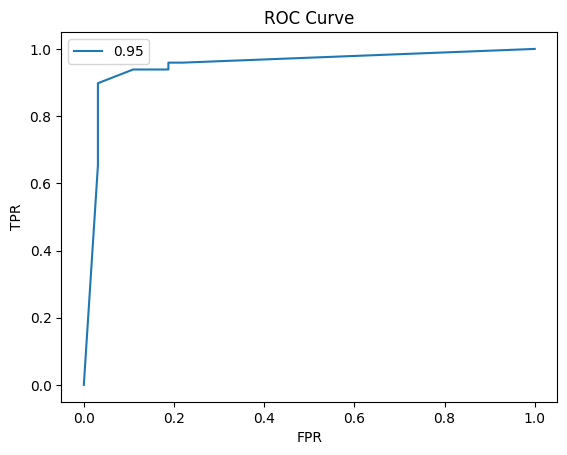

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)
y_pos = y_pred_prob[:,1]

fpr, tpr, thres = roc_curve(y_test, y_pos)

plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(roc_auc_score(y_test, y_pos), 2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.96      0.90      0.93        49

    accuracy                           0.94       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.94      0.94      0.94       113



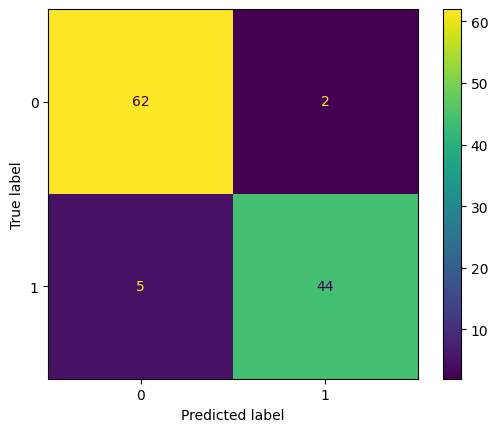

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

Text(0, 0.5, 'Features')

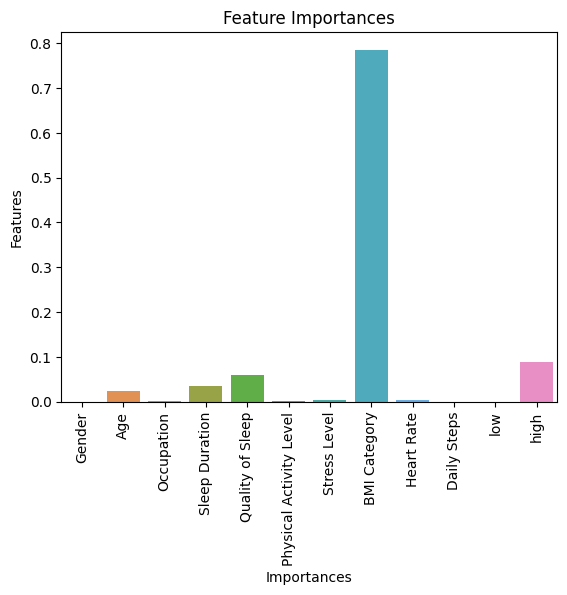

In [ ]:
sns.barplot(x = X.columns, y = model.feature_importances_)
plt.xticks(rotation = 90)
plt.title("Feature Importances")
plt.xlabel("Importances")
plt.ylabel("Features")

# Now using the Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver = "lbfgs", max_iter = 10000)
model.fit(X_train, y_train)
print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 0.911504424778761


In [ ]:
cross_val = cross_val_score(model, X, y, cv = 5)
cross_val_train = cross_val_score(model, X_train, y_train, cv =5)
cross_val_test = cross_val_score(model, X_test, y_test, cv = 5 )

print(f"""
Cross Val Score: {cross_val}, Average: {cross_val.mean()}
Cross Val Train: {cross_val_train}, Average: {cross_val_train.mean()}
Cross Val Test: {cross_val_test}, Average: {cross_val_test.mean()}
""")


Cross Val Score: [0.78666667 0.90666667 0.97333333 0.74666667 0.85135135], Average: 0.852936936936937
Cross Val Train: [0.86792453 0.92307692 0.92307692 0.94230769 0.94230769], Average: 0.9197387518142236
Cross Val Test: [0.95652174 0.95652174 0.86956522 0.90909091 0.86363636], Average: 0.9110671936758893



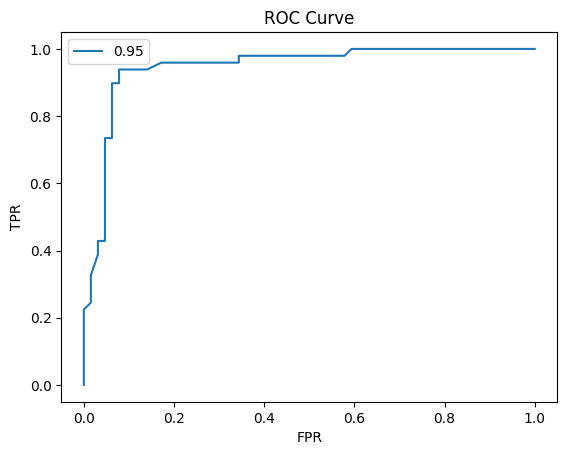

In [ ]:
y_pred_prob = model.predict_proba(X_test)
y_pos = y_pred_prob[:,1]

fpr, tpr, thres = roc_curve(y_test, y_pos)

plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(roc_auc_score(y_test, y_pos), 2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.87      0.94      0.90        49

    accuracy                           0.91       113
   macro avg       0.91      0.91      0.91       113
weighted avg       0.91      0.91      0.91       113



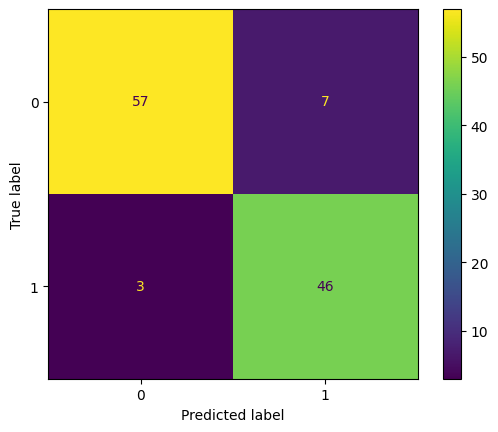

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

# Conclusion
This statement will draw out all of the information that we gathered from analyzing the data.

- The low is the most correlated independent variables among the other independent variables. With a 0.77 correlation towards the dependent variable
- The second most correlated independent variable is the BMI Category with a 0.75 correlation. It's has the mos importance among the other features, it is mostly contributes on the training data.
- Using Random Forest Classifier have a high chance the the model overfits however it gives a high accuracy. With a 89% accuracy for train data and 79% accuracy for validation data. While logistic regression gives a 88% accuracy for train data and 89% accuracy for validation data means the model doesn't overfit.
- Changing the target data into binary classification will increase it's accuracy. The accuracy of Random Forest Classifier become 91% for both train data and validation data, while it also increase into 91% accuracy, however doing this might be hard to identify what kind of sleep does a participant have.
- It's not really best to use deep learning as your predictive model. As you can see on the classification report it only gi
Therefore, being overweight or obese can affect your sleep and might give you a sleep disorder.
